# Capstone Project

- Jessie Sama


## The Dataset

### Purpose / Scope

The motivation of our capstone project is that each member is working in the technology field or will in the future. Mental health is also an important topic within our generation due to COVID-19. We believe that this is a good combination of two important topics in our lives.  

The goal of our capstone project is to discover the mental health differences between males and females. We will also explore comparisons in various countries that are listed in the dataset. We believe that this could be useful as a recommendation to tech companies to reduce mental health issues in the workplace. 
 
We have obtained a dataset from Kaggle which includes includes a Mental Health in Technology Survey dataset from Kaggle. The survey was conducted in 2014 to determine attitudes and frequencies of mental health disorders in tech workplaces worldwide. 



|Column|Description |Data Type|Example|
|------|------------|---------|-------|
|TimeStamp|Time when the survey was submitted |Date|2014-08-27 11:29:31, 2014-08-27 11:29:37|
|Age| Age of the user|Int|24, 53, 35|
|Gender |Gender of the user|String|Male, Female, M, F|
|Country|Country of the user|String   |United States, Canada, Portugal|
|State| State of the user in the given country|String|IL, TX, Not Applicable |
|Self Employed|Tell whether the user is self employed or not|String| Yes, No, Not Applicable|
|Family History|Tells whether the user has family history of ental illness or not|String| Yes, No|
|Treatment|Tells whether the user has taken treatment or not|String|Yes, No|
|Work_interfere|Tells whether the user mental illness interfere work or not|String|Often, Sometimes, Never, Not Applicable|
|No_employees|The number of employees in the company|String|6-25, 1000, more than 600|
|Remote_work|Tells whether the user is doing remote work or not|String|Yes, No|
|Tech_company|Tells whether the user is working for tech company or not|String|Yes, No|
|benefits|Tells whether the employer provides mental health benefits or not|String|Yes, No, Don't know|
|care_options|Tells whether the user knows the options provided by employer for mental health care or not|String|Yes, No, Not Sure|
|wellness_program|Tells whether the wellness program of mental health is considered at work place|String|Yes, No, Don't Know|
|seek_help|Does employer provide the resources on how to seek help on mental health or not|String|Yes, No, Don't know|
|anonymity|Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?|String|Yes, No, Don't Know|
|leave|How easy is it for you to take medical leave for a mental health condition?|String|Don't know, Very easy, Very difficult|
|mental_health_consequence|Do you think that discussing a mental health issue with your employer would have negative consequences?|String|Yes, No, Maybe|
|phys_health_consequence|Do you think that discussing a physical health issue with your employer would have negative consequences?|String|Yes, No, Maybe|
|coworkers|Would you be willing to discuss a mental health issue with your coworkers?|String|Yes, No, Some of them|
|supervisor|Would you be willing to discuss a mental health issue with your direct supervisor(s)?|String|Yes, No, Some of them|
|mental_health_interview|Would you bring up a mental health issue with a potential employer in an interview?|String|Yes, No, Maybe|
|phys_health_interview|Would you bring up a physical health issue with a potential employer in an interview?|String|Yes, No, Maybe|
|mental_vs_physical|Do you feel that your employer takes mental health as seriously as physical health?|String|Yes, No, Don't know|
|obs_consequence|Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?|String|Yes, No|
|comments|Any additional notes or comments|String|NA, any sentence|

In [ ]:
# Import modules
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', None)

In [ ]:
#from google.colab import drive
#drive.mount("/content/gdrive")

In [ ]:
# read in data
# we are using only the labeled training set for anlaysis
#df = pd.read_csv('/content/gdrive/MyDrive/Public/DSCI591/survey.csv')

#load shared folder after adding a short cut to mydrive
#df = pd.read_csv('/content/gdrive/MyDrive/DSCI591/survey.csv')

#for local use:
df = pd.read_csv('data/survey.csv')
df.head()

Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees remote_work  \
0             No       Yes          Often            6-25          No   
1             No        No         Rarely  More than 1000          No   
2             No        No         Rarely            6-25          No   
3            Yes       Yes          Often          26-100          No   
4             No        No          Never         100-500         Yes   

  tech_company    benefits care_options wellness_program   seek_help  \
0          Yes         Yes     Not sure               No         Yes   
1           No  Don't know           No       Don't know  Don't know   
2          Yes          No           No               No          No   
3          Yes          No          Yes               No          No   
4          Yes         Yes           No       Don't know  Don't know   

    anonymity               leave mental_health_consequence  \
0         Yes       Somewhat easy                        No   
1  Don't know          Don't know                     Maybe   
2  Don't know  Somewhat difficult                        No   
3          No  Somewhat difficult                       Yes   
4  Don't know          Don't know                        No   

  phys_health_consequence     coworkers supervisor mental_health_interview  \
0                      No  Some of them        Yes                      No   
1                      No            No         No                      No   
2                      No           Yes        Yes                     Yes   
3                     Yes  Some of them         No                   Maybe   
4                      No  Some of them        Yes                     Yes   

  phys_health_interview mental_vs_physical obs_consequence comments  
0                 Maybe                Yes              No      NaN  
1                    No         Don't know              No      NaN  
2                   Yes                 No              No      NaN  
3                 Maybe                 No             Yes      NaN  
4                   Yes         Don't know              No      NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [ ]:
for x in list(df.columns):
    print(x,":", df[x].nunique())

Timestamp : 1246
Age : 53
Gender : 49
Country : 48
state : 45
self_employed : 2
family_history : 2
treatment : 2
work_interfere : 4
no_employees : 6
remote_work : 2
tech_company : 2
benefits : 3
care_options : 3
wellness_program : 3
seek_help : 3
anonymity : 3
leave : 5
mental_health_consequence : 3
phys_health_consequence : 3
coworkers : 3
supervisor : 3
mental_health_interview : 3
phys_health_interview : 3
mental_vs_physical : 3
obs_consequence : 2
comments : 160


### Data Preprocessing

In [ ]:
#make column names more uniform
##TODO: remove underscores from column names
df.columns = list(map(lambda s: s.lower(), df.columns.tolist()))

In [ ]:
for col in df.columns:
    if col != 'timestamp' and col != 'comments':
        print(df[col].value_counts())

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

- from above data we can say that few values from age column are out of range. So, we decided to study the data and clean accordingly 

In [ ]:
sus_ages = [11, 8, 5, 99999999999, -1726, 329, -29, -1]
sus_df = df.loc[df['age'].isin(sus_ages)]
sus_df

timestamp          age              gender         country  \
143   2014-08-27 12:39:14          -29                Male   United States   
364   2014-08-27 15:05:21          329                Male   United States   
390   2014-08-27 15:24:47  99999999999                 All        Zimbabwe   
715   2014-08-28 10:07:53        -1726                male  United Kingdom   
734   2014-08-28 10:35:55            5                Male   United States   
989   2014-08-29 09:10:58            8  A little about you    Bahamas, The   
1090  2014-08-29 17:26:15           11                male   United States   
1127  2014-08-30 20:55:11           -1                   p   United States   

     state self_employed family_history treatment work_interfere  \
143     MN            No             No        No            NaN   
364     OH            No             No       Yes          Often   
390    NaN           Yes            Yes       Yes          Often   
715    NaN            No             No       Yes      Sometimes   
734     OH            No             No        No            NaN   
989     IL           Yes            Yes       Yes          Often   
1090    OH           Yes             No        No          Never   
1127    AL           Yes            Yes       Yes          Often   

        no_employees remote_work tech_company    benefits care_options  \
143   More than 1000         Yes           No         Yes           No   
364             6-25         Yes          Yes         Yes          Yes   
390              1-5          No          Yes          No          Yes   
715           26-100          No           No          No           No   
734          100-500          No          Yes  Don't know     Not sure   
989              1-5         Yes          Yes         Yes          Yes   
1090             1-5         Yes          Yes          No          Yes   
1127             1-5         Yes          Yes         Yes          Yes   

     wellness_program seek_help   anonymity               leave  \
143        Don't know       Yes  Don't know          Don't know   
364                No        No  Don't know          Don't know   
390                No        No          No      Very difficult   
715                No        No  Don't know  Somewhat difficult   
734                No        No  Don't know       Somewhat easy   
989               Yes       Yes         Yes           Very easy   
1090               No        No         Yes           Very easy   
1127              Yes       Yes         Yes           Very easy   

     mental_health_consequence phys_health_consequence     coworkers  \
143                         No                      No  Some of them   
364                      Maybe                      No  Some of them   
390                        Yes                     Yes            No   
715                        Yes                      No            No   
734                         No                      No           Yes   
989                        Yes                     Yes           Yes   
1090                        No                      No  Some of them   
1127                       Yes                     Yes           Yes   

        supervisor mental_health_interview phys_health_interview  \
143            Yes                      No                    No   
364             No                      No                    No   
390             No                     Yes                    No   
715             No                      No                 Maybe   
734            Yes                      No                    No   
989            Yes                     Yes                   Yes   
1090  Some of them                      No                 Maybe   
1127           Yes                     Yes                   Yes   

     mental_vs_physical obs_consequence  \
143          Don't know              No   
364                  No              No   
390                  No             Ye

- The entries of ages 8 and -1 seems to be not valid so we are removing those from dataset.

In [ ]:
#remove suspicious entries
df = df.loc[~df['age'].isin([8, -1])].reset_index(drop=True)

- we don't want to delete the extreme cases of ages because of considering the fact that other other column entries may be valid and it can be useful for the analysis.

In [ ]:
#set remaining sus_ages to null
df['age'] = np.where(df['age'].isin(sus_ages), np.nan, df['age'])
#age as turned into a float, this removes extraneous zero from showing up
pd.set_option('precision', 0) 

- we are setting the state values to null for other countries expect USA as there are very less entries of other countries with state values with that data and that can't be used for analysis

In [ ]:
#are there any entries with state field even though country is outside of US?
df.loc[(df['country'] != 'United States') & (df['state'].notna())]

timestamp  age  gender   country state self_employed  \
319   2014-08-27 14:28:28   29    male    Latvia    NY            No   
488   2014-08-27 16:21:54   26    Male    Israel    MD            No   
1177  2014-09-26 10:05:55   25  female  Bulgaria    UT            No   

     family_history treatment work_interfere no_employees remote_work  \
319              No        No            NaN       26-100          No   
488              No        No      Sometimes         6-25          No   
1177             No       Yes      Sometimes       26-100         Yes   

     tech_company benefits care_options wellness_program seek_help  \
319           Yes       No          Yes               No        No   
488           Yes       No           No               No        No   
1177          Yes       No           No               No        No   

       anonymity          leave mental_health_consequence  \
319   Don't know  Somewhat easy                     Maybe   
488          Yes      Very easy                     Maybe   
1177  Don't know     Don't know                     Maybe   

     phys_health_consequence     coworkers    supervisor  \
319                    Maybe  Some of them  Some of them   
488                       No  Some of them           Yes   
1177                   Maybe           Yes  Some of them   

     mental_health_interview phys_health_interview mental_vs_physical  \
319                       No                    No         Don't know   
488                       No                 Maybe                Yes   
1177                   Maybe                    No                 No   

     obs_consequence                                           comments  
319               No                                                NaN  
488               No  Israel has public health insurance for everyon...  
1177              No                                                NaN

In [ ]:
#Change the states to nan if country is not US
df['state'] = np.where(((df['country'] != 'United States') & (df['state'].notna())), np.nan, df['state'])

- For gender column we can say that from below data that there are many extreme cases 

In [ ]:
df['gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Man                                                 2
Female (trans)                                      2
Cis Male                                            2
ostensibly male, unsure what that really means      1
Trans woman                                         1
fluid                                               1
msle                        

In [ ]:
#categorize gender into 3 gorups
df['gender'] = [s.lower().strip() for s in df['gender']]
df['gender'] = ['M' if bool(re.search('^m', g)) else g for g in df['gender']]
df['gender'] = ['F' if bool(re.search('f(?!l)', g)) else g for g in df['gender']]
df['gender'] = ['F' if bool(re.search('woman', g)) else g for g in df['gender']]
df['gender'] = ['M' if bool(re.search('ma.', g)) else g for g in df['gender']]
df['gender'] = ['M' if bool(re.search('guy', g)) else g for g in df['gender']]
df['gender'] = ['Other' if g not in (['M', 'F']) else g for g in df['gender']]                                                               

In [ ]:
df['gender'].value_counts()

M        995
F        251
Other     11
Name: gender, dtype: int64

In [ ]:
#create new dataframe grouping Countries with Family History responses
countries_familiy_history_stats=df.groupby('country').count()
stats = countries_familiy_history_stats[['family_history']]
stats

family_history
country                               
Australia                           21
Austria                              3
Belgium                              6
Bosnia and Herzegovina               1
Brazil                               6
Bulgaria                             4
Canada                              72
China                                1
Colombia                             2
Costa Rica                           1
Croatia                              2
Czech Republic                       1
Denmark                              2
Finland                              3
France                              13
Georgia                              1
Germany                             45
Greece                               2
Hungary                              1
India                               10
Ireland                             27
Israel                               5
Italy                                7
Japan                                1
Latvia                               1
Mexico                               3
Moldova                              1
Netherlands                         27
New Zealand                          8
Nigeria                              1
Norway                               1
Philippines                          1
Poland                               7
Portugal                             2
Romania                              1
Russia                               3
Singapore                            4
Slovenia                             1
South Africa                         6
Spain                                1
Sweden                               7
Switzerland                          7
Thailand                             1
United Kingdom                     185
United States                      750
Uruguay                              1
Zimbabwe                             1

In [ ]:
##Looking at statistics of reported history of mental illness within the family in the United States
new = df.groupby(['country','family_history']).size().groupby(level=1).max()
print(new)
print('')
print("Of the 751 surveyed in the United States 56% have no record of mental illness within their family.")

family_history
No     421
Yes    329
dtype: int64

Of the 751 surveyed in the United States 56% have no record of mental illness within their family.


In [ ]:
#Below are the reported answers of those from specific countries with no history of mental illness within the family
all_countries = df.groupby(['country','family_history']).size().groupby(level=0).max()
all_countries

country
Australia                  11
Austria                     2
Belgium                     5
Bosnia and Herzegovina      1
Brazil                      4
Bulgaria                    4
Canada                     45
China                       1
Colombia                    2
Costa Rica                  1
Croatia                     1
Czech Republic              1
Denmark                     2
Finland                     3
France                     11
Georgia                     1
Germany                    31
Greece                      2
Hungary                     1
India                       9
Ireland                    18
Israel                      4
Italy                       5
Japan                       1
Latvia                      1
Mexico                      2
Moldova                     1
Netherlands                19
New Zealand                 6
Nigeria                     1
Norway                      1
Philippines                 1
Poland                      5
Po

In [ ]:
#create a copy of the df
dfnum = df.copy()

In [ ]:
#Changes the responses to numerical values so that we may graph answers

dfnum['self_employed'] = df['self_employed'].map({'Yes': 2, 'No': 1})
dfnum['family_history'] = df['family_history'].map({'Yes': 2, 'No': 1})
dfnum['treatment'] = df['treatment'].map({'Yes': 2, 'No': 1})
dfnum['work_interfere'] = df['work_interfere'].map({'Often': 4, 'Sometimes': 3 , 'Rarely': 2, 'Never': 1})
dfnum['remote_work'] = df['remote_work'].map({'Yes': 2, 'No': 1})
dfnum['tech_company'] = df['tech_company'].map({'Yes': 2, 'No': 1})
dfnum['benefits'] = df['benefits'].map({'Yes': 2, 'No': 1, "Don't know":0})
dfnum['care_options'] = df['care_options'].map({'Yes': 2, 'No': 1, "Not sure":0})
dfnum['wellness_program'] = df['wellness_program'].map({'Yes': 2, 'No': 1, "Don't know":0})
dfnum['seek_help'] = df['seek_help'].map({'Yes': 2, 'No': 1, "Don't know":0})
dfnum['anonymity'] = df['anonymity'].map({'Yes': 2, 'No': 1, "Don't know":0})
dfnum['leave'] = df['leave'].map({'Very difficult': 4, 'Somewhat difficult': 3, 'Somewhat easy': 2, 'Very easy':1, "Don't know": 0})
dfnum['mental_health_consequence'] = df['mental_health_consequence'].map({'Yes': 3, "Maybe": 2,'No': 1})
dfnum['phys_health_consequence'] = df['phys_health_consequence'].map({'Yes': 3, "Maybe": 2,'No': 1})
dfnum['coworkers'] = df['coworkers'].map({'Yes': 3, "Some of them": 2, 'No': 1})
dfnum['supervisor'] = df['supervisor'].map({'Yes': 3, "Some of them": 2, 'No': 1})
dfnum['mental_health_interview'] = df['mental_health_interview'].map({'Yes': 3, "Maybe": 2,'No': 1})
dfnum['phys_health_interview'] = df['phys_health_interview'].map({'Yes': 3, "Maybe": 2,'No': 1})
dfnum['mental_vs_physical'] = df['mental_vs_physical'].map({'Yes': 2, 'No': 1, "Don't know":0})
dfnum['obs_consequence'] = df['obs_consequence'].map({'Yes': 2, 'No': 1})

order_dict = {
    'gender': ['M', 'F', 'Other'],
    'self_employed': ['Yes', 'No'],
    'family_history': ['Yes', 'No'],
    'treatment': ['Yes', 'No'],
    'work_interfere': ['Often', 'Sometimes', 'Rarely', 'Never'],
    'no_employees': ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
    'remote_work': ['Yes', 'No'],
    'tech_company': ['Yes', 'No'],
    'benefits': ['Yes', 'No', "Don't know"],
    'care_options': ['Yes', 'No', "Not sure"],
    'wellness_program': ['Yes', 'No', "Don't know"],
    'seek_help': ['Yes', 'No', "Don't know"],
    'anonymity': ['Yes', 'No', "Don't know"],
    'leave': ['Very difficult', 'Somewhat difficult', 'Somewhat easy', 'Very easy', "Don't know"],
    'mental_health_consequence': ['Yes', 'Maybe', 'No'],
    'phys_health_consequence': ['Yes', 'Maybe', 'No'],
    'coworkers': ['Yes', 'Some of them', 'No'],
    'supervisor': ['Yes', 'Some of them', 'No'],
    'mental_health_interview': ['Yes', 'Maybe', 'No'],
    'phys_health_interview': ['Yes', 'Maybe', 'No'],
    'mental_vs_physical': ['Yes', 'No', "Don't know"],
    'obs_consequence': ['Yes', 'No']
    
}

In [ ]:
dfnum

timestamp  age gender         country state  self_employed  \
0     2014-08-27 11:29:31   37      F   United States    IL            NaN   
1     2014-08-27 11:29:37   44      M   United States    IN            NaN   
2     2014-08-27 11:29:44   32      M          Canada   NaN            NaN   
3     2014-08-27 11:29:46   31      M  United Kingdom   NaN            NaN   
4     2014-08-27 11:30:22   31      M   United States    TX            NaN   
...                   ...  ...    ...             ...   ...            ...   
1252  2015-09-12 11:17:21   26      M  United Kingdom   NaN              1   
1253  2015-09-26 01:07:35   32      M   United States    IL              1   
1254  2015-11-07 12:36:58   34      M   United States    CA              1   
1255  2015-11-30 21:25:06   46      F   United States    NC              1   
1256  2016-02-01 23:04:31   25      M   United States    IL              1   

      family_history  treatment  work_interfere    no_employees  remote_work  \
0                  1          2               4            6-25            1   
1                  1          1               2  More than 1000            1   
2                  1          1               2            6-25            1   
3                  2          2               4          26-100            1   
4                  1          1               1         100-500            2   
...              ...        ...             ...             ...          ...   
1252               1          2             NaN          26-100            1   
1253               2          2               4          26-100            2   
1254               2          2               3  More than 1000            1   
1255               1          1             NaN         100-500            2   
1256               2          2               3          26-100            1   

      tech_company  benefits  care_options  wellness_program  seek_help  \
0                2         2             0                 1          2   
1                1         0             1                 0          0   
2                2         1             1                 1          1   
3                2         1             2                 1          1   
4                2         2             1                 0          0   
...            ...       ...           ...               ...        ...   
1252             2         1             1                 1          1   
1253             2         2             2                 1          1   
1254             2         2             2                 1          1   
1255             2         1             2                 1          1   
1256             1         2             2                 1          1   

      anonymity  leave  mental_health_consequence  phys_health_consequence  \
0             2      2                          1                        1   
1             0      0                          2                        1   
2             0      3                          1                        1   
3             1      3                          3                        3   
4             0      0                          1                        1   
...         ...    ...                        ...                      ...   
1252          0      2                          1                        1   
1253          2      3                          1                        1   
1254          0      3                          3                        3   
1255          0      0                          3                        1   
1256          2      0                          2                        1   

      coworkers  supervisor  mental_health_interview  phys_health_interview  \
0             2           3                        1                      2   
1             1           1                        1                      1   
2             3           3                

In [ ]:
#Descriptive statistics of Age (MEAN)
df['age'].mean()

32.07673860911271

In [ ]:
#Descriptive statistics of Age (MIN)
df['age'].min()

18.0

In [ ]:
#Descriptive statistics of Age (MAX)
df['age'].max()

72.0

In [ ]:
#Descriptive statistics of Age (Standard Deviation)
df['age'].std()

7.288271844190504

In [ ]:
#Descriptive statistics of country (OVERALL)
df['country'].describe()

count              1257
unique               47
top       United States
freq                750
Name: country, dtype: object

In [ ]:
from collections import Counter
  
# initializing string 

  
# using collections.Counter() to get 
# count of each element in string 
res = Counter(df['country'])
  
# printing result 
print (str(res))

Counter({'United States': 750, 'United Kingdom': 185, 'Canada': 72, 'Germany': 45, 'Netherlands': 27, 'Ireland': 27, 'Australia': 21, 'France': 13, 'India': 10, 'New Zealand': 8, 'Switzerland': 7, 'Poland': 7, 'Italy': 7, 'Sweden': 7, 'Brazil': 6, 'South Africa': 6, 'Belgium': 6, 'Israel': 5, 'Bulgaria': 4, 'Singapore': 4, 'Russia': 3, 'Mexico': 3, 'Austria': 3, 'Finland': 3, 'Portugal': 2, 'Colombia': 2, 'Croatia': 2, 'Denmark': 2, 'Greece': 2, 'Slovenia': 1, 'Costa Rica': 1, 'Latvia': 1, 'Romania': 1, 'Zimbabwe': 1, 'Spain': 1, 'Uruguay': 1, 'Bosnia and Herzegovina': 1, 'Hungary': 1, 'Japan': 1, 'Nigeria': 1, 'Norway': 1, 'Thailand': 1, 'Moldova': 1, 'Georgia': 1, 'China': 1, 'Czech Republic': 1, 'Philippines': 1})


In [ ]:
max_key = max(res, key=res.get)
print(max_key)

United States


In [ ]:
min_key = min(res, key=res.get)
print(min_key)

Slovenia


In [ ]:
df['state'].describe()

count     739
unique     45
top        CA
freq      138
Name: state, dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

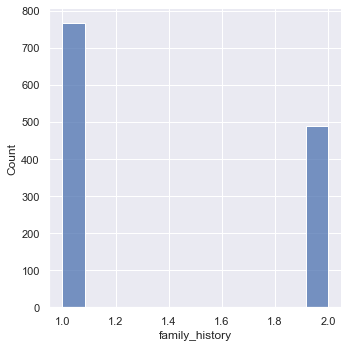

In [ ]:
#Graph Showing that more people answered no to a family history of mental illness
#1|No , 2|Yes
sns.displot(dfnum['family_history'])

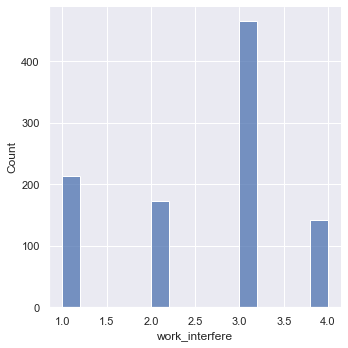

In [ ]:
#Graph Showing that respondent's mental health interferrence with work 
#1|Never , 2|Rarely , 3|Sometimes , 4|Often
sns.displot(dfnum['work_interfere'])

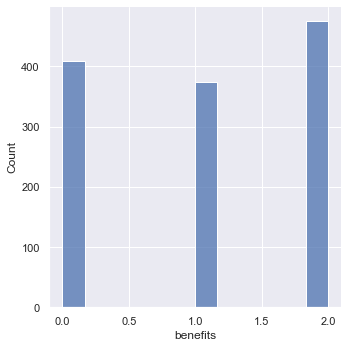

In [ ]:
#Graph Showing if a respondent's employer provides mental health benefits
#0|Don't know , 1|No , 2|Yes
sns.displot(dfnum['benefits'])

In [ ]:
df.head()

timestamp  age gender         country state self_employed  \
0  2014-08-27 11:29:31   37      F   United States    IL           NaN   
1  2014-08-27 11:29:37   44      M   United States    IN           NaN   
2  2014-08-27 11:29:44   32      M          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31      M  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31      M   United States    TX           NaN   

  family_history treatment work_interfere    no_employees remote_work  \
0             No       Yes          Often            6-25          No   
1             No        No         Rarely  More than 1000          No   
2             No        No         Rarely            6-25          No   
3            Yes       Yes          Often          26-100          No   
4             No        No          Never         100-500         Yes   

  tech_company    benefits care_options wellness_program   seek_help  \
0          Yes         Yes     Not sure               No         Yes   
1           No  Don't know           No       Don't know  Don't know   
2          Yes          No           No               No          No   
3          Yes          No          Yes               No          No   
4          Yes         Yes           No       Don't know  Don't know   

    anonymity               leave mental_health_consequence  \
0         Yes       Somewhat easy                        No   
1  Don't know          Don't know                     Maybe   
2  Don't know  Somewhat difficult                        No   
3          No  Somewhat difficult                       Yes   
4  Don't know          Don't know                        No   

  phys_health_consequence     coworkers supervisor mental_health_interview  \
0                      No  Some of them        Yes                      No   
1                      No            No         No                      No   
2                      No           Yes        Yes                     Yes   
3                     Yes  Some of them         No                   Maybe   
4                      No  Some of them        Yes                     Yes   

  phys_health_interview mental_vs_physical obs_consequence comments  
0                 Maybe                Yes              No      NaN  
1                    No         Don't know              No      NaN  
2                   Yes                 No              No      NaN  
3                 Maybe                 No             Yes      NaN  
4                   Yes         Don't know              No      NaN

In [ ]:
#age is our only numeric column and most of our responses are from ages 27 - 36
df.describe()

age
count  1251
mean     32
std       7
min      18
25%      27
50%      31
75%      36
max      72

<AxesSubplot:>

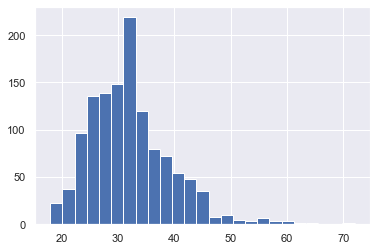

In [ ]:
df['age'].hist(bins = 25)

In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


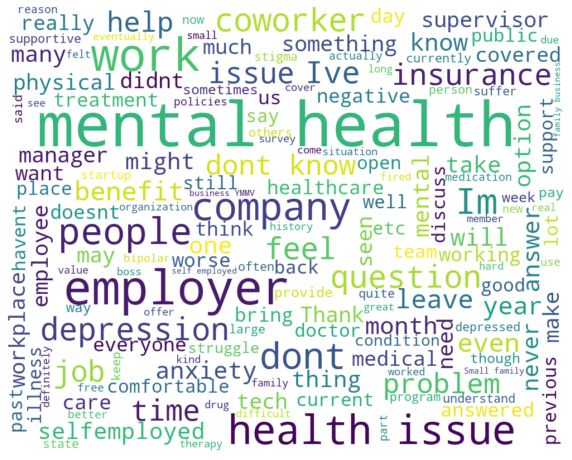

In [ ]:
from wordcloud import WordCloud, STOPWORDS


#from https://www.kaggle.com/knooob/eda-for-kaggle-survey-data
""" 
This method takes the column as parameter and returns the string containing all the
values that were separated by ','
"""

def combineText(Column):
    text = []
    result = ""
    for entry in Column:
        text.append(str(entry).split(','))

    for comment in text:
        for word in comment:
            word = word.strip()
            result += word
            result += " "
            
    return result

has_comments = df[df['comments'].notnull()]
all_comments = combineText(has_comments['comments'])
all_comments = re.sub(r'[^\w\s]','', all_comments)
wordcloud = WordCloud(width = 1000, height = 800,
                        background_color ="white",
                        min_font_size = 15, 
                        stopwords = set(STOPWORDS)).generate(all_comments)
plt.figure(figsize = [10, 10])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
for col in df.columns:
    print(col, df[col].nunique())

timestamp 1244
age 45
gender 3
country 47
state 45
self_employed 2
family_history 2
treatment 2
work_interfere 4
no_employees 6
remote_work 2
tech_company 2
benefits 3
care_options 3
wellness_program 3
seek_help 3
anonymity 3
leave 5
mental_health_consequence 3
phys_health_consequence 3
coworkers 3
supervisor 3
mental_health_interview 3
phys_health_interview 3
mental_vs_physical 3
obs_consequence 2
comments 158


In [ ]:
for col in df.columns:
    print(df[col].value_counts())

2014-08-27 12:31:41    2
2014-08-27 14:22:43    2
2014-08-27 15:55:07    2
2014-08-27 12:54:11    2
2014-08-28 09:59:39    2
                      ..
2014-08-27 12:25:09    1
2014-08-27 12:31:14    1
2014-08-28 17:31:06    1
2014-08-27 14:10:15    1
2014-08-28 02:32:11    1
Name: timestamp, Length: 1244, dtype: int64
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
22    21
41    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
20     6
50     6
48     6
51     5
56     4
49     4
57     3
55     3
54     3
60     2
47     2
62     1
58     1
53     1
61     1
72     1
65     1
Name: age, dtype: int64
M        995
F        251
Other     11
Name: gender, dtype: int64
United States             750
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Austra

In [ ]:
for i, j in enumerate(df.columns):
    print(i,j)

0 timestamp
1 age
2 gender
3 country
4 state
5 self_employed
6 family_history
7 treatment
8 work_interfere
9 no_employees
10 remote_work
11 tech_company
12 benefits
13 care_options
14 wellness_program
15 seek_help
16 anonymity
17 leave
18 mental_health_consequence
19 phys_health_consequence
20 coworkers
21 supervisor
22 mental_health_interview
23 phys_health_interview
24 mental_vs_physical
25 obs_consequence
26 comments


<AxesSubplot:xlabel='age'>

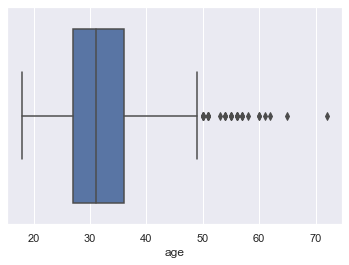

In [ ]:
sns.boxplot(x='age', data = df)

<AxesSubplot:xlabel='gender', ylabel='count'>

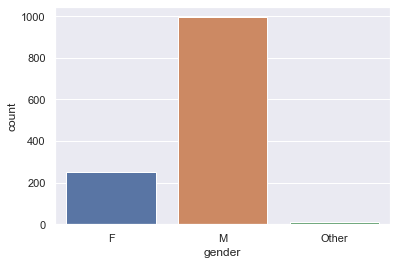

In [ ]:
sns.countplot(data = df, x = 'gender')

In [ ]:
#pip install plotly==5.4.0
import plotly.express as px

In [ ]:
state_df = df['state'].value_counts().to_frame()
state_df.reset_index(level=0, inplace=True)
state_df

index  state
0     CA    138
1     WA     70
2     NY     56
3     TN     45
4     TX     44
5     OH     30
6     PA     29
7     OR     29
8     IL     28
9     IN     27
10    MI     22
11    MN     21
12    MA     20
13    FL     15
14    VA     14
15    NC     14
16    MO     12
17    WI     12
18    GA     12
19    UT     10
20    CO      9
21    AL      7
22    AZ      7
23    MD      7
24    NJ      6
25    OK      6
26    KY      5
27    SC      5
28    IA      4
29    DC      4
30    CT      4
31    SD      3
32    NV      3
33    NH      3
34    VT      3
35    KS      3
36    NE      2
37    WY      2
38    NM      2
39    ME      1
40    MS      1
41    RI      1
42    LA      1
43    ID      1
44    WV      1

In [ ]:
#https://medium.com/geekculture/create-a-choropleth-map-of-state-unemployment-rates-with-plotly-1354050e0cfd
fig = px.choropleth(state_df,
                    locations='index',
                    color='state',
                    color_continuous_scale='spectral_r',
                    hover_name='index',
                    locationmode='USA-states',
                    scope='usa')
fig.show()

<AxesSubplot:xlabel='self_employed', ylabel='count'>

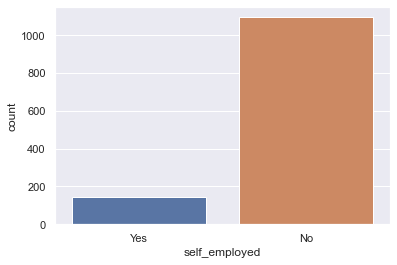

In [ ]:
sns.countplot(data = df, x = 'self_employed')

<AxesSubplot:xlabel='family_history', ylabel='count'>

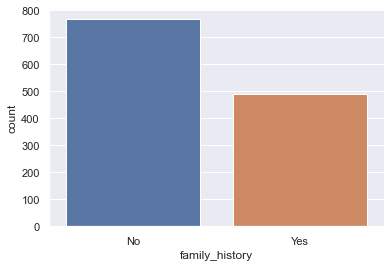

In [ ]:
sns.countplot(data = df, x = 'family_history')

<AxesSubplot:xlabel='treatment', ylabel='count'>

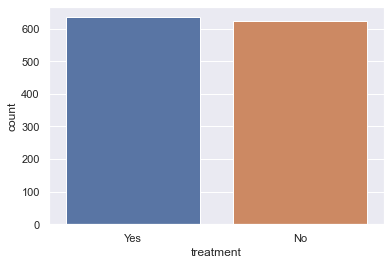

In [ ]:
sns.countplot(data = df, x = 'treatment')

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

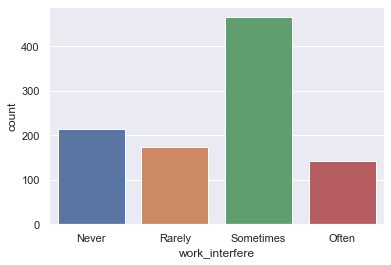

In [ ]:
sns.countplot(data = df, x = 'work_interfere', order = ['Never', 'Rarely', 'Sometimes', 'Often'])

<AxesSubplot:xlabel='coworkers', ylabel='count'>

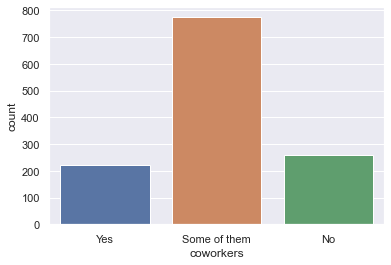

In [ ]:
sns.countplot(data = df, x = 'coworkers', order = ['Yes', 'Some of them','No'])

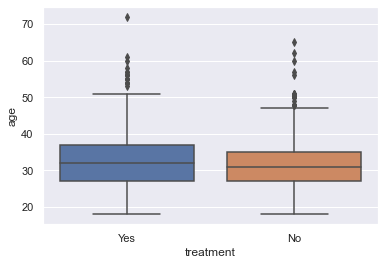

In [ ]:
ax = sns.boxplot(x="treatment", y="age", data=df)

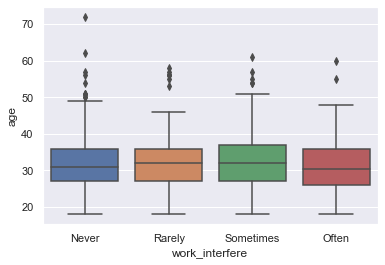

In [ ]:
ax = sns.boxplot(x="work_interfere", y="age", data=df, order = ['Never', 'Rarely', 'Sometimes', 'Often'])

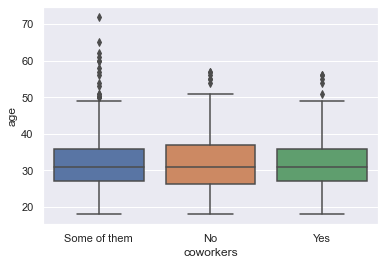

In [ ]:
ax = sns.boxplot(x="coworkers", y="age", data=df)

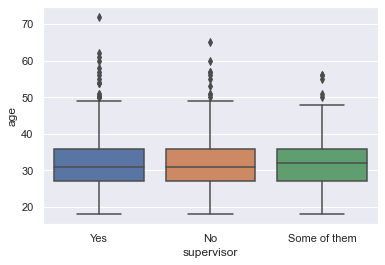

In [ ]:
ax = sns.boxplot(x="supervisor", y="age", data=df)

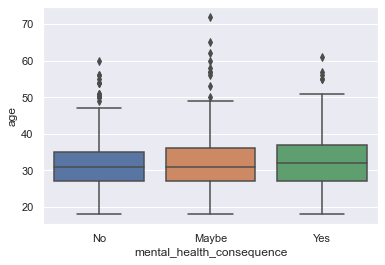

In [ ]:
ax = sns.boxplot(x="mental_health_consequence", y="age", data=df, order = ['No', 'Maybe', 'Yes'])

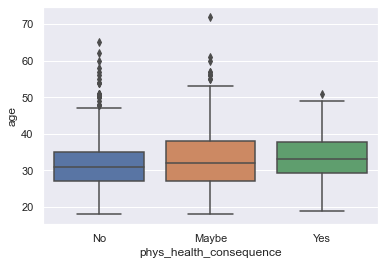

In [ ]:
ax = sns.boxplot(x="phys_health_consequence", y="age", data=df, order = ['No', 'Maybe', 'Yes'])

<AxesSubplot:xlabel='no_employees', ylabel='count'>

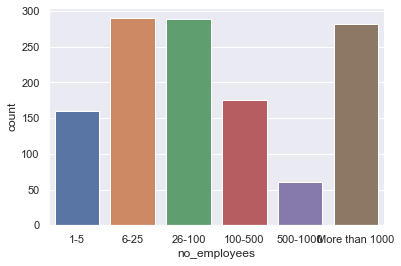

In [ ]:
sns.countplot(data = df, x="no_employees", order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'])

In [ ]:
'''
groups:                 [1, 2, 3, 4, 5, 6, 7, 9, 10, 11]
age
gender
country
state
self_employed
family history
treatment
no_employees
remote_work
tech_company
'''

'''
age vs:                  1 vs [3, 4, 5, 7, 8, 18, 19, 20, 21, 22, 23, 24]
country
state
self-employed
treatment
work_interfere
mental_health_consequences
phys_health_consequences
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical

'''

'''
gender vs:              2 vs [5, 7, 8, 9, 11, 18, 19, 20, 21, 22, 23, 24]
self_employed 
treatment
work_interfere
no_employees
tech_company
mental_health_consequences
phys_health_consequences
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
'''

'''
country vs:             3 vs [5:26]
'''

'''
state vs:               4 vs [5:26]
'''

'''
self_employed vs:       5 vs [7:26]
'''

'''
family_history vs:         6 vs [7, 8, 11, 18, 19, 20, 21, 22, 23]
treatment
work_interfere
tech_company
mental_health_consequence
phys_heath_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
'''

'''
treatment vs:    7 vs [8:25]
'''

'''
no_employees vs: 9 vs [10:26]
'''

'''
remote_work vs:  10 vs [11:26]

'''

'''
tech_company vs: 11 vs [12:26]

'''

'\ntech_company vs: 11 vs [12:26]\n\n'

In [ ]:
def grouped_catplot(df, x, grouped_by):
    sns.catplot(x=x, col=grouped_by,
                data=df, kind="count",
                height=5, aspect=.8);

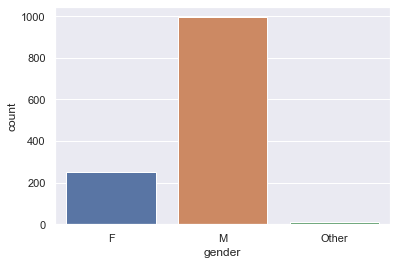

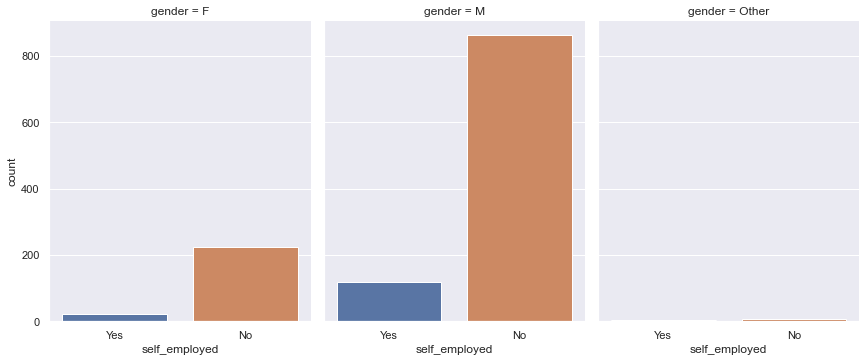

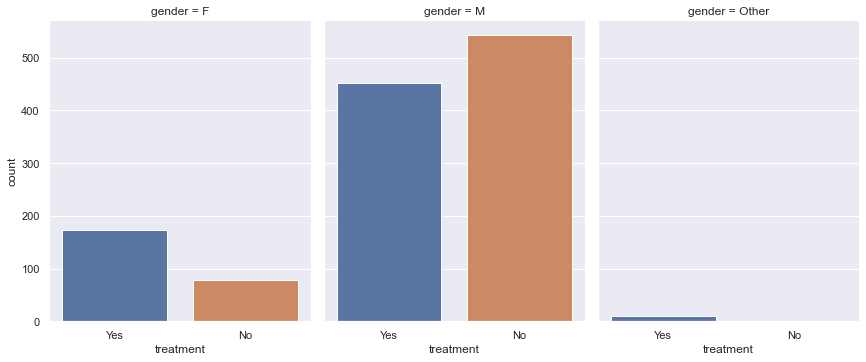

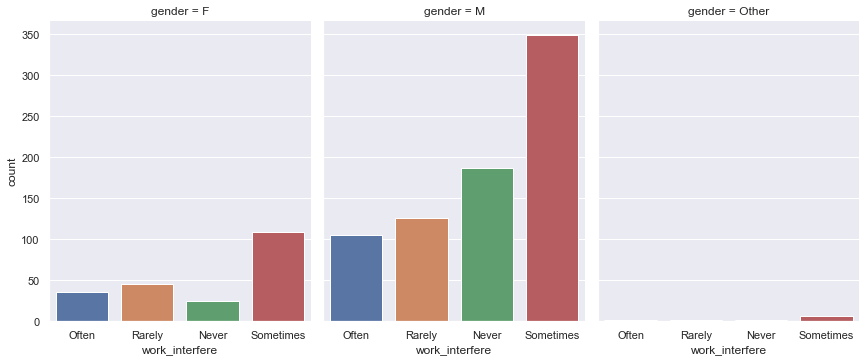

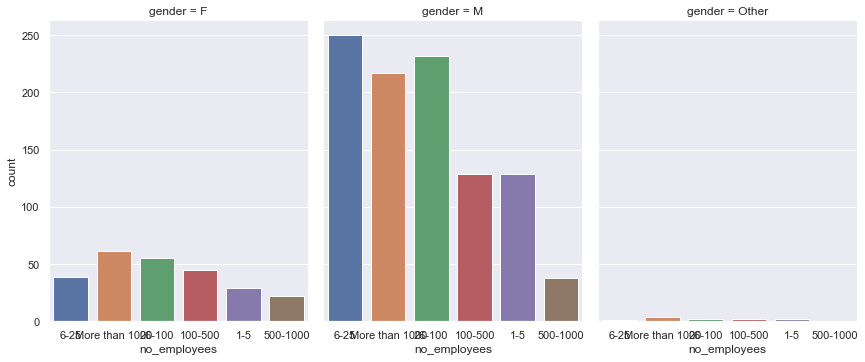

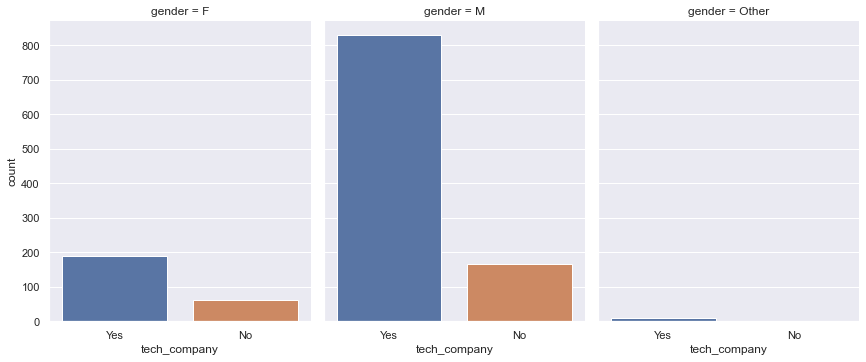

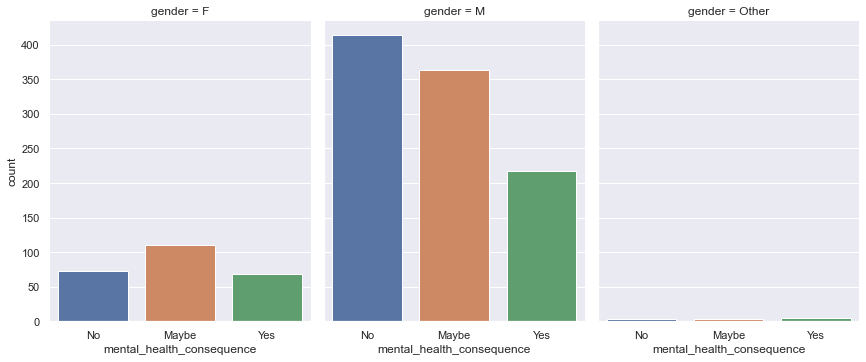

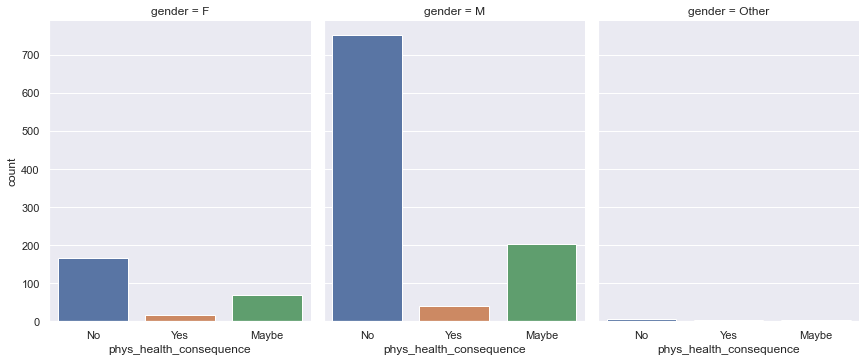

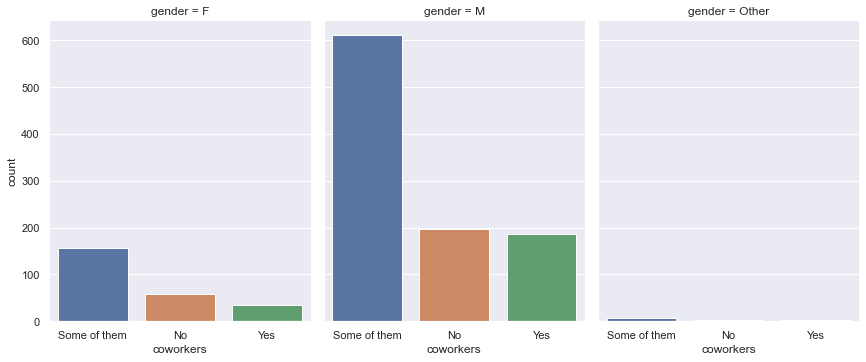

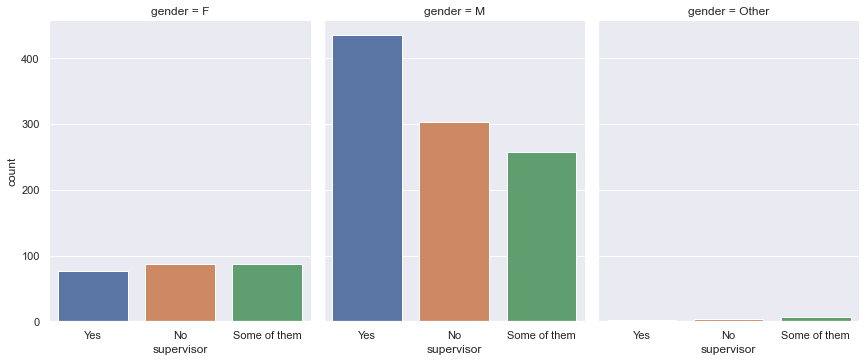

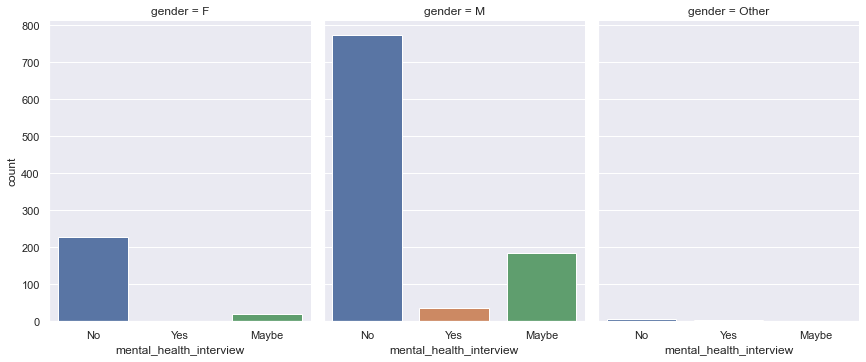

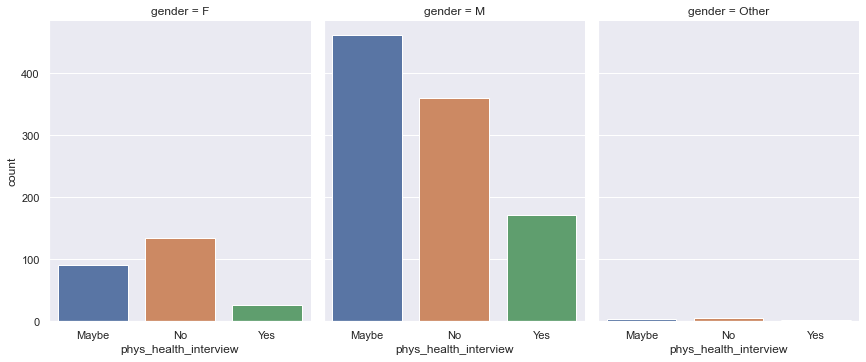

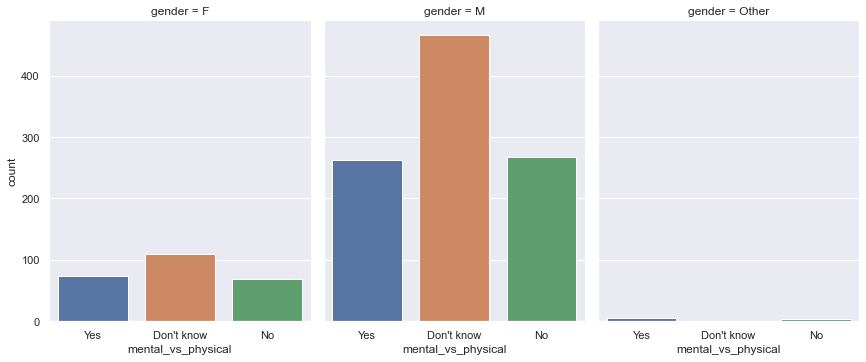

In [ ]:
'''
gender vs:              2 vs [5, 7, 8, 9, 11, 18, 19, 20, 21, 22, 23, 24]
self_employed 
treatment
work_interfere
no_employees
tech_company
mental_health_consequences
phys_health_consequences
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
'''

sns.countplot(data = df, x = 'gender')
df_cols = df.columns.tolist()
for i in [5, 7, 8, 9, 11, 18, 19, 20, 21, 22, 23, 24]:
    grouped_catplot(df, df_cols[i], 'gender')

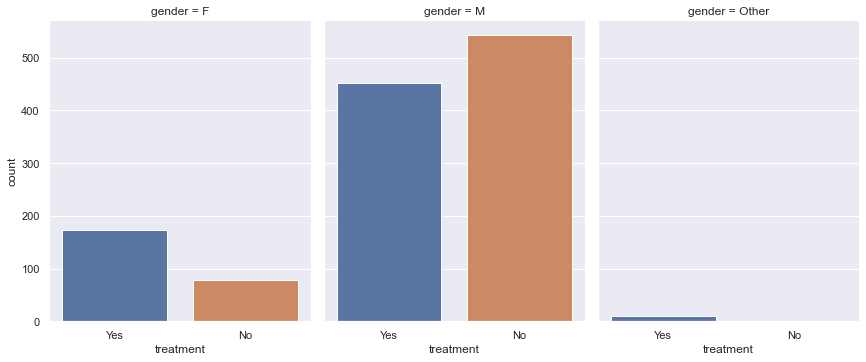

In [ ]:
sns.catplot(x="treatment", col="gender",
                data=df, kind="count",
                height=5, aspect=.8);

In [ ]:
cross = pd.crosstab(df['treatment'], df['gender'])
cross

gender       F    M  Other
treatment                 
No          78  543      1
Yes        173  452     10

In [ ]:
gender_values = df['gender'].unique().tolist()
treatment_values = df['treatment'].unique().tolist()
gender_tots = [cross[gender].sum() for gender in gender_values]
tot_dict = dict(zip(gender_values, gender_tots))

for group in gender_values:
    group_props = []
    for resp in treatment_values:
        group_props.append(cross[group][resp])
        #print(group_props)
    print(group, (group_props/tot_dict[group]).round(3)*100)

#count in cat / gender_total

F [68.9 31.1]
M [45.4 54.6]
Other [90.9  9.1]


In [ ]:
cross.index.tolist()

['No', 'Yes']

In [ ]:
test = zip(gender_values, gender_tots)
test = dict(test)
test

{'F': 251, 'M': 995, 'Other': 11}

In [ ]:
pd.crosstab(df["gender"], columns="count")

col_0   count
gender       
F         251
M         995
Other      11

In [ ]:
df['gender'].value_counts().rename_axis('values').reset_index(name='counts')

values  counts
0      M     995
1      F     251
2  Other      11

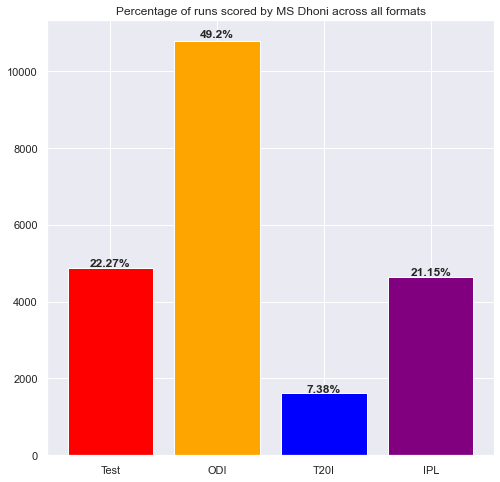

Format  Matches   Runs  Percentage
0   Test       90   4876          22
1    ODI      350  10773          49
2   T20I       98   1617           7
3    IPL      204   4632          21

In [ ]:
data = pd.DataFrame({'Format':['Test','ODI','T20I','IPL'],
                     'Matches': [90, 350, 98, 204],
                     'Runs':[4876,10773, 1617, 4632]
                    })
 
total_matches = data.Matches.sum()
total_runs = data.Runs.sum()

percentage = []
for i in range(data.shape[0]):
    pct = (data.Runs[i] / total_runs) * 100
    percentage.append(round(pct,2))
data['Percentage'] = percentage
 
# depict illustration
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(data.Format,data.Runs, color = colors_list)
plt.title('Percentage of runs scored by MS Dhoni across all formats')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()
data

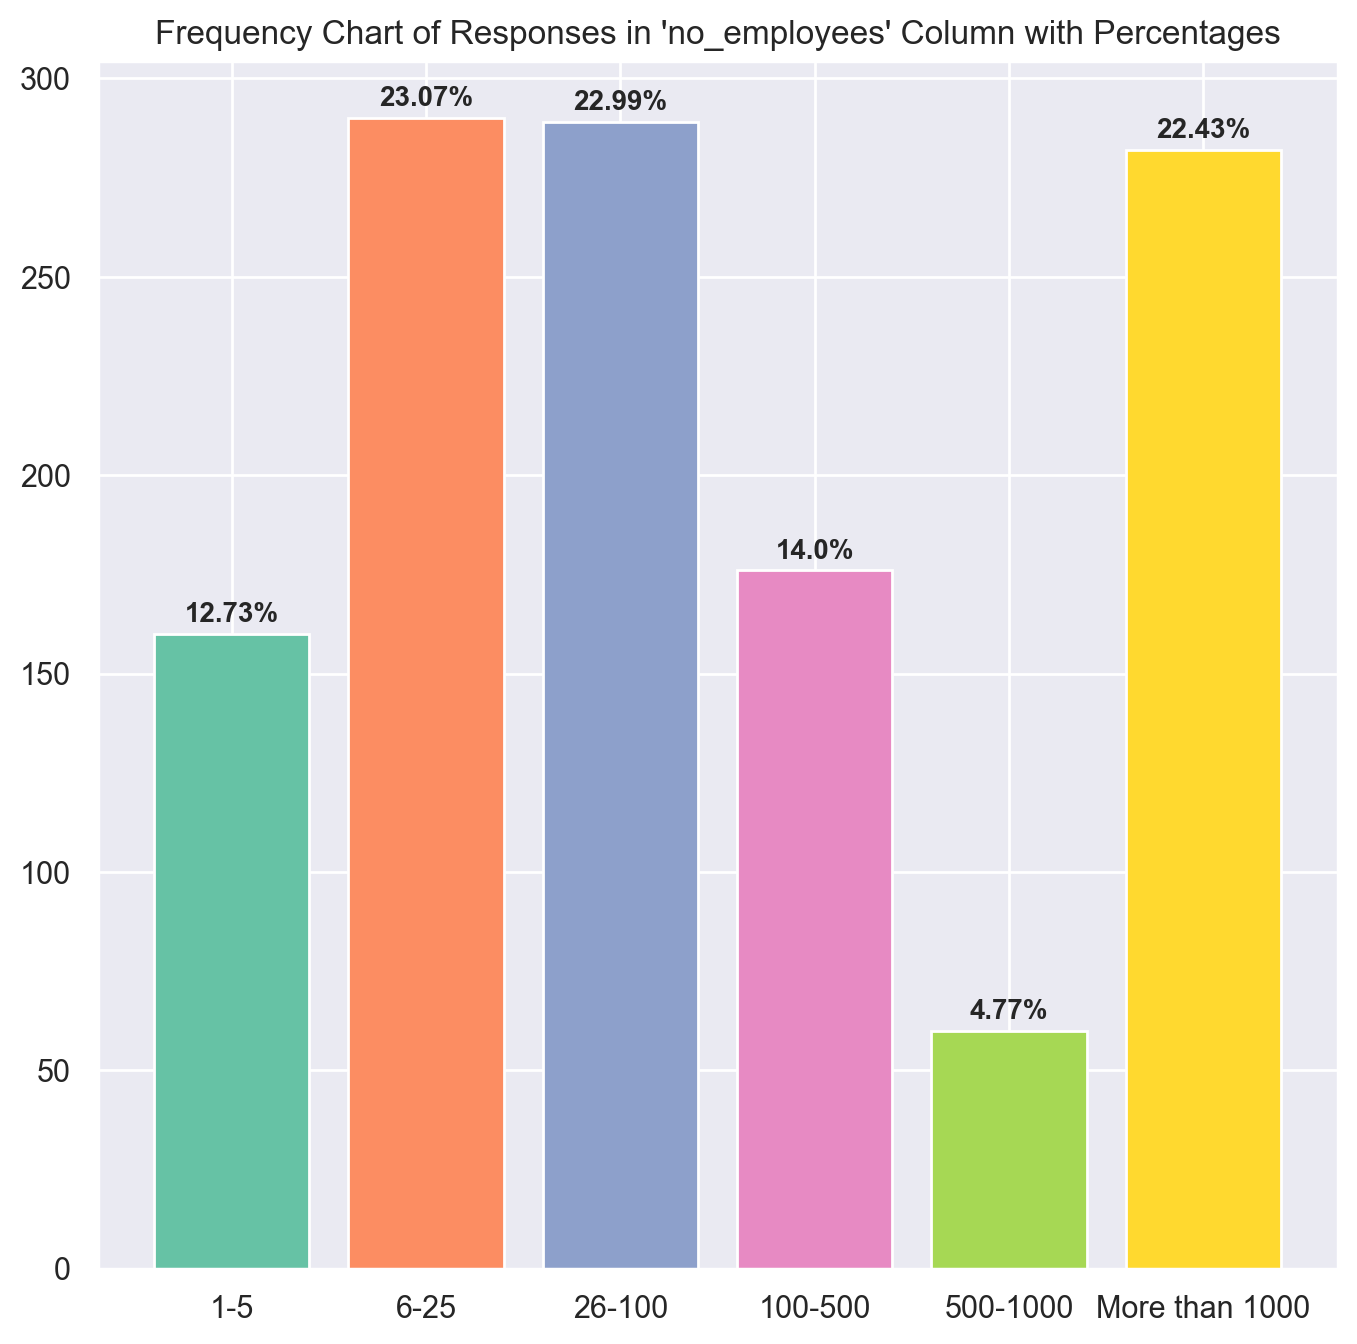

In [ ]:
#gender bars with percents
def perc_bars(col):
    data = df[col].value_counts().rename_axis('values').reset_index(name='counts')
    tot = df[col].value_counts().sum()
    data['prop'] = [round(i*100, 2) for i in data['counts']/tot]
    data = data.set_index('values')
    data = data.reindex(order_dict[col])

    plt.figure(figsize=(8,8), dpi = 200 )
    graph = plt.bar(data.index,data['counts'], color = plt.get_cmap("Set2").colors)
    plt.title('Frequency Chart of Responses in \'' + col + '\' Column with Percentages')

    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
                 y+height+3,
                 str(data.prop[i])+'%',
                 ha='center',
                 weight='bold')
        i+=1
    plt.savefig('data/graphs/'+col+'.png')
    plt.show()

perc_bars('no_employees')

In [ ]:
%matplotlib inline

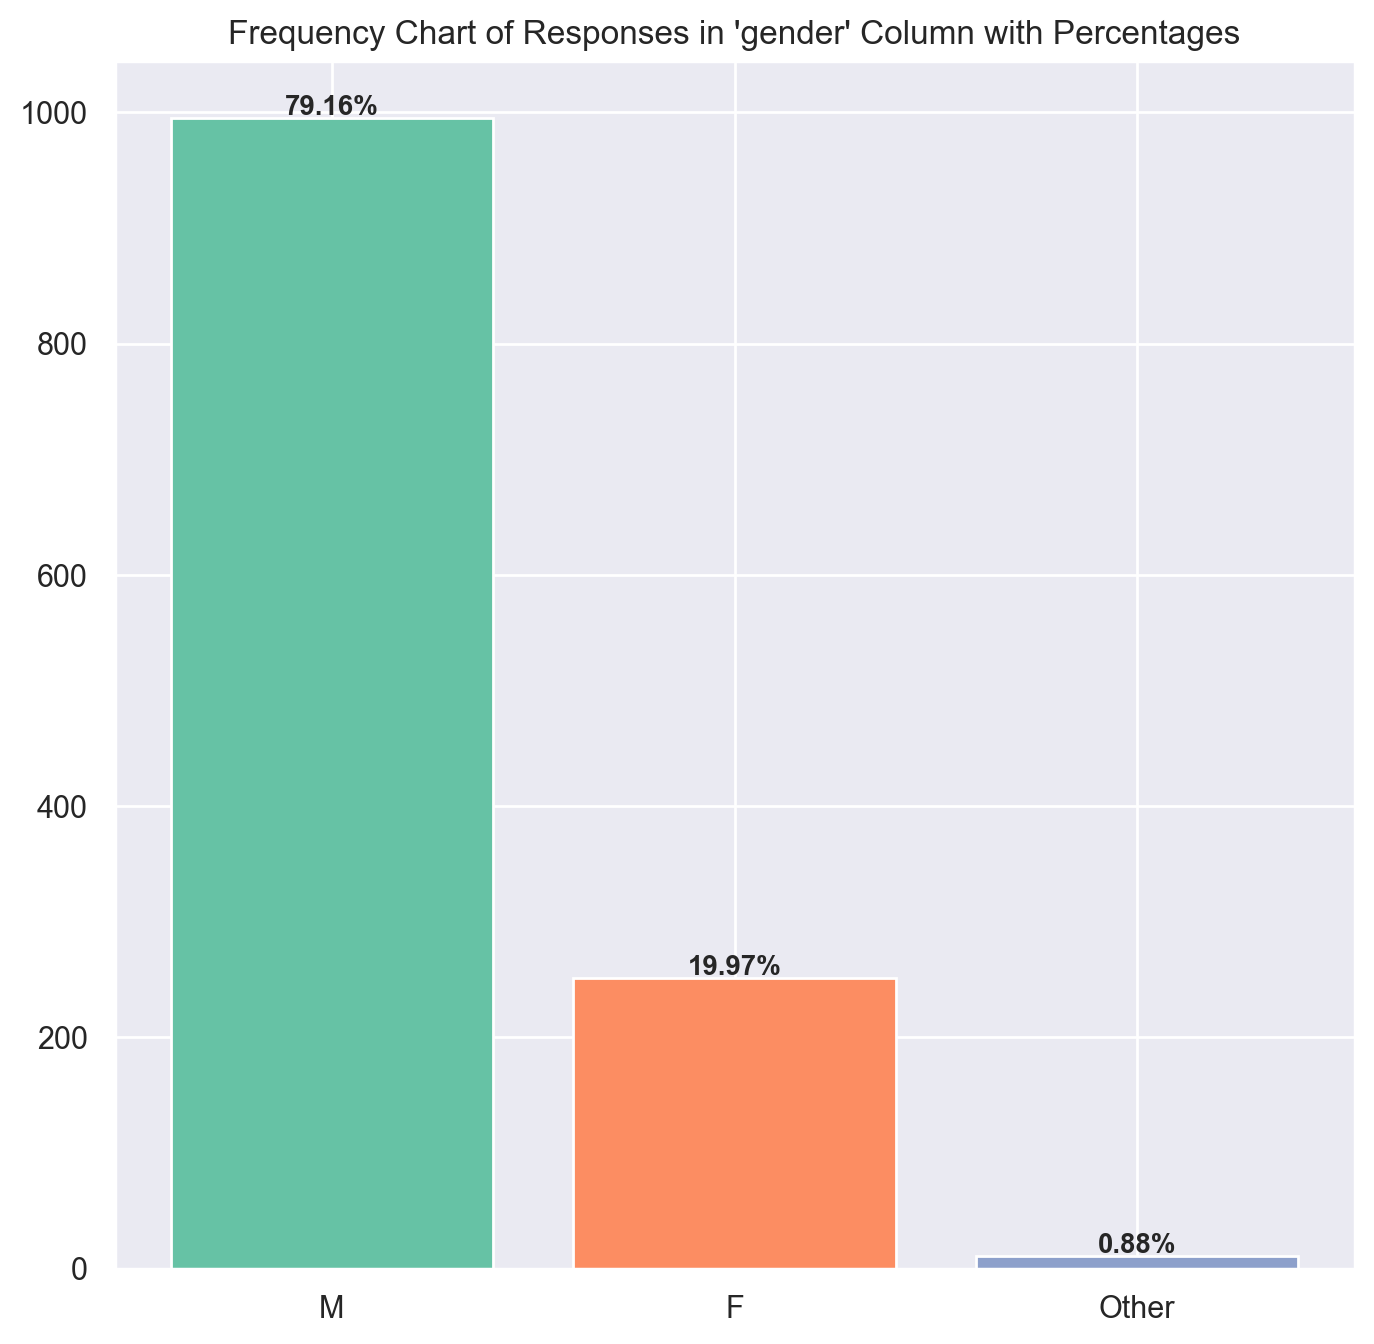

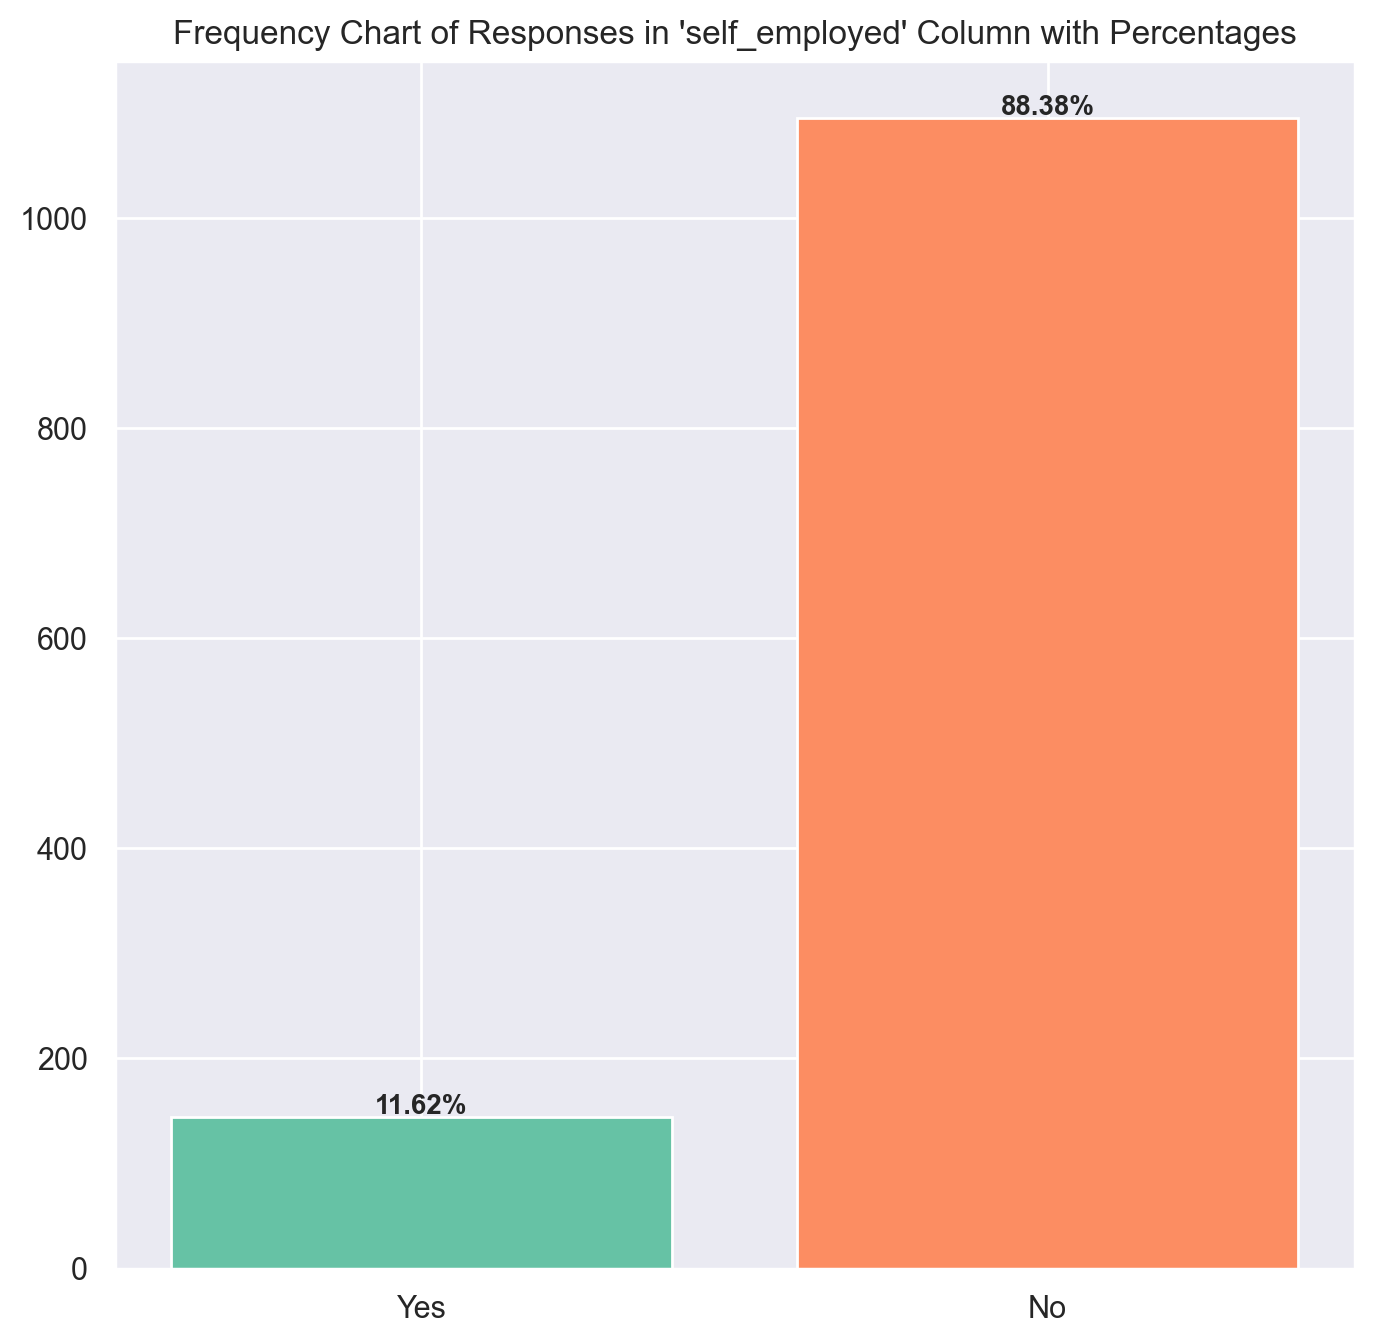

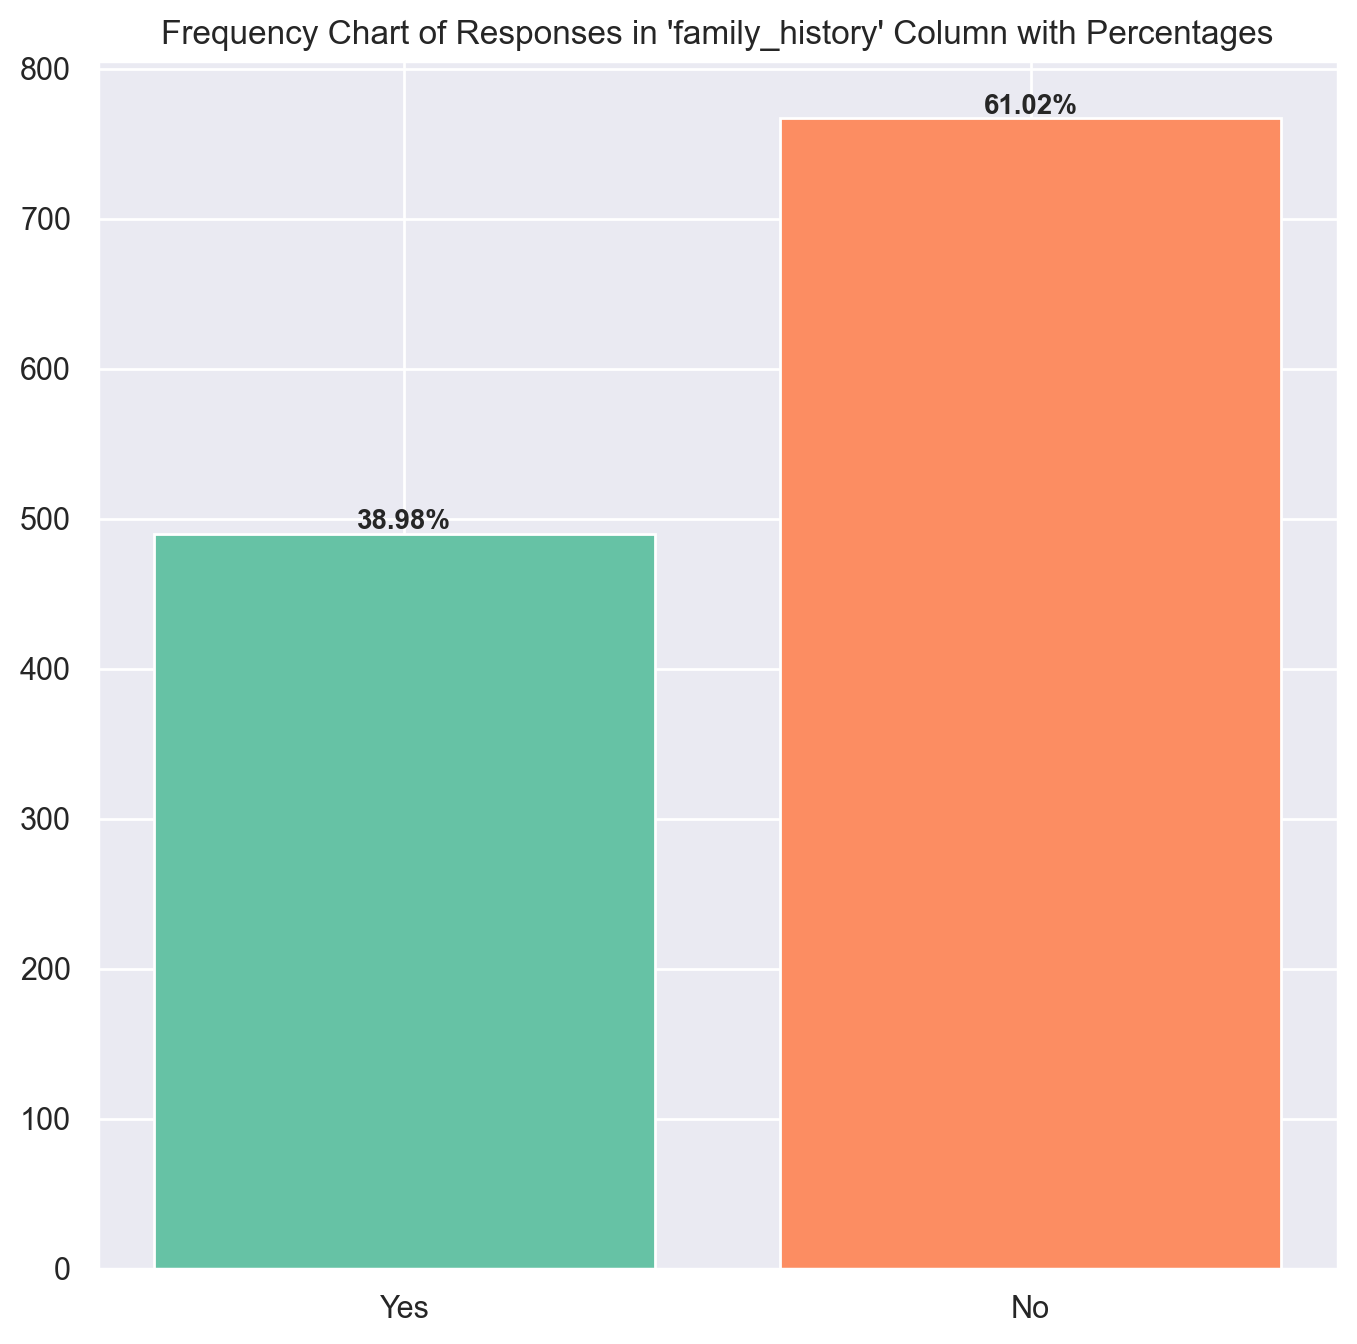

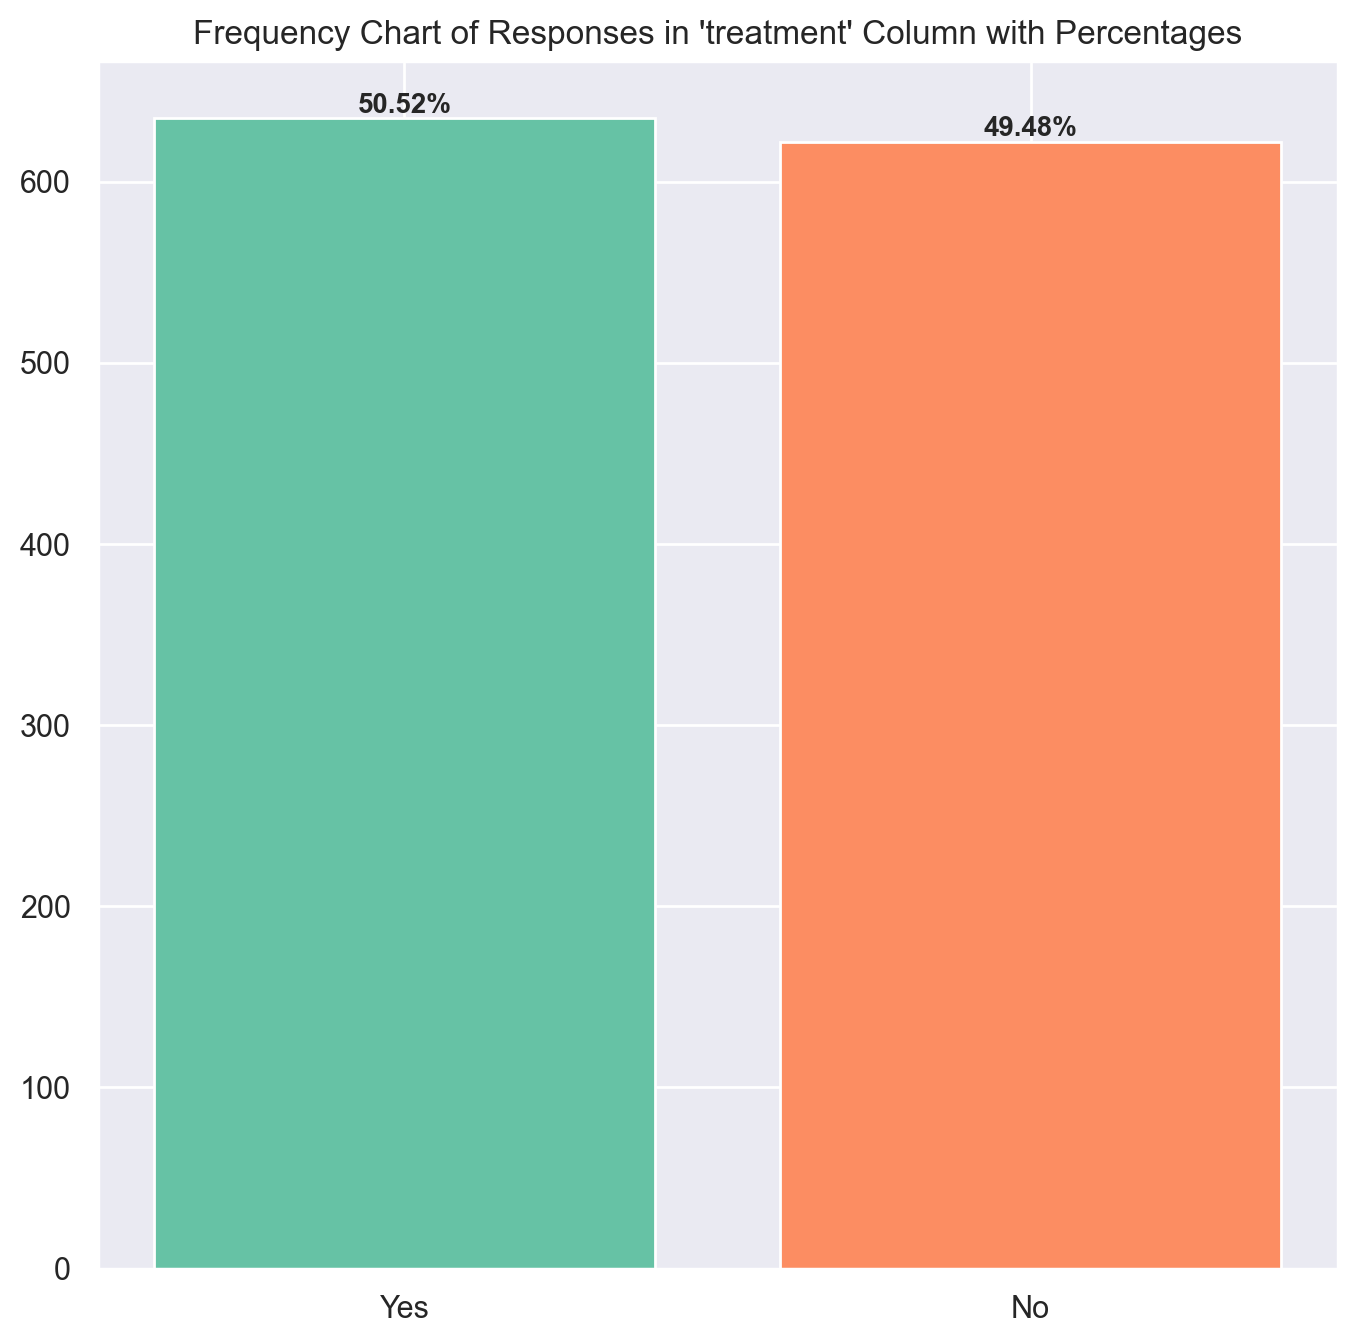

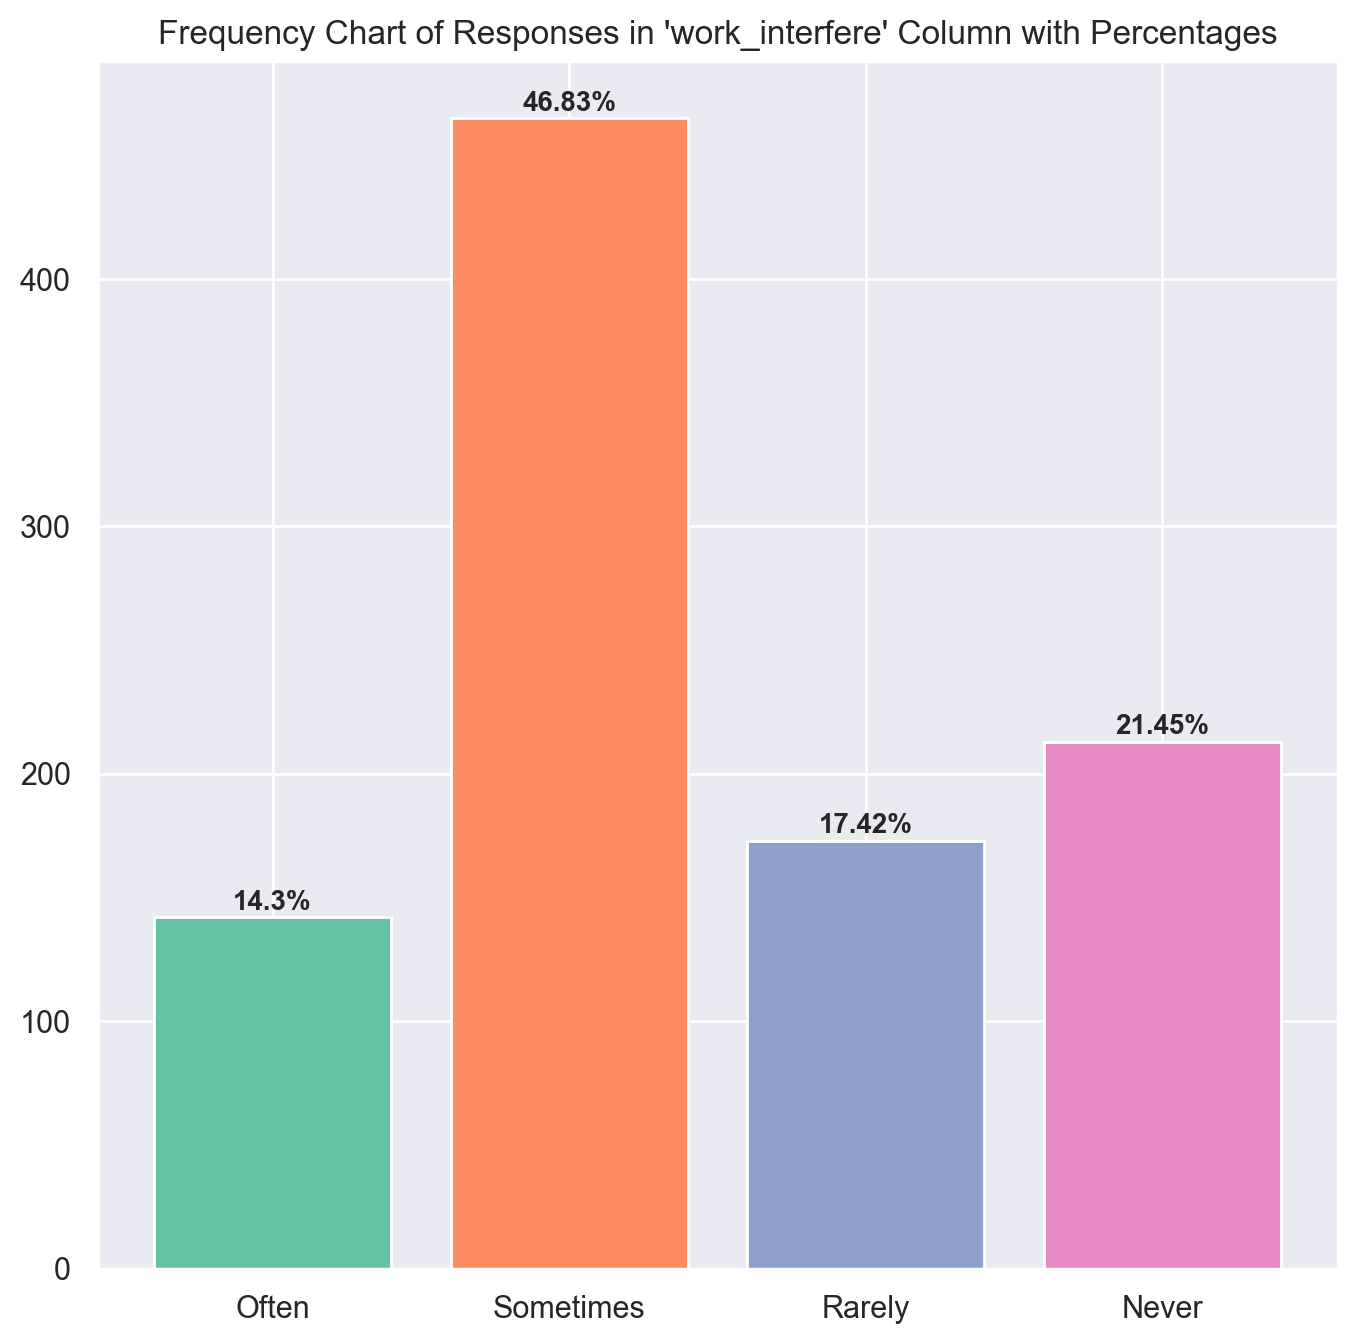

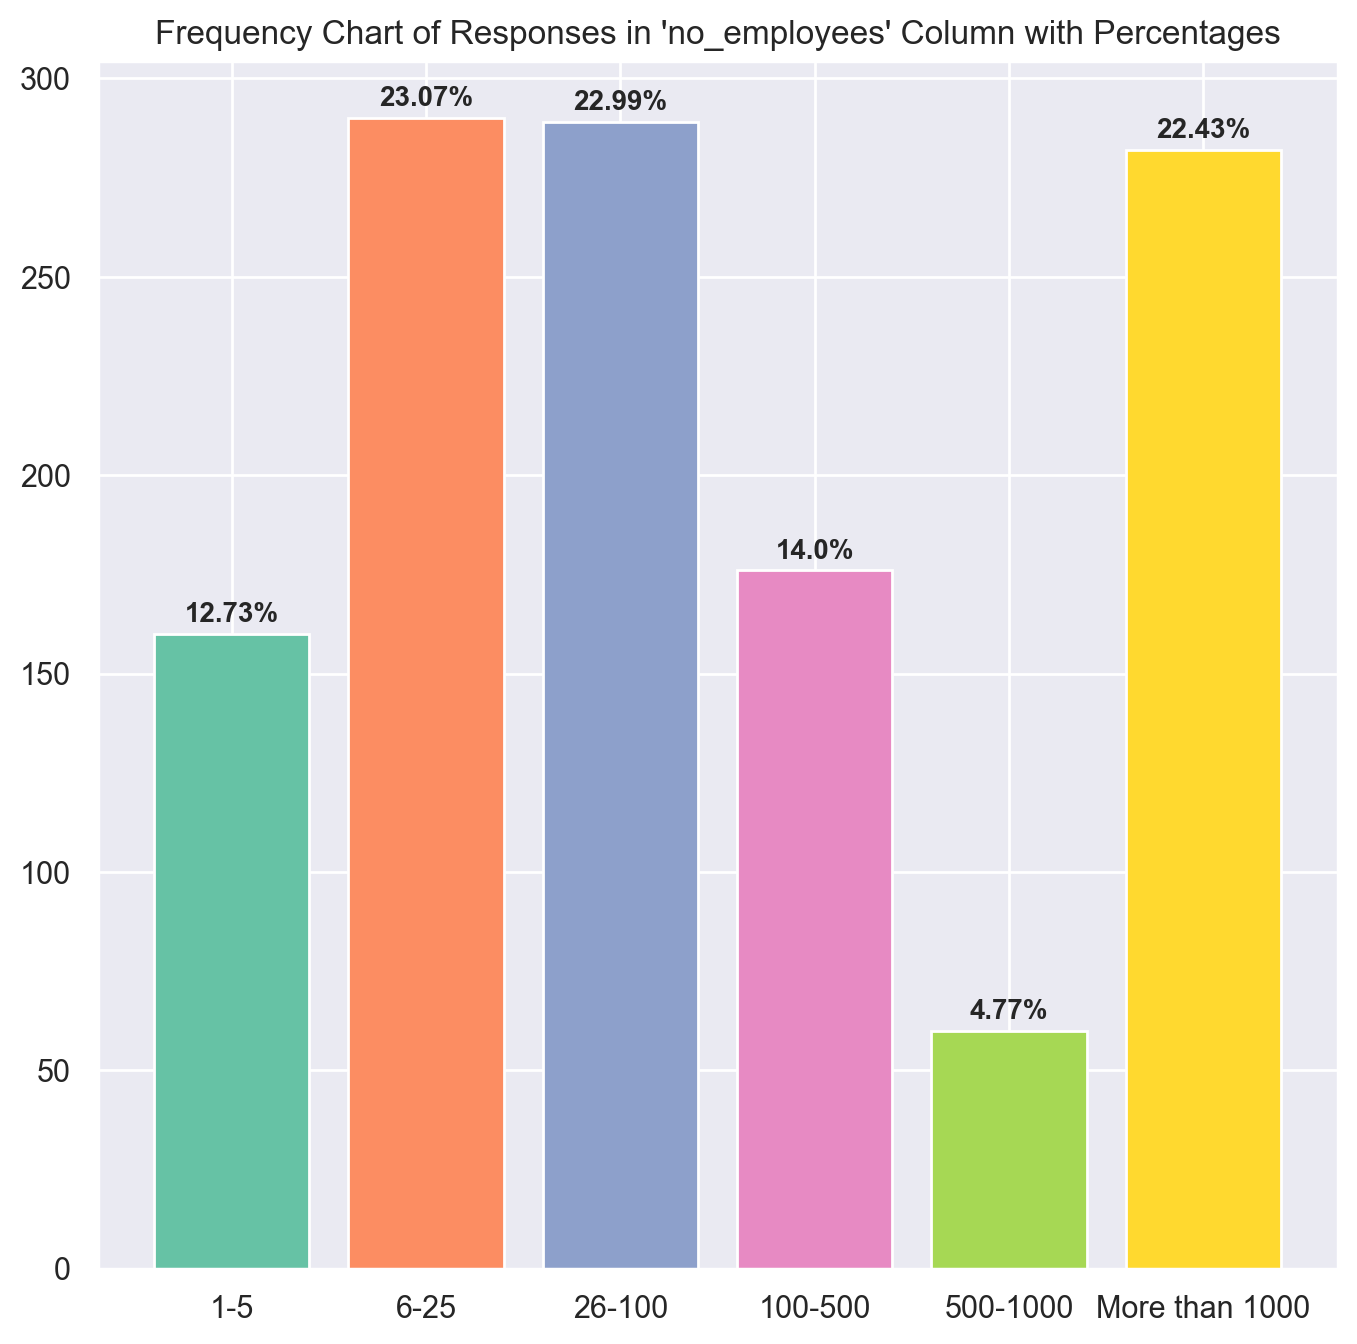

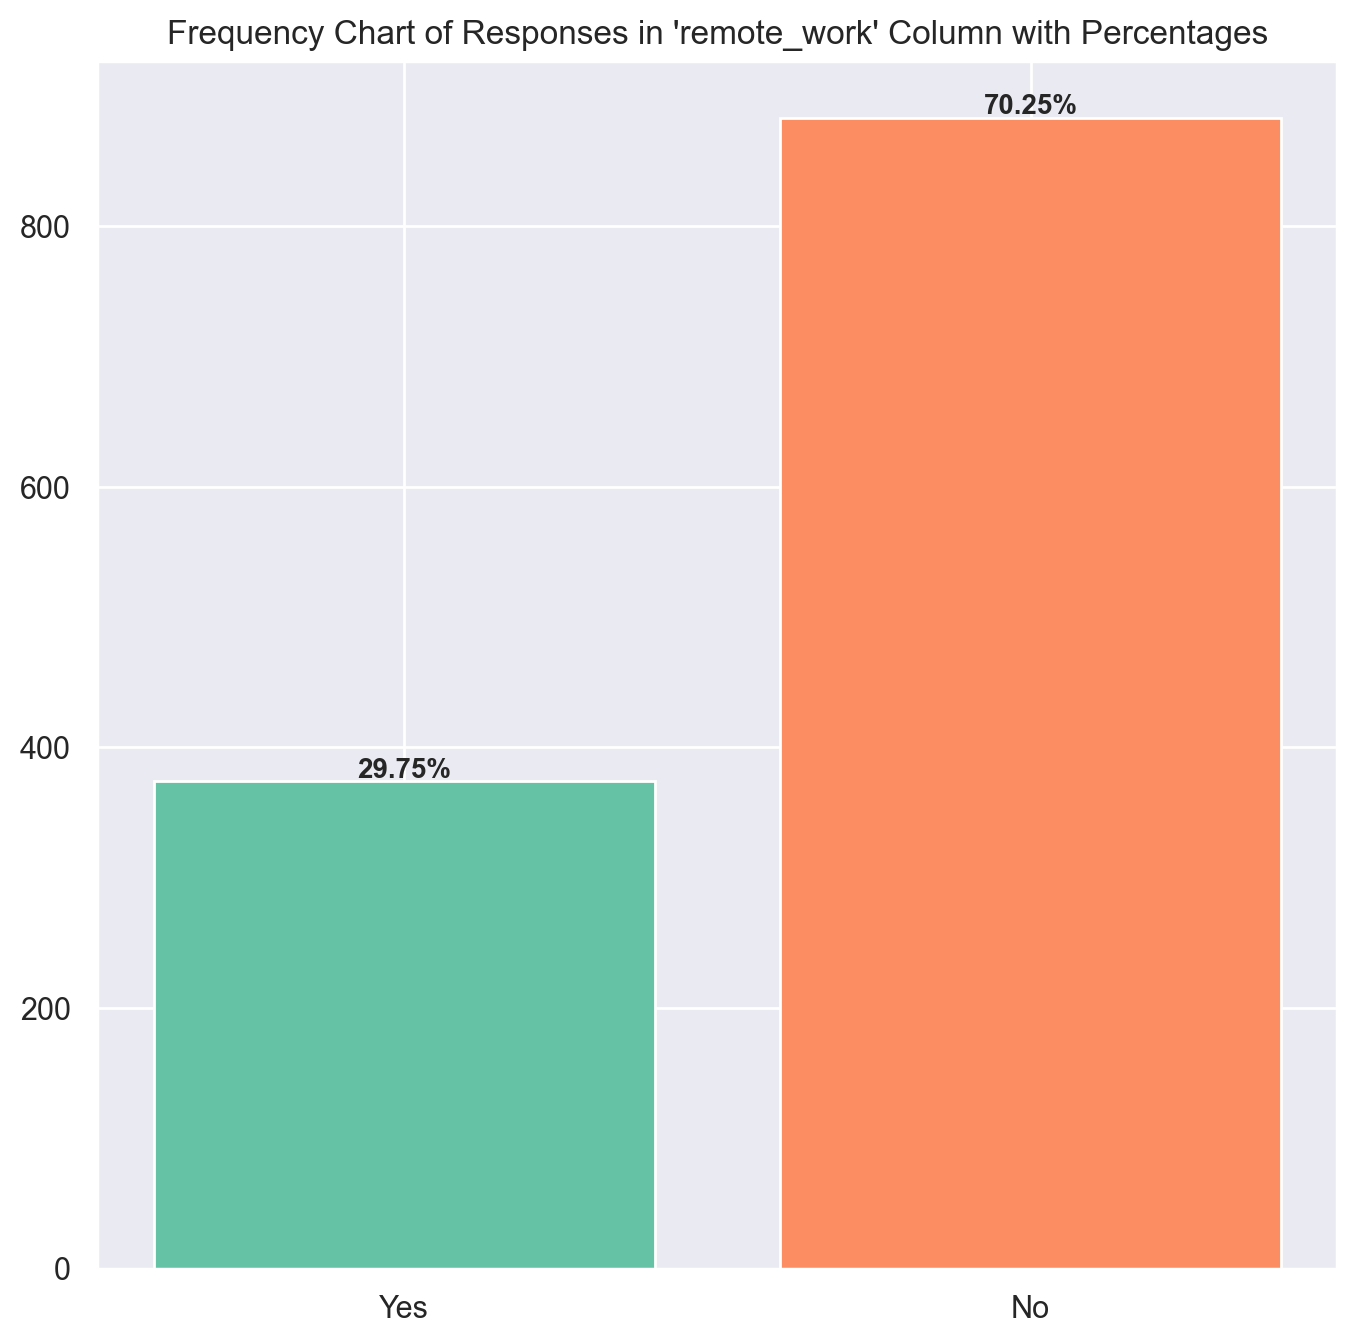

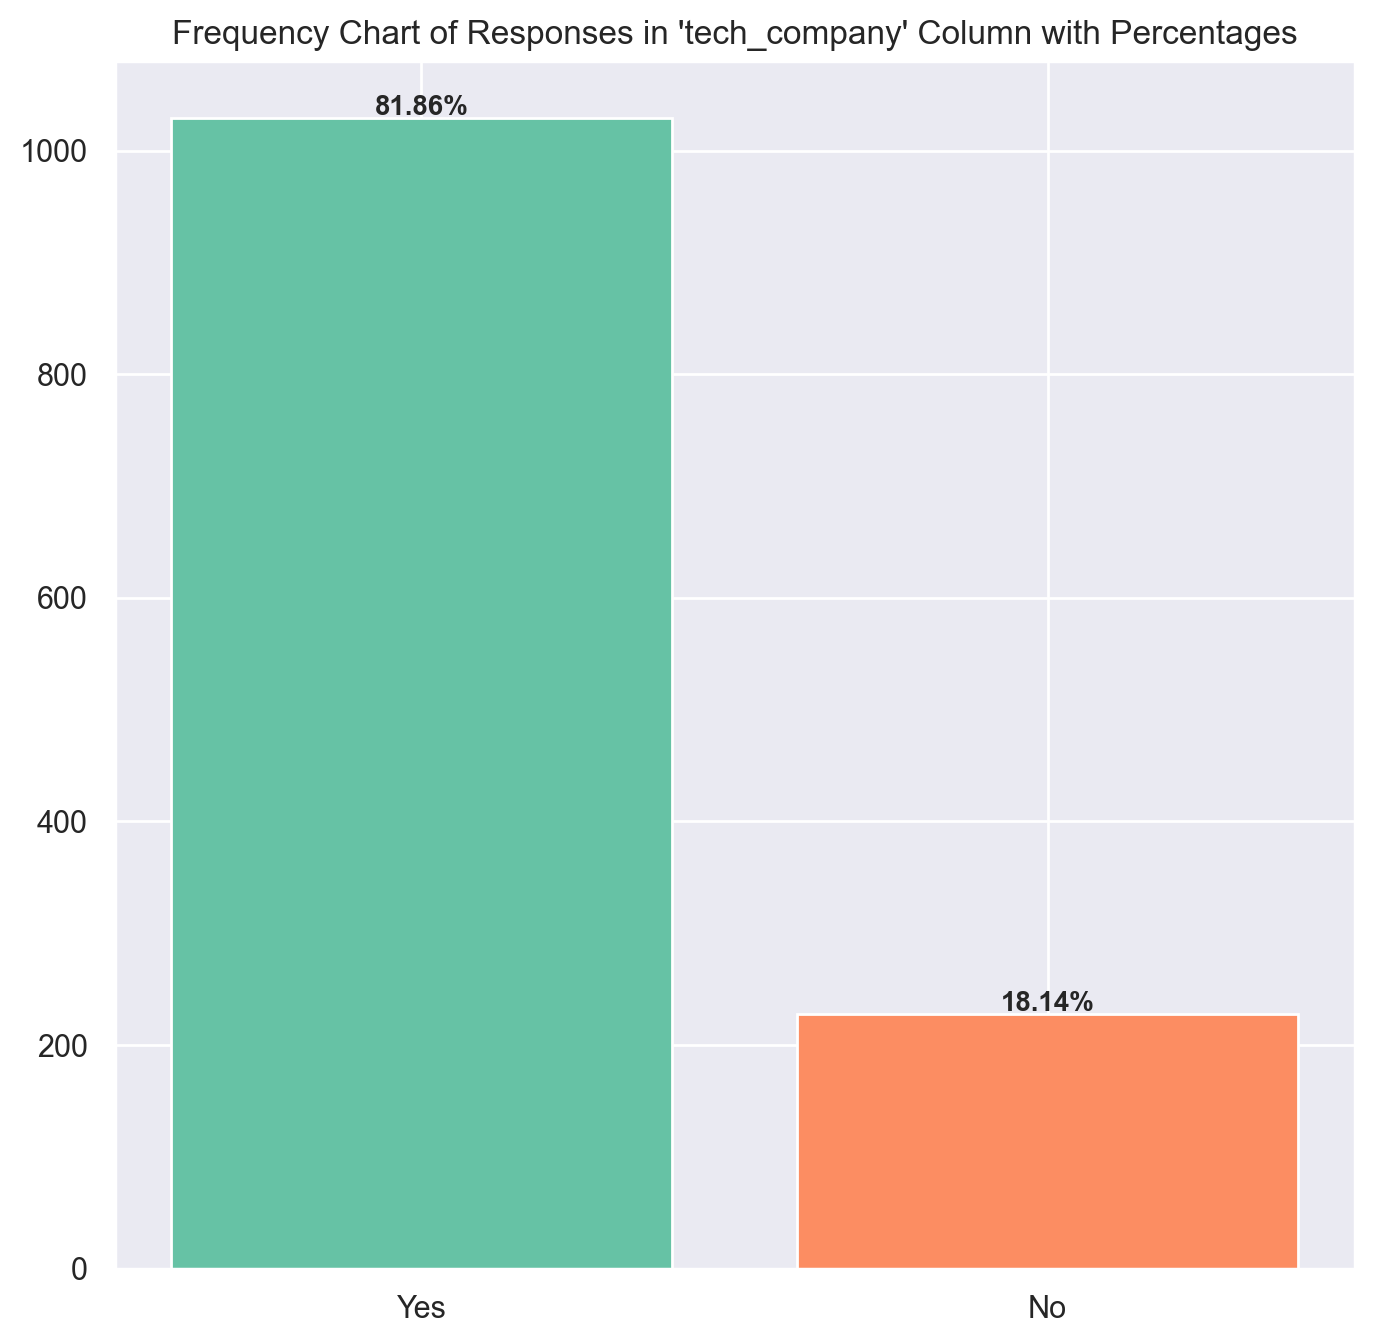

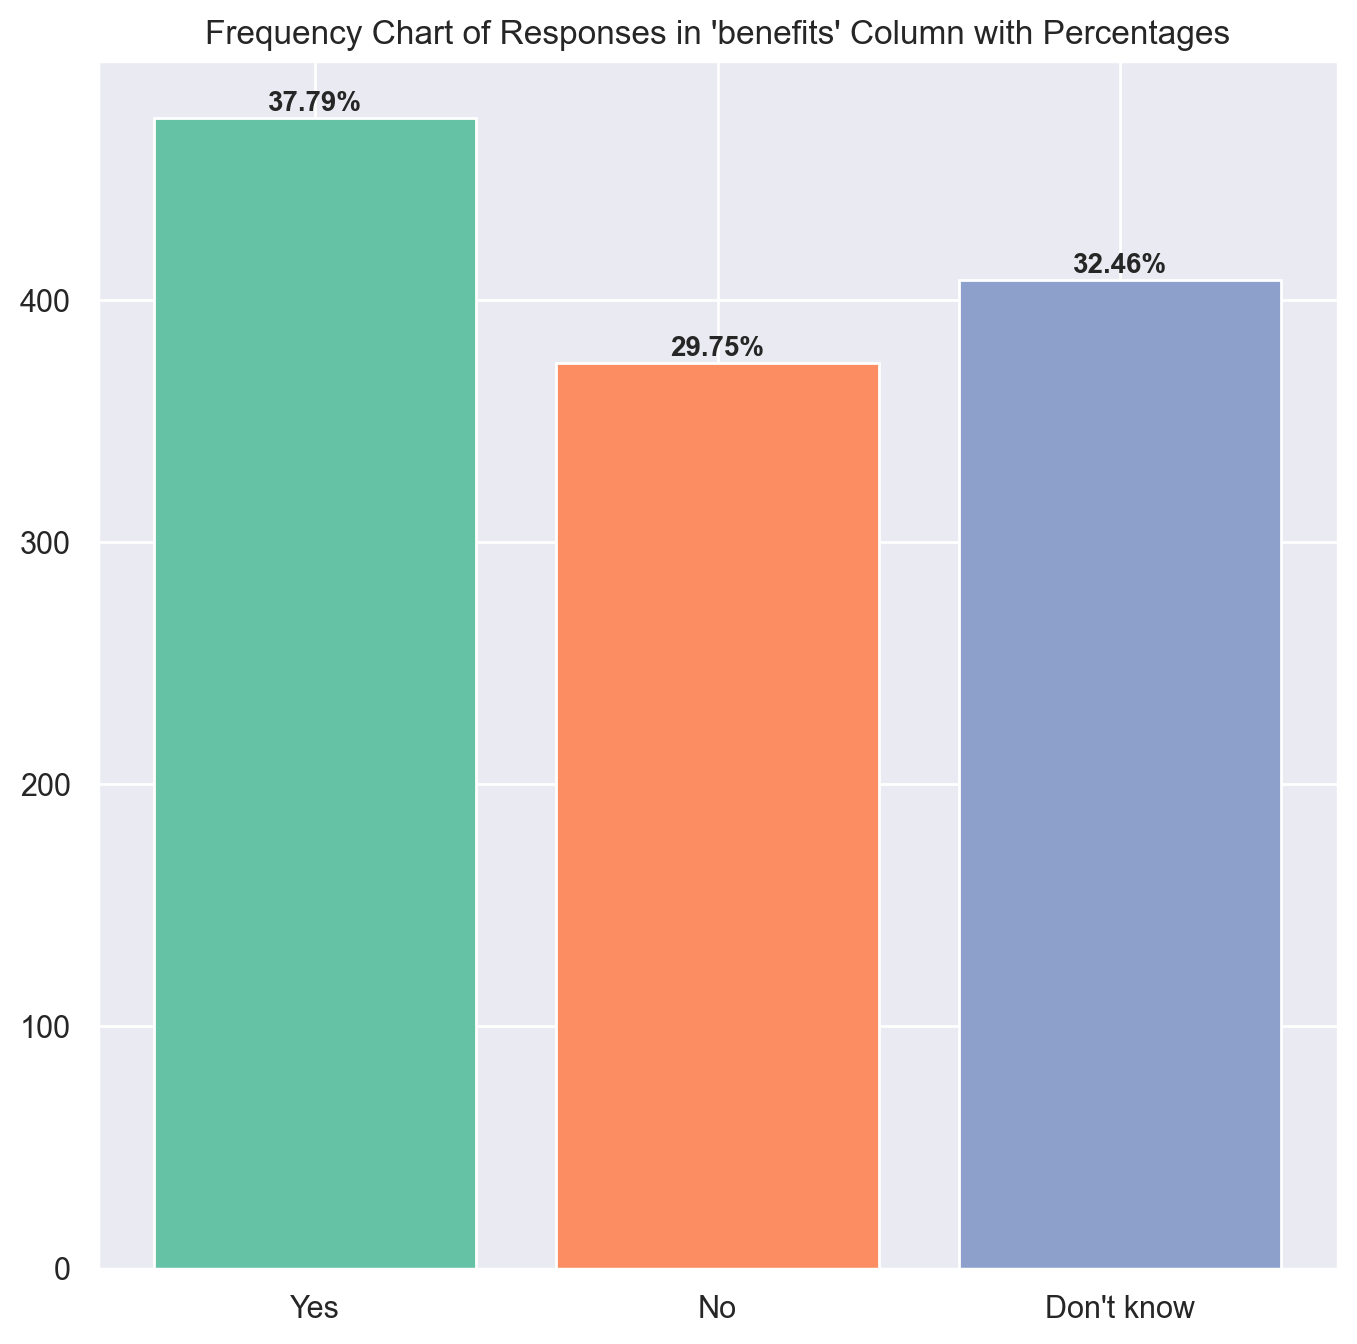

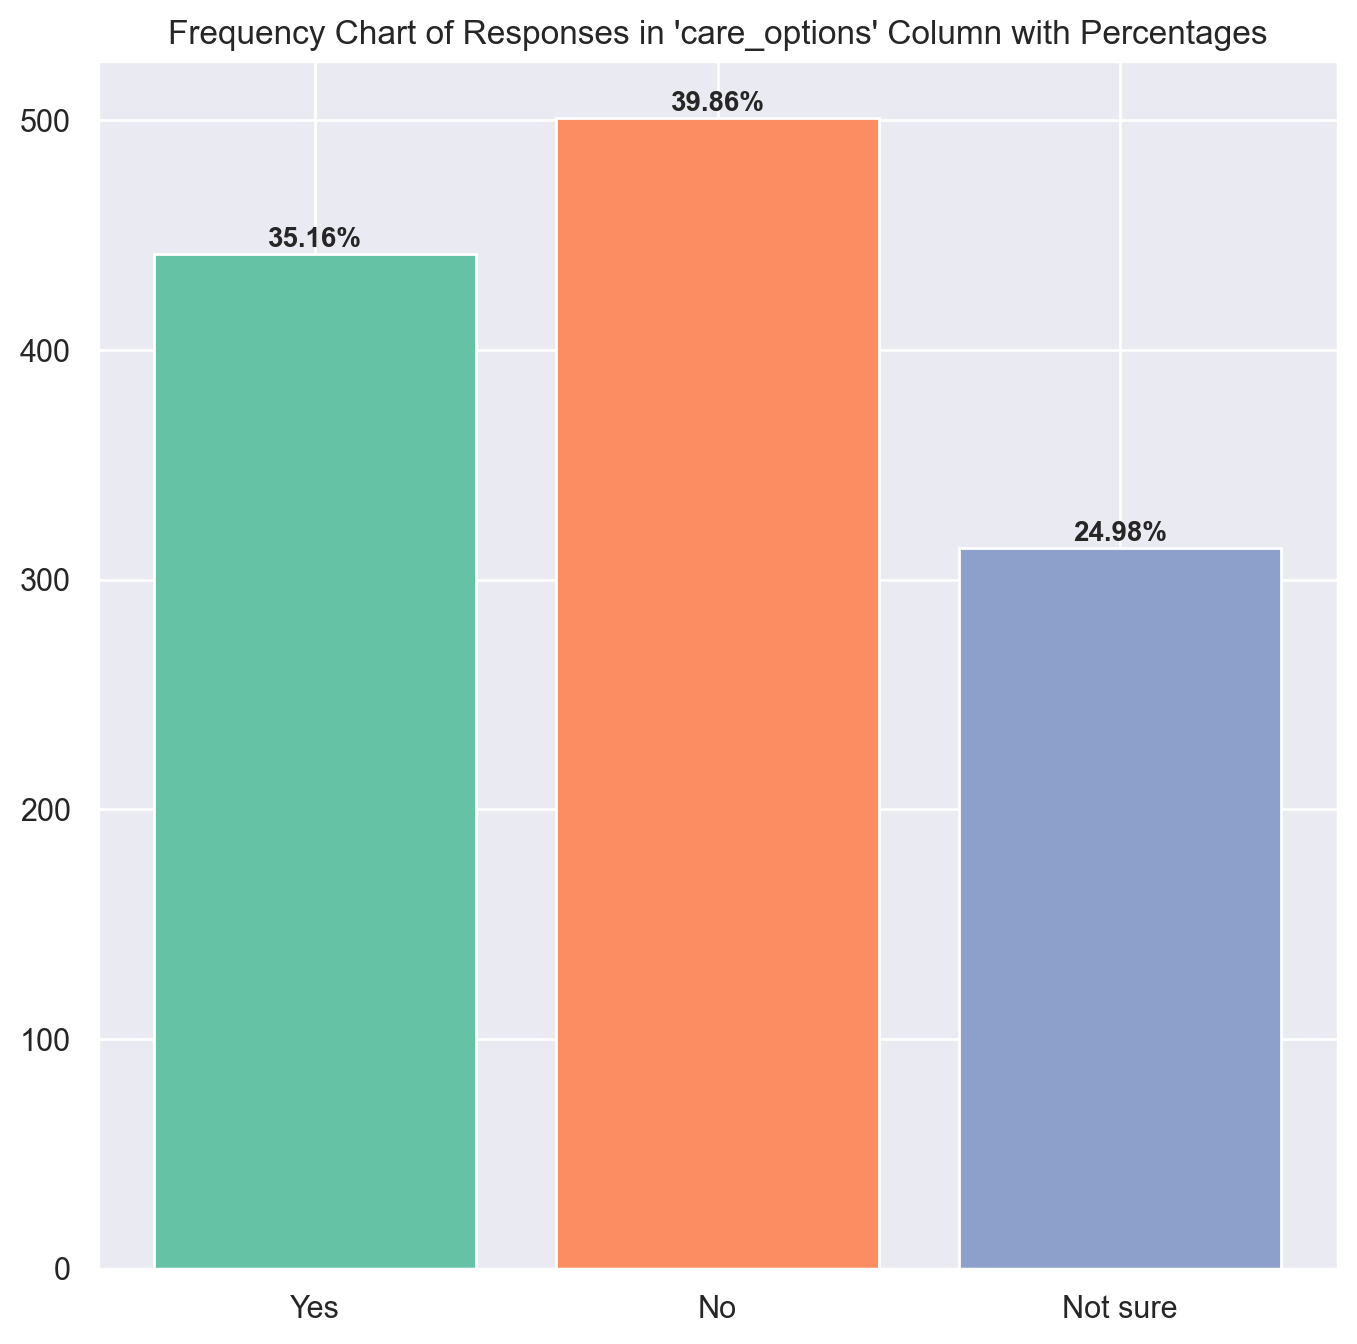

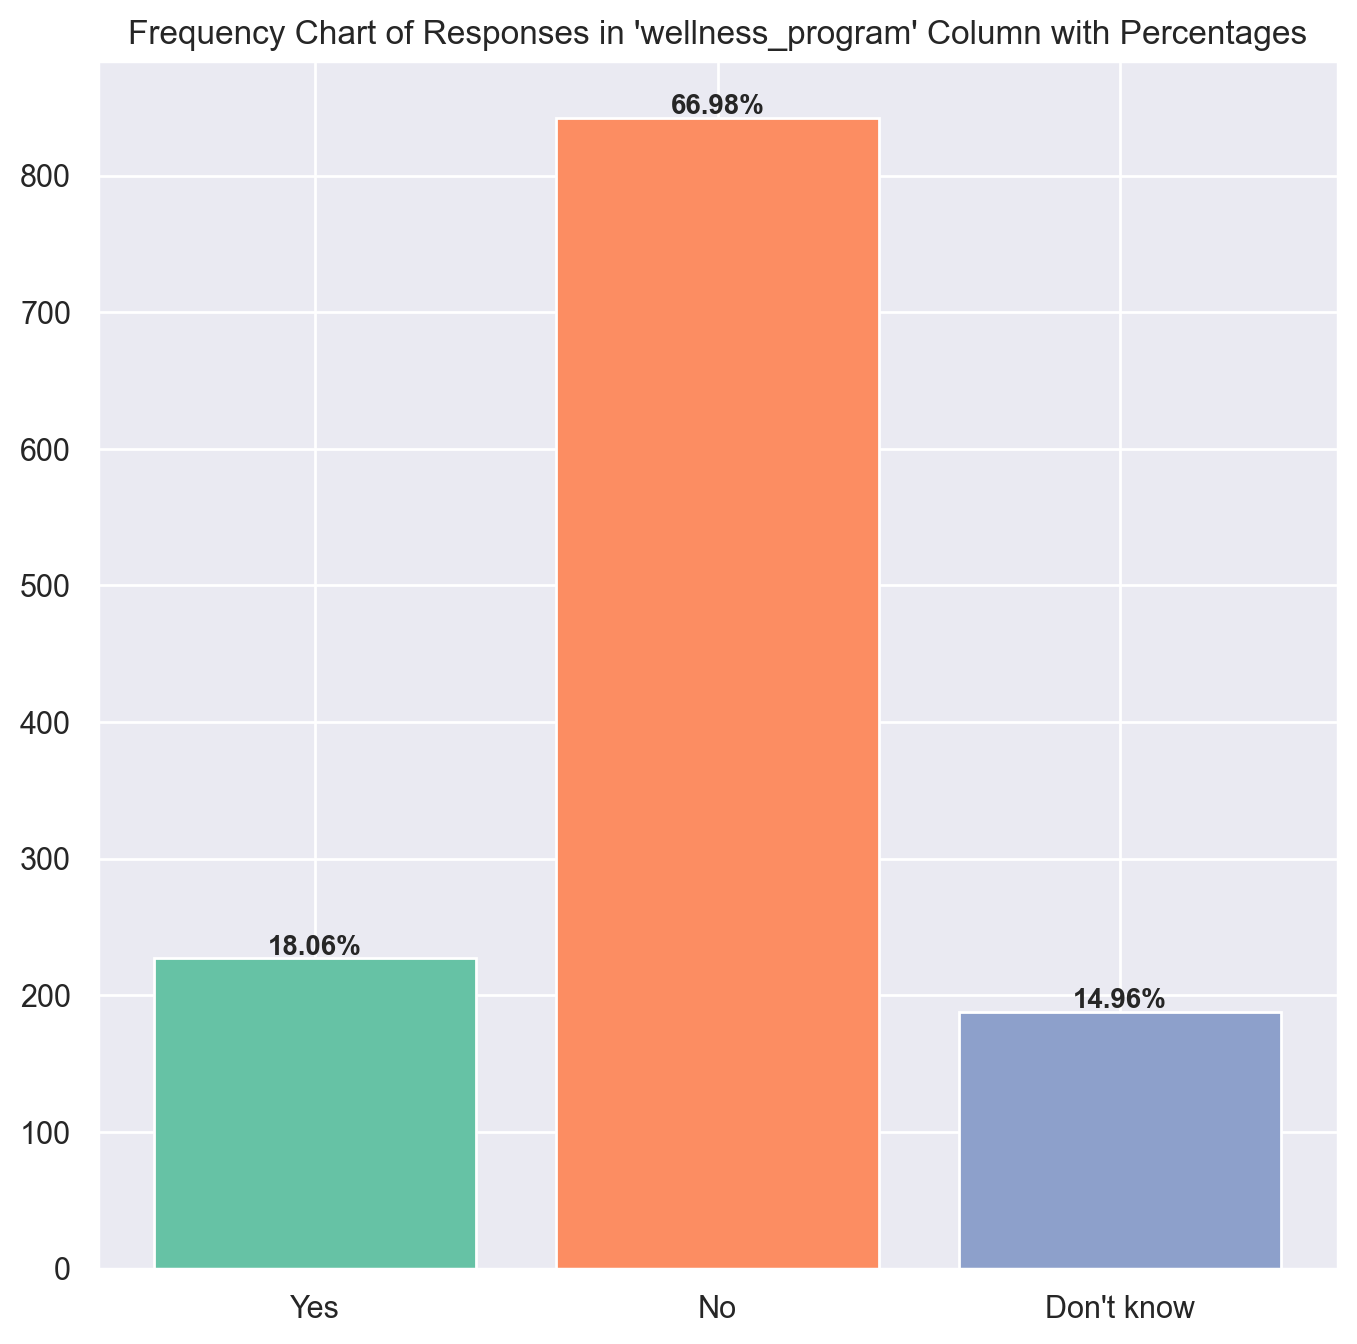

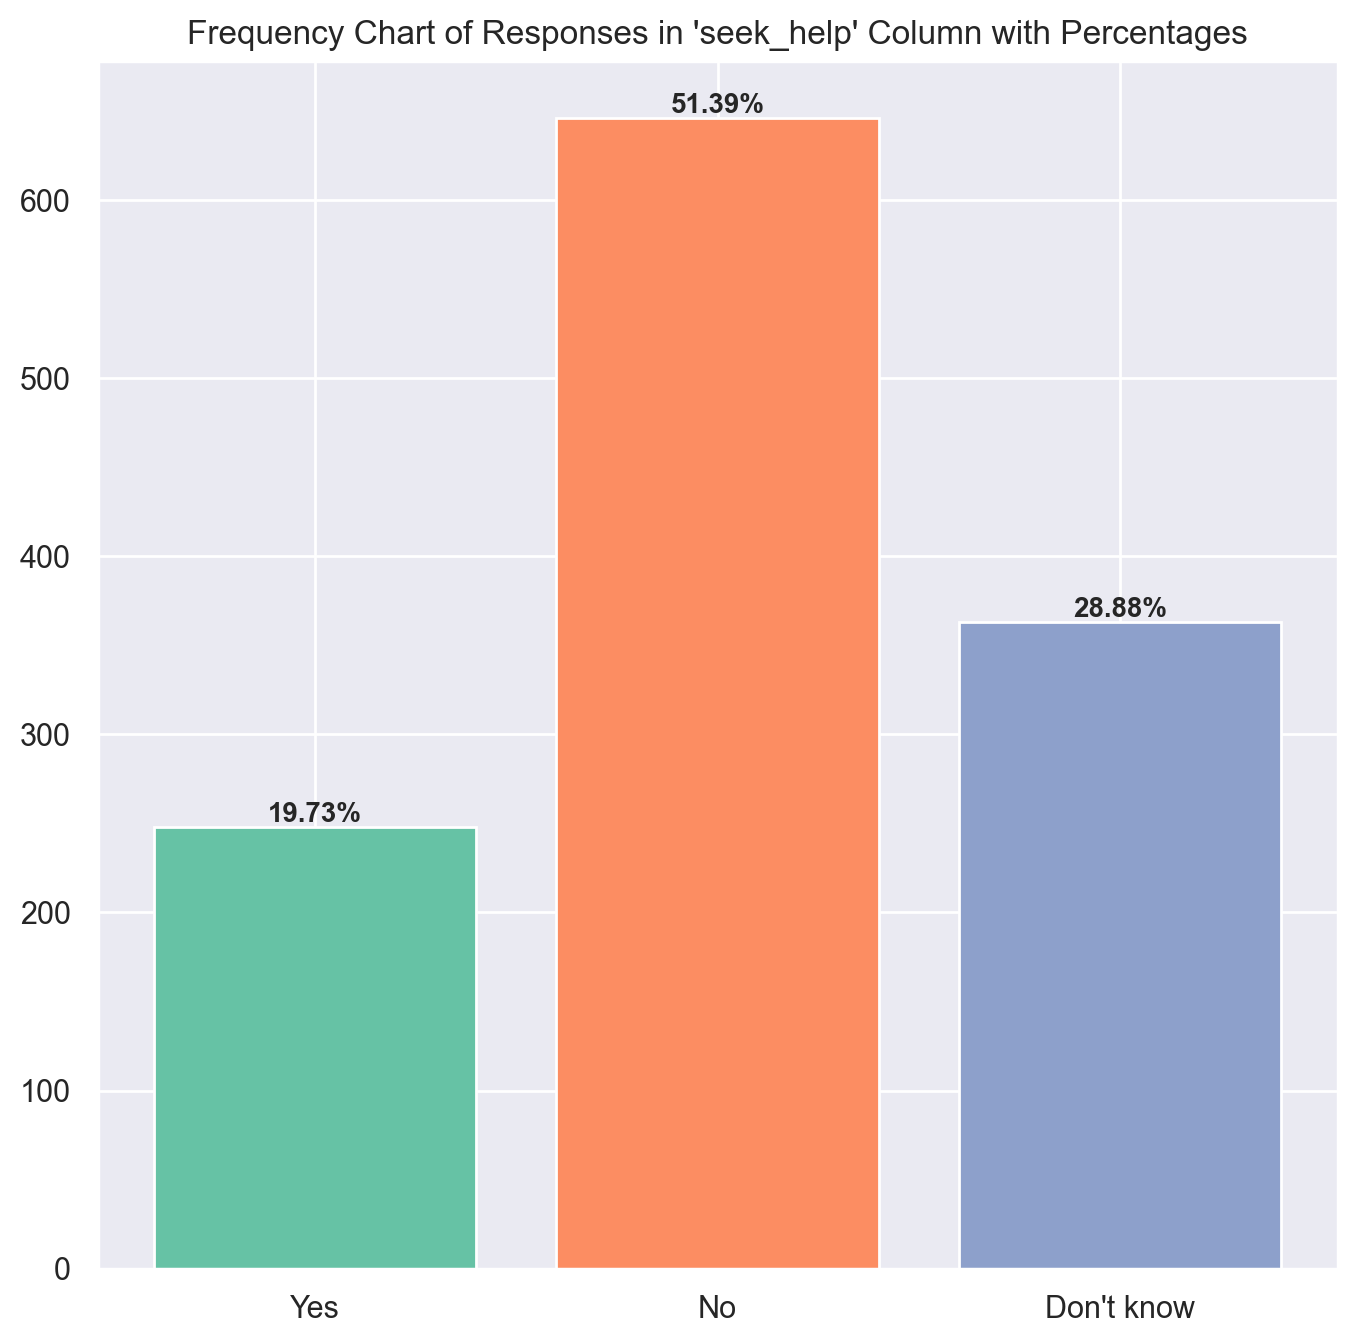

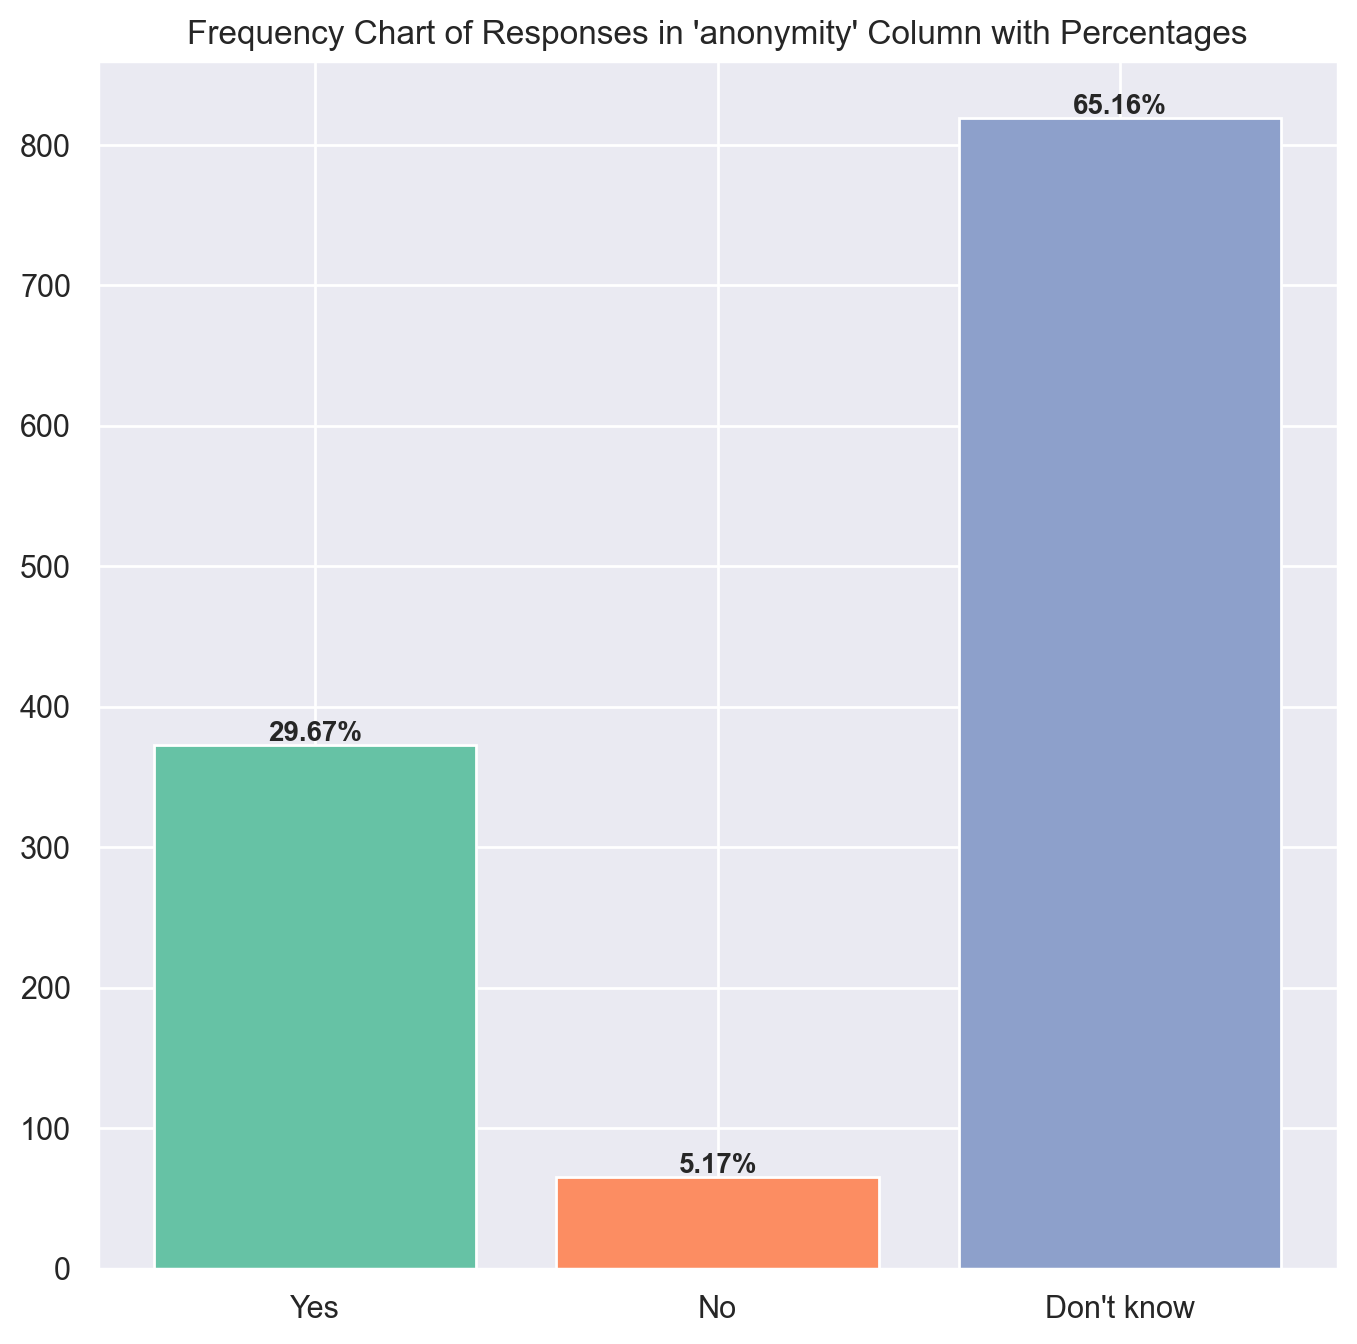

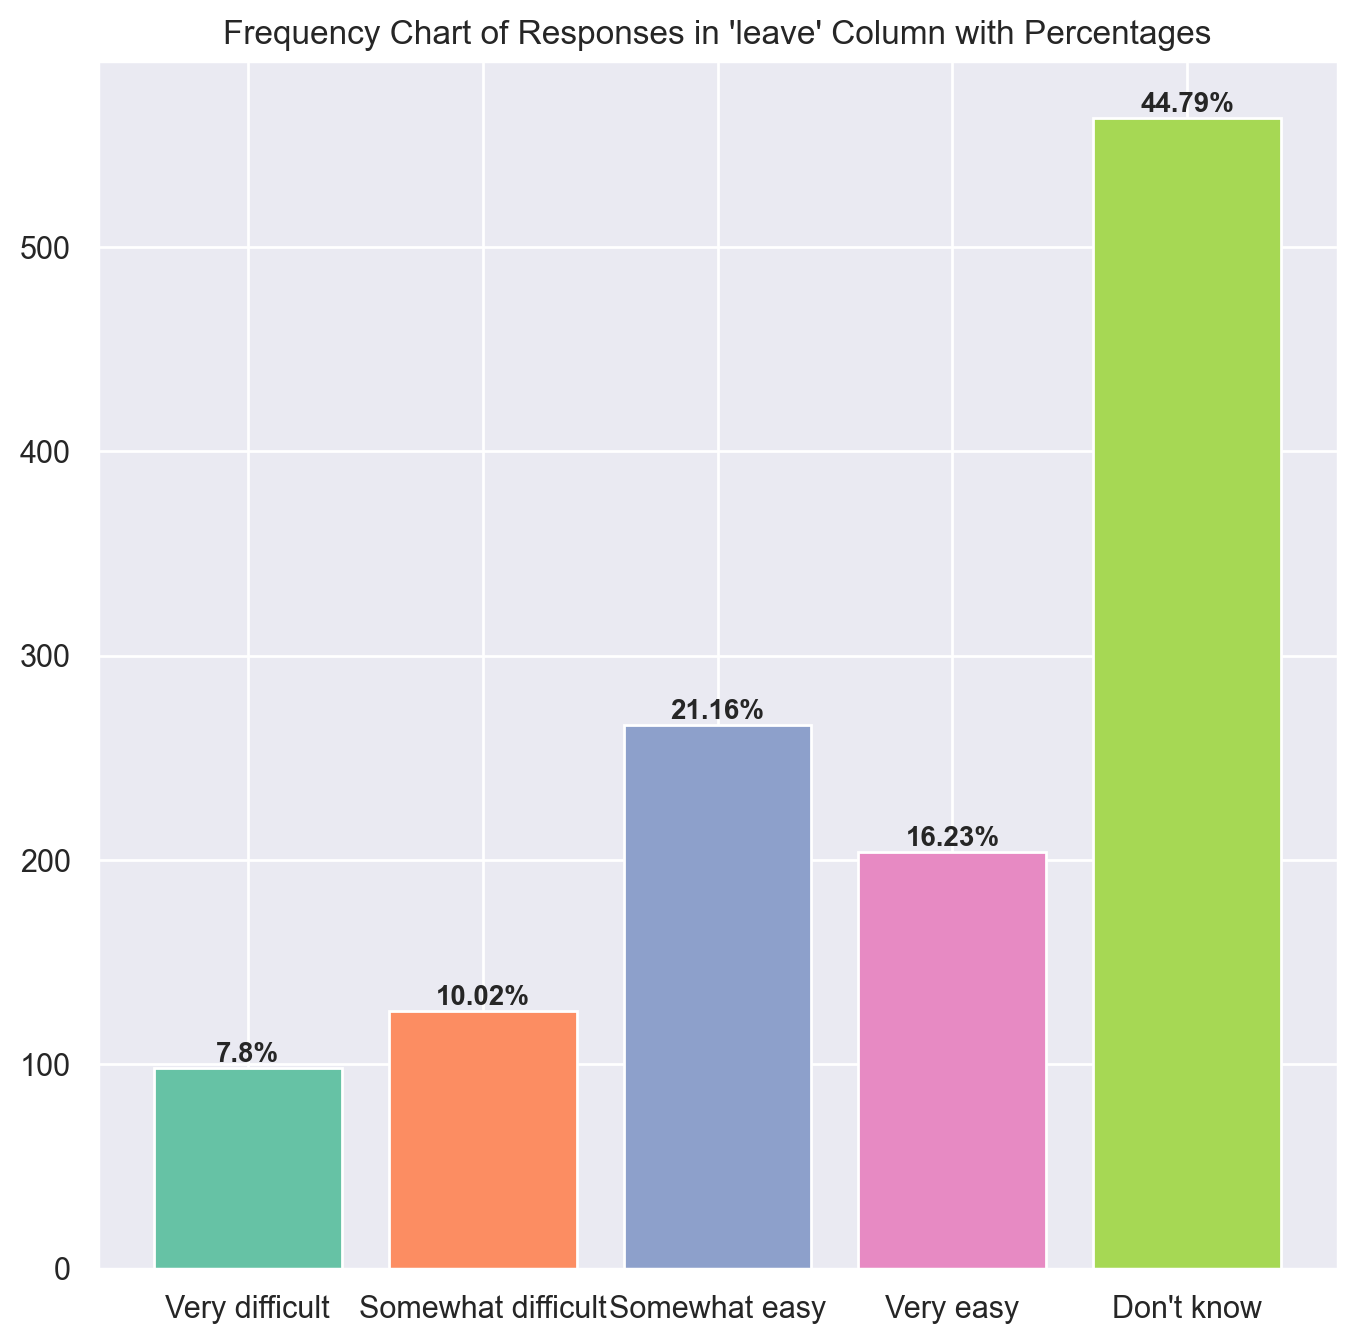

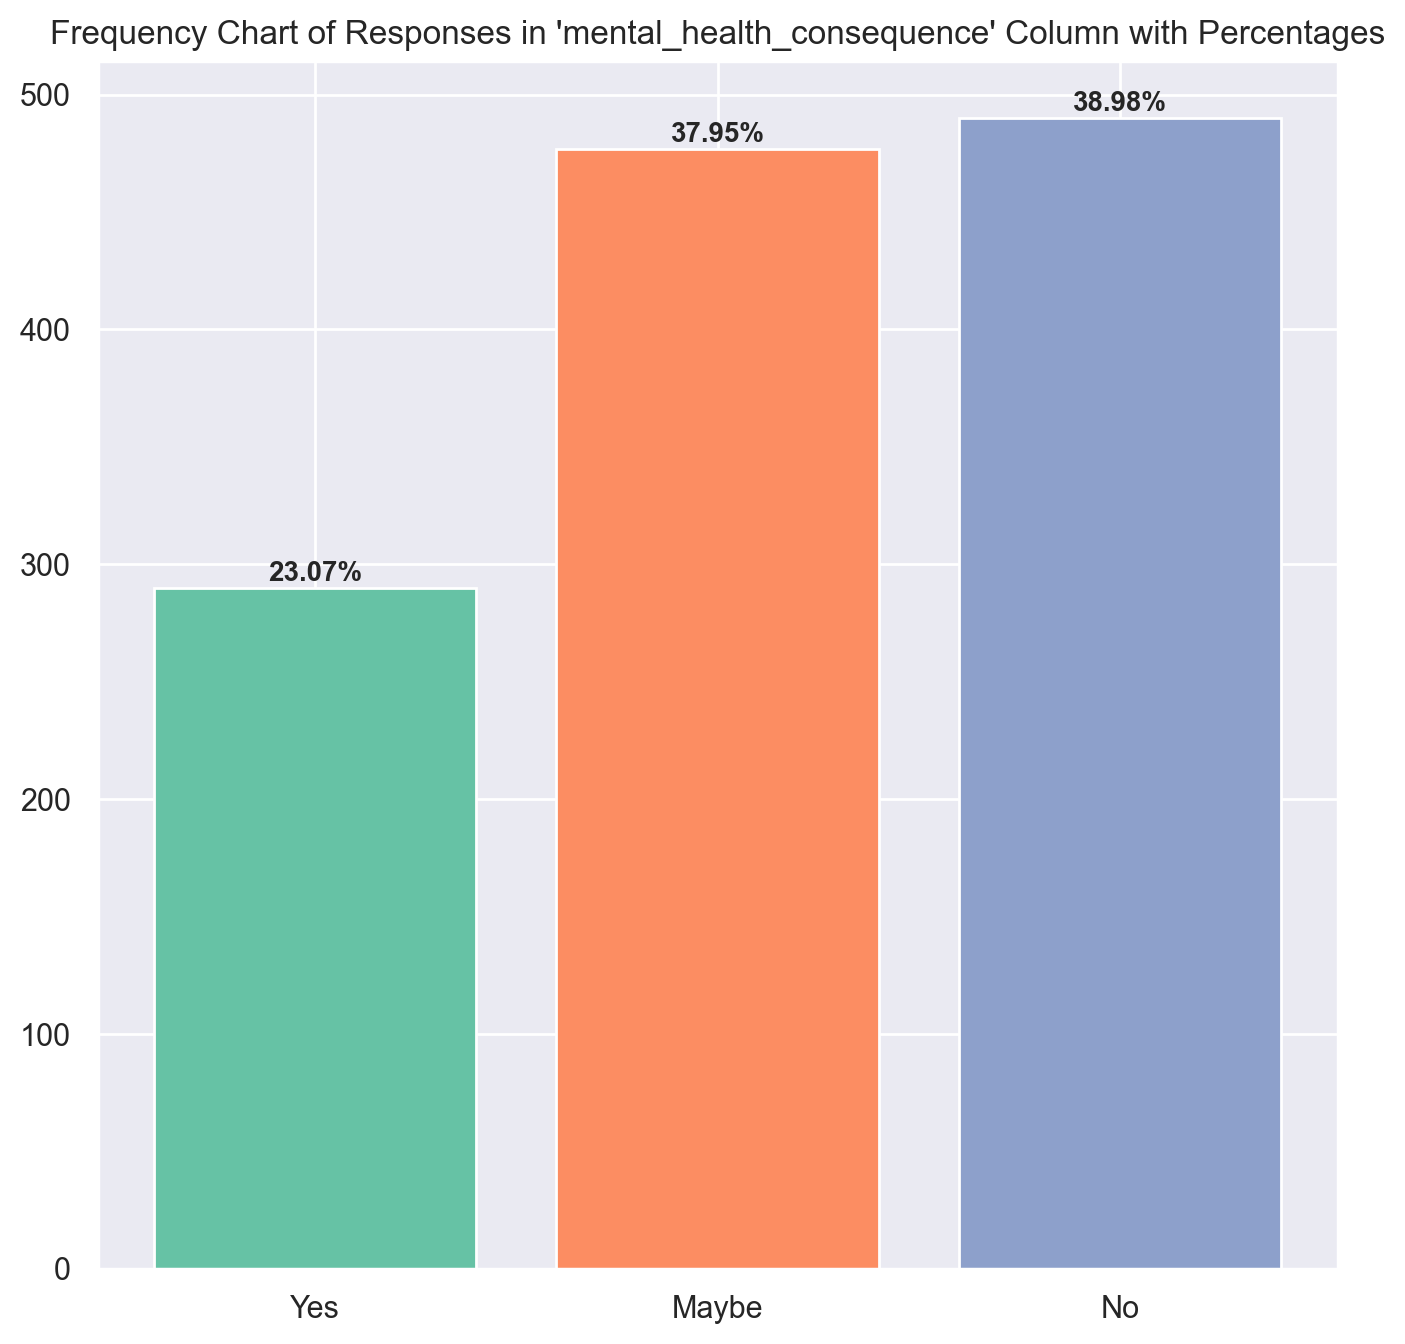

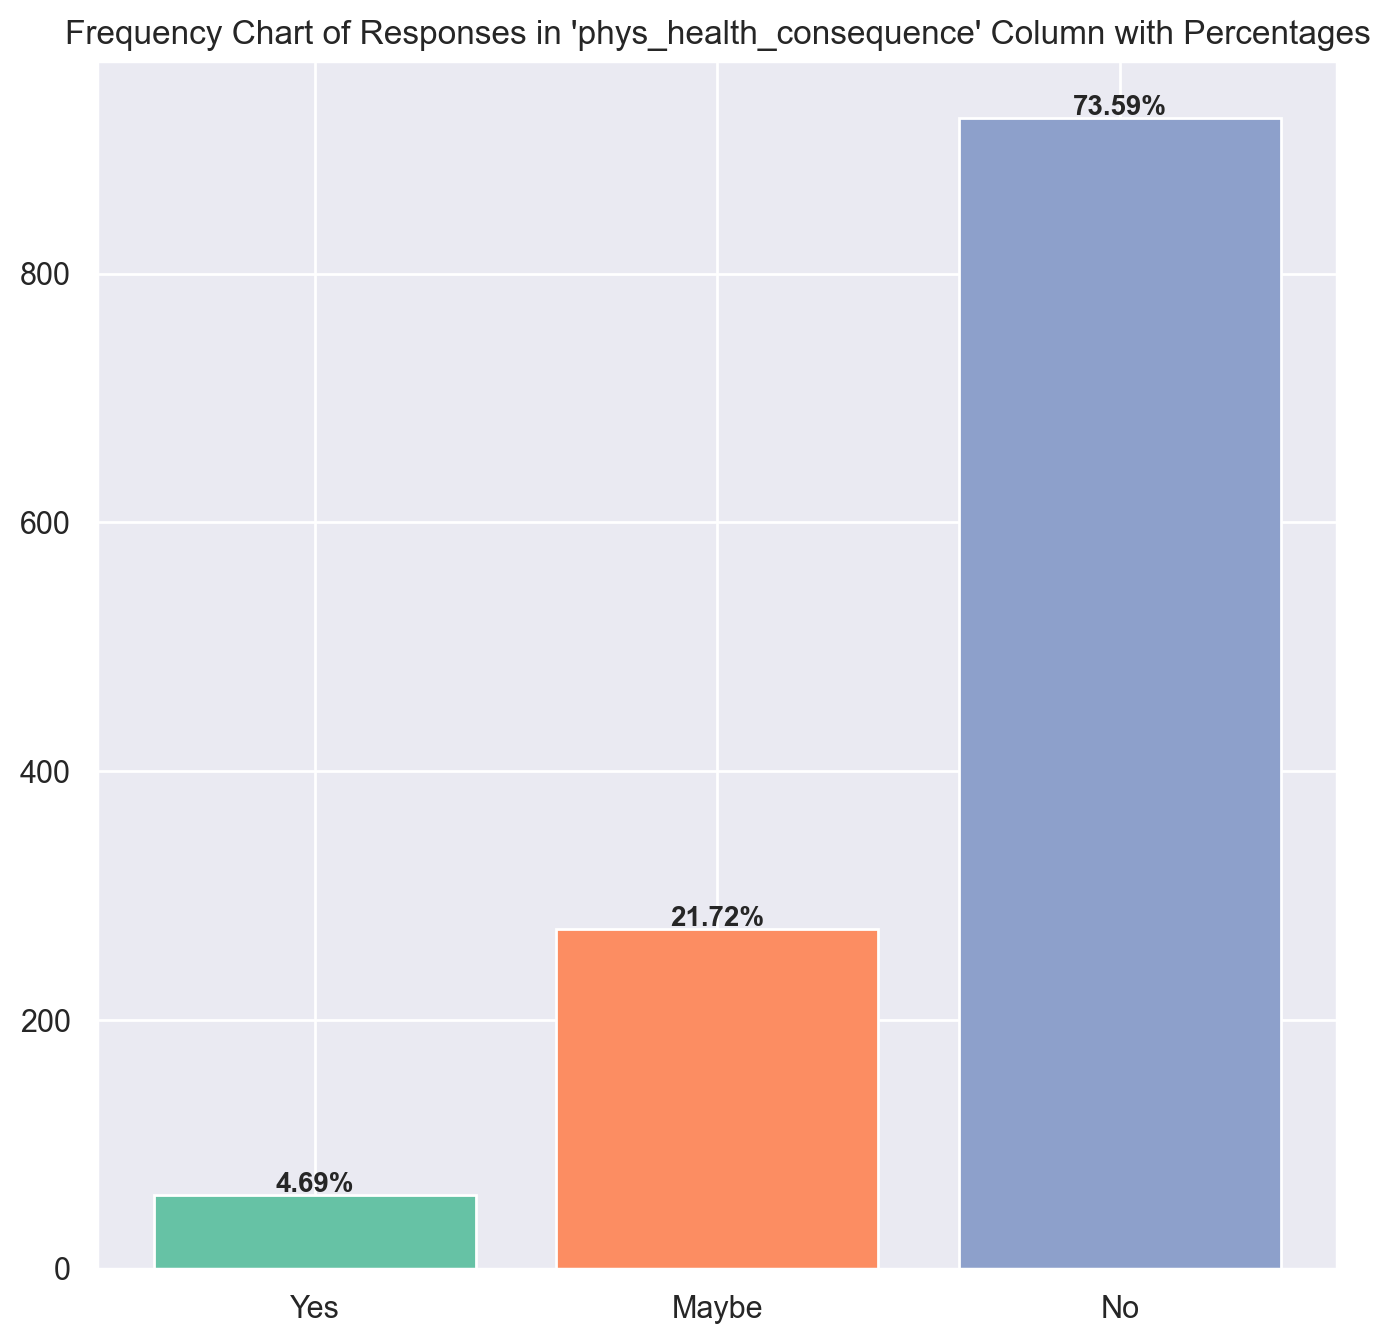

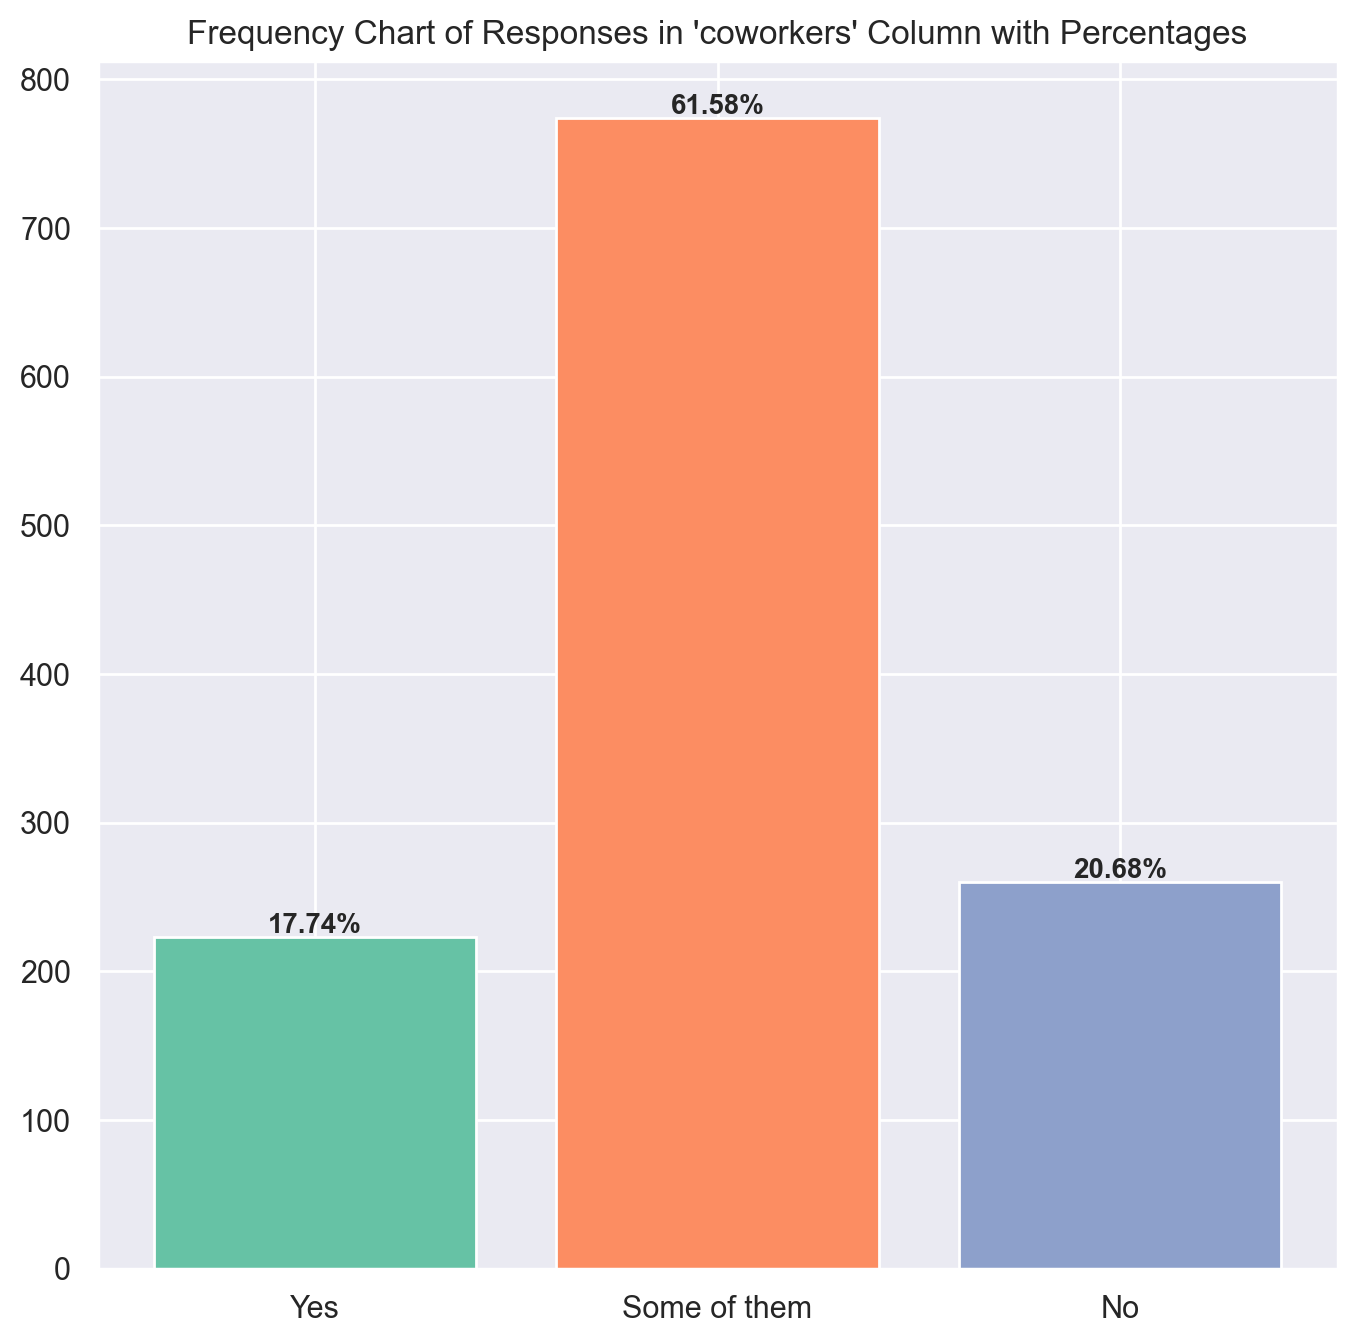

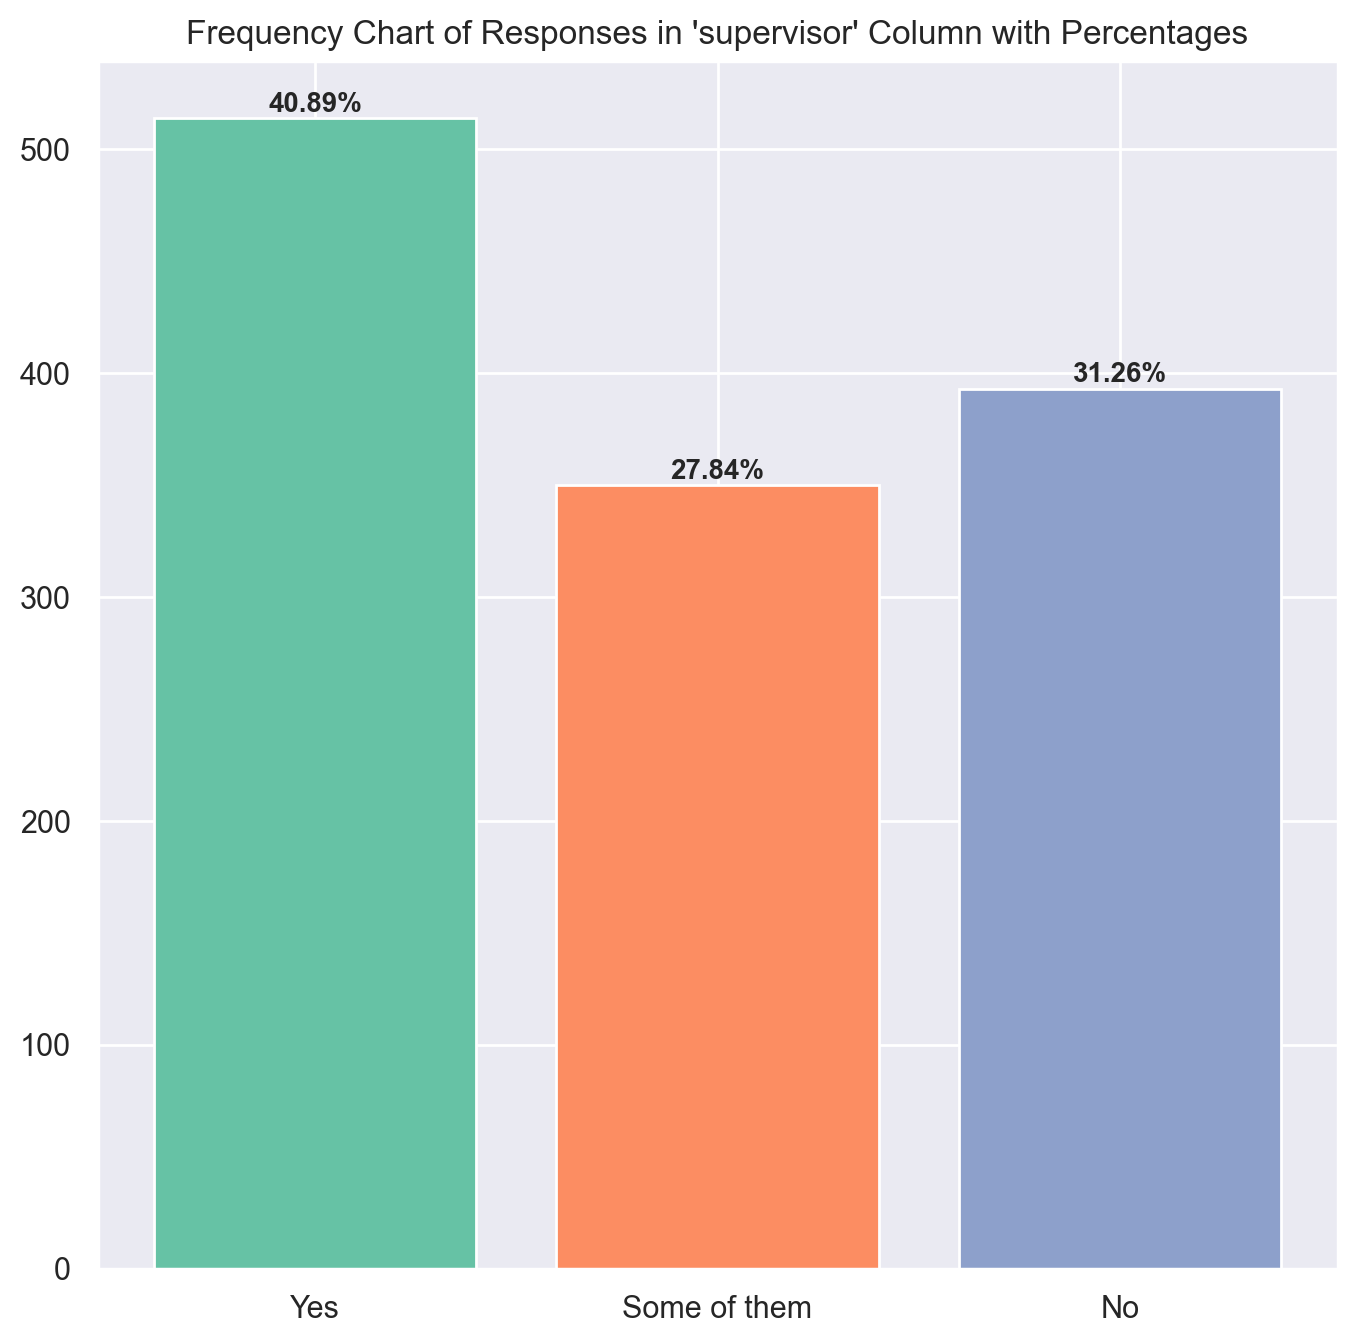

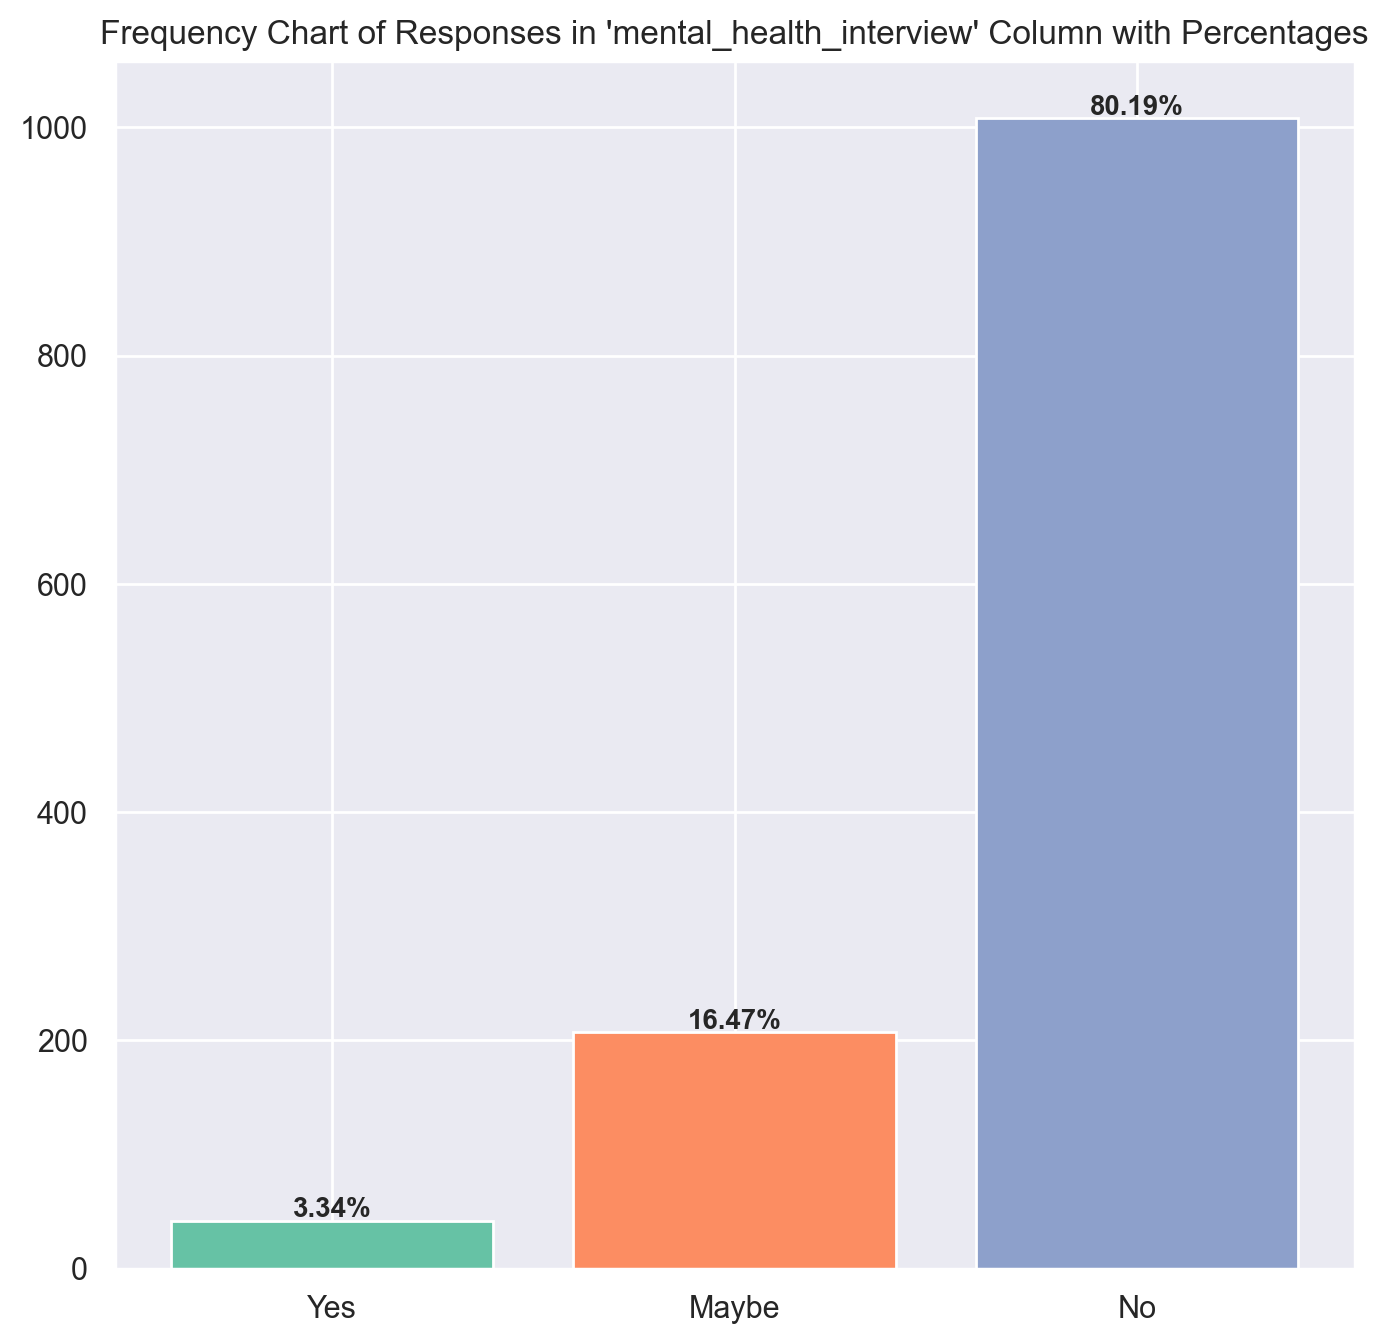

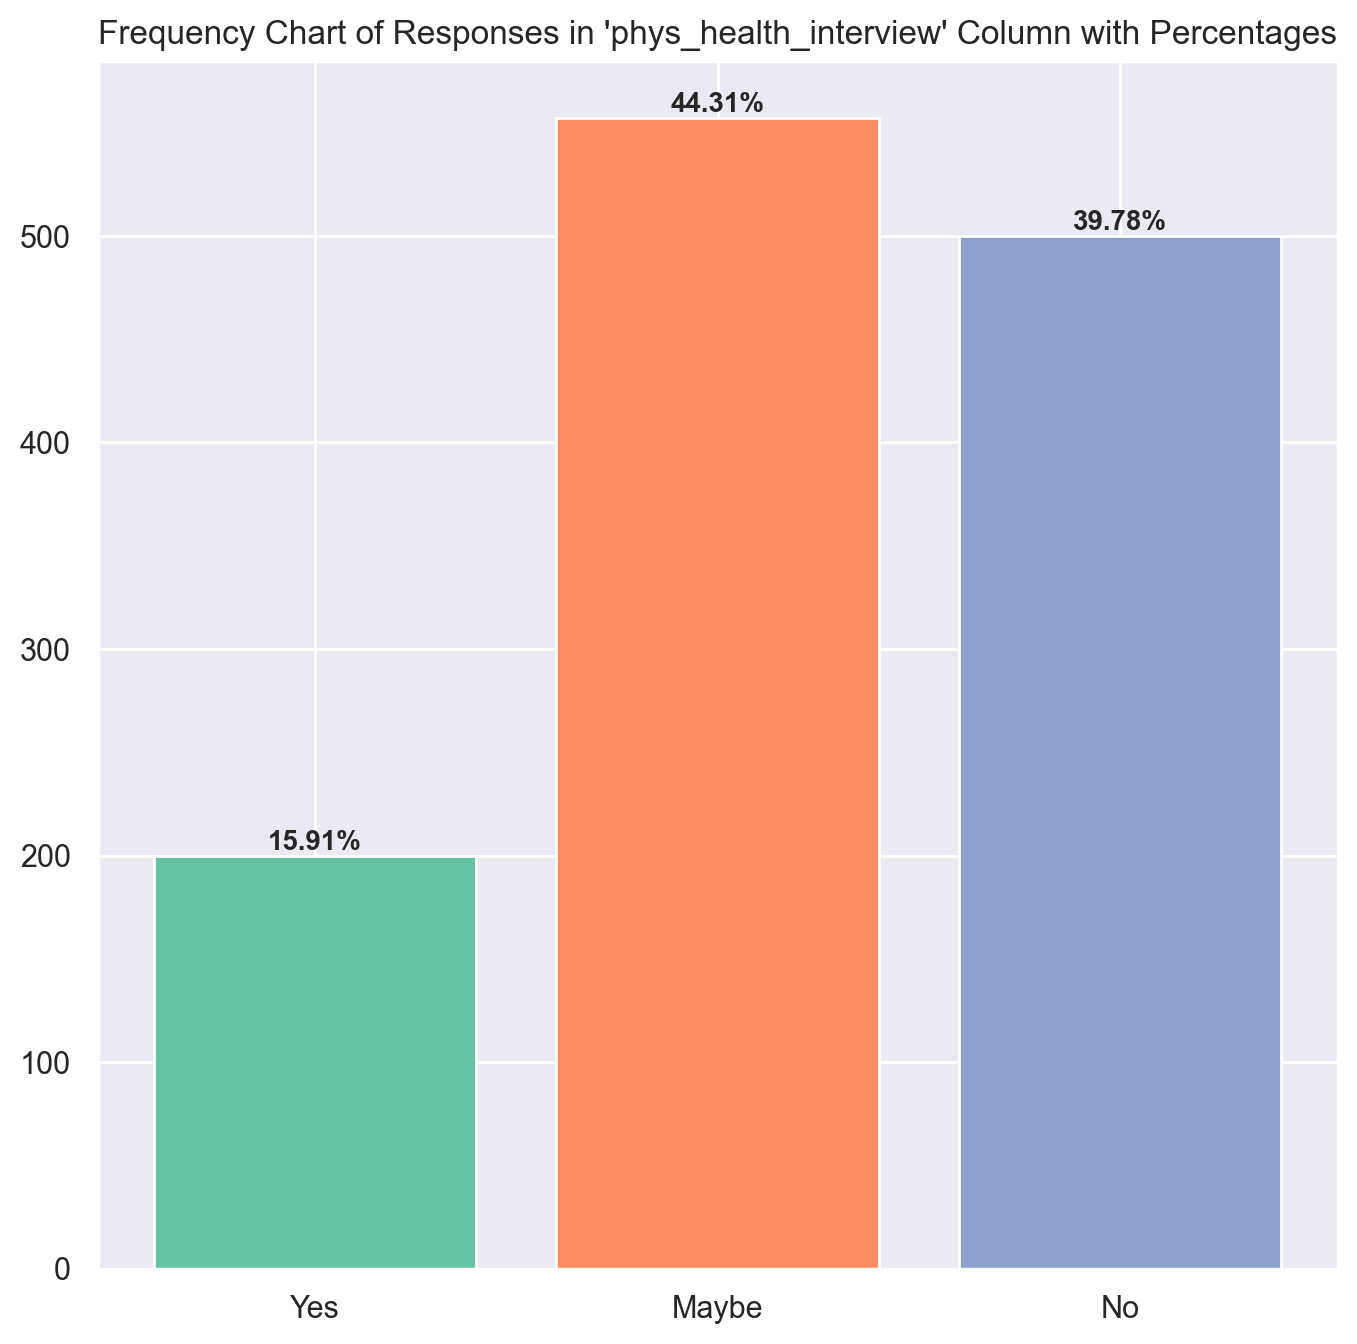

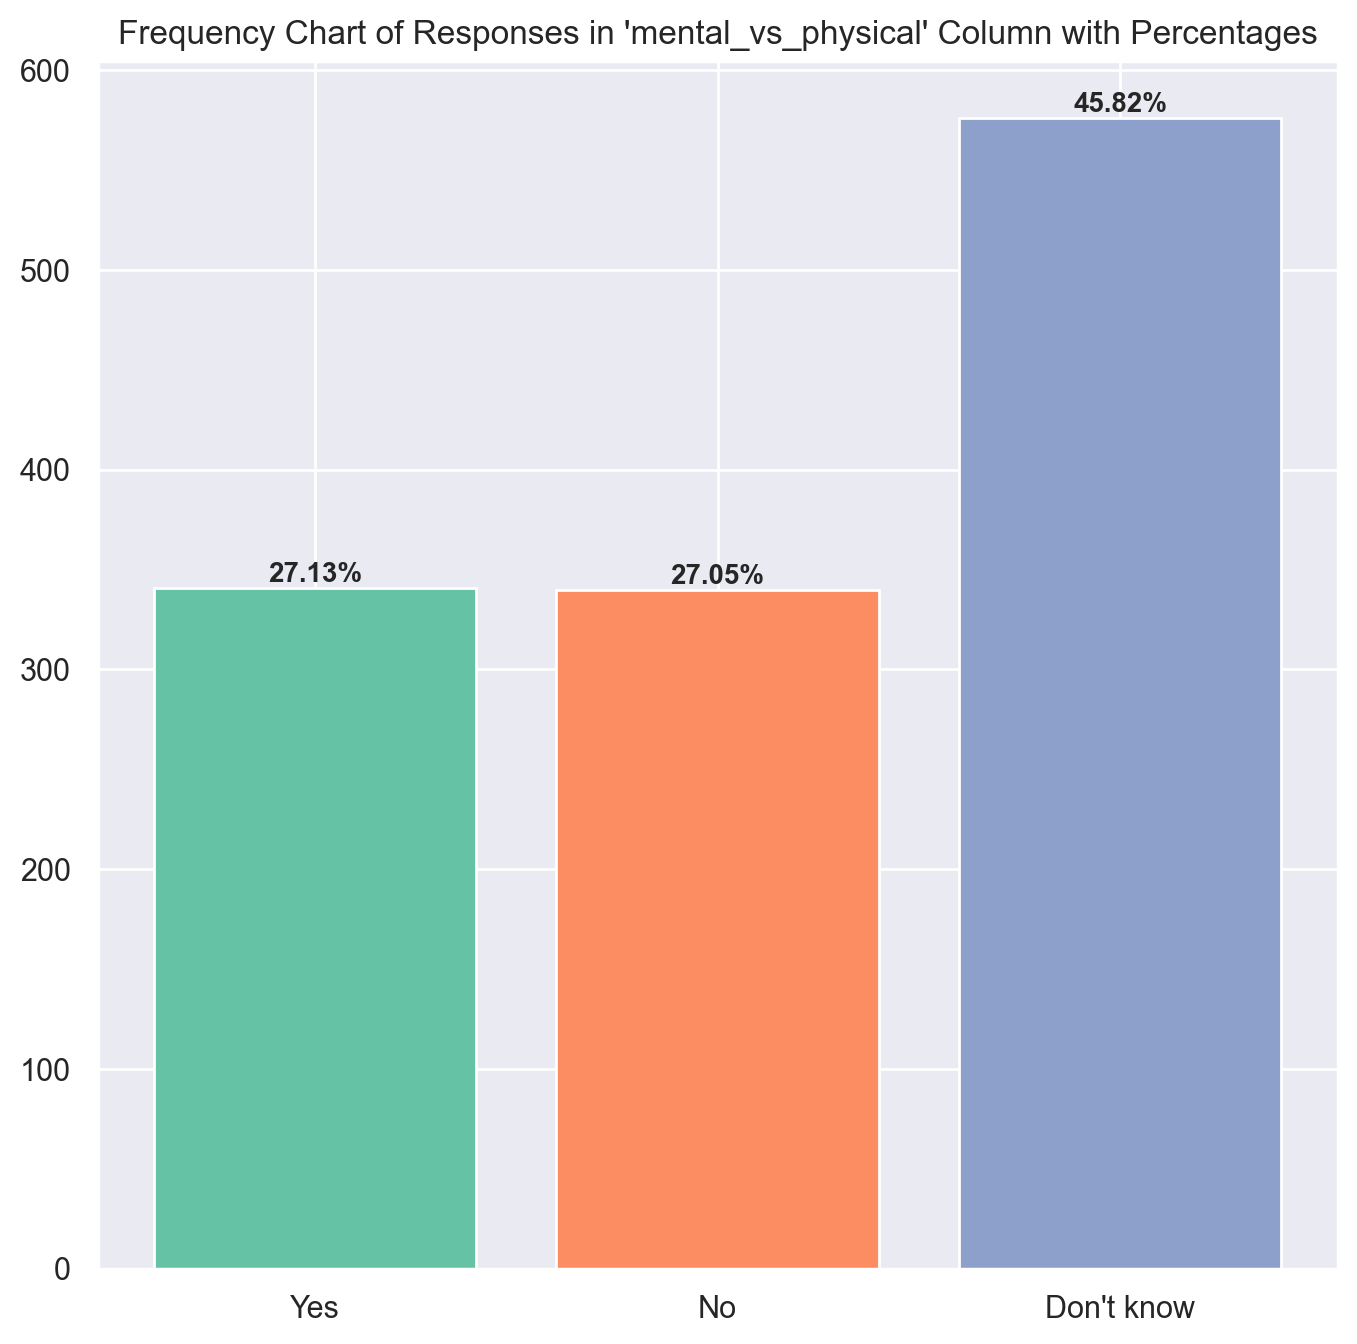

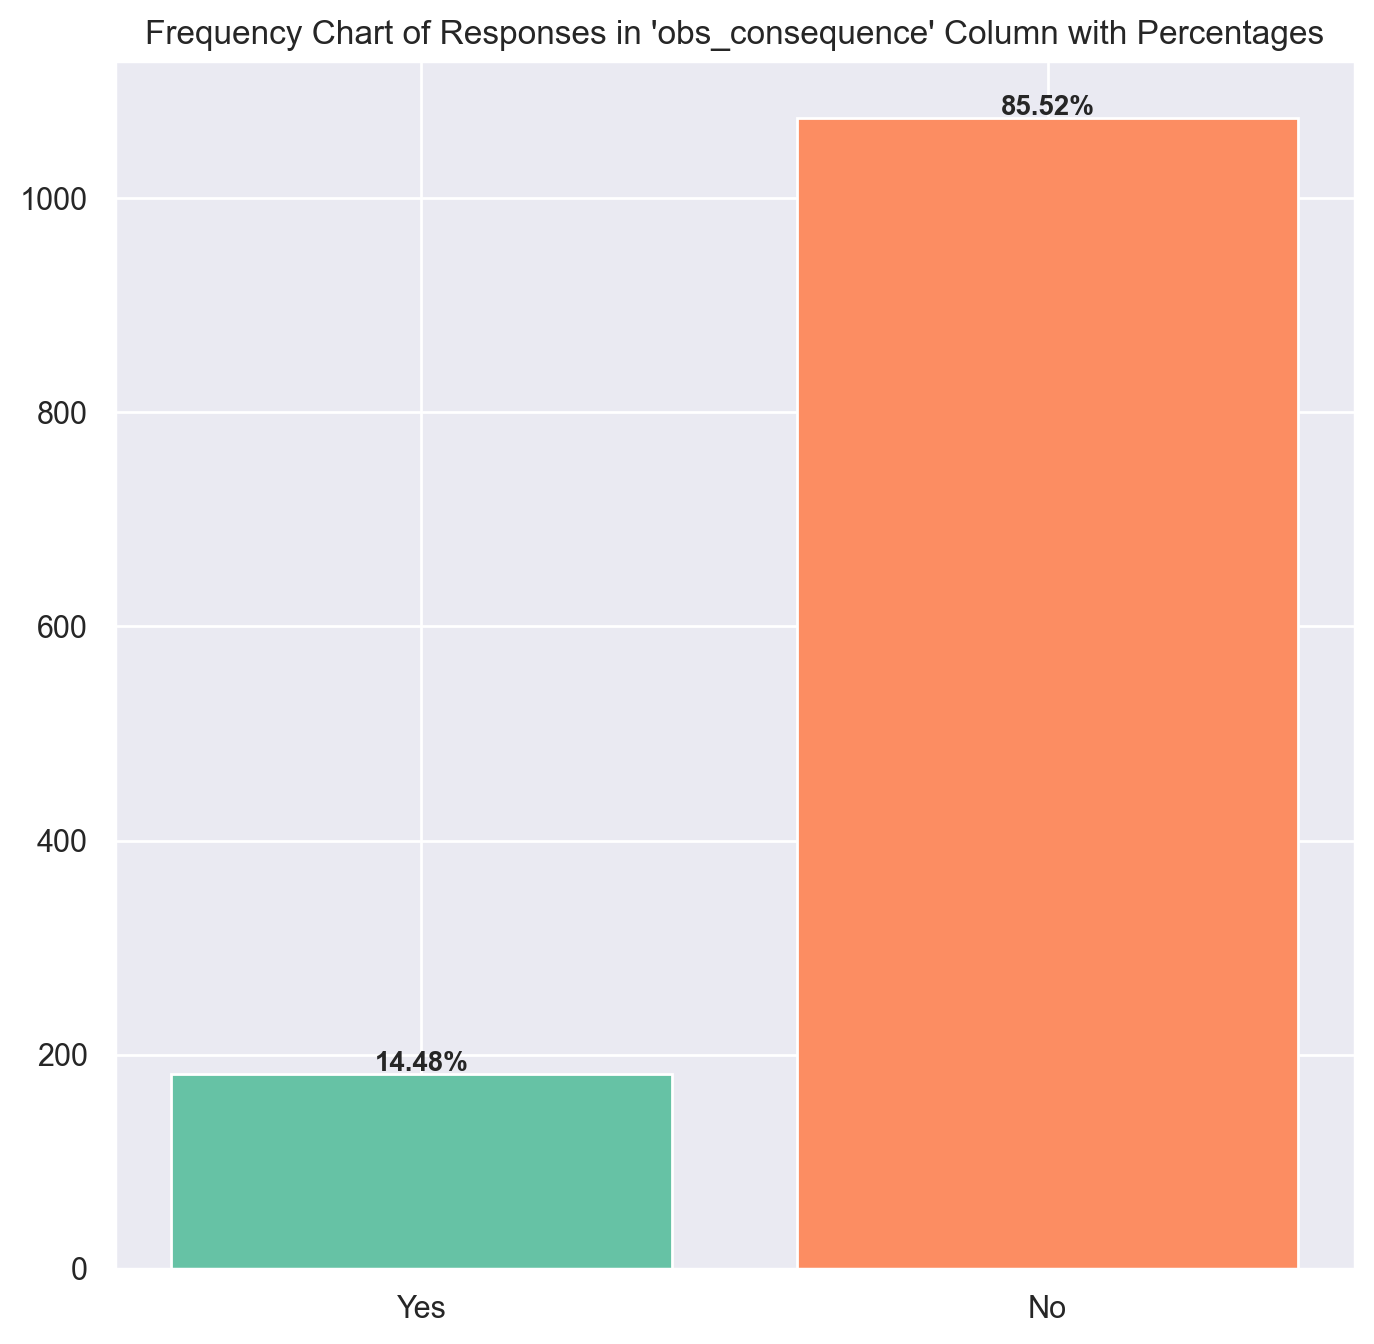

In [ ]:
for i in df.columns:
    if i not in ['timestamp', 'age', 'country', 'state', 'comments']:
        perc_bars(i)


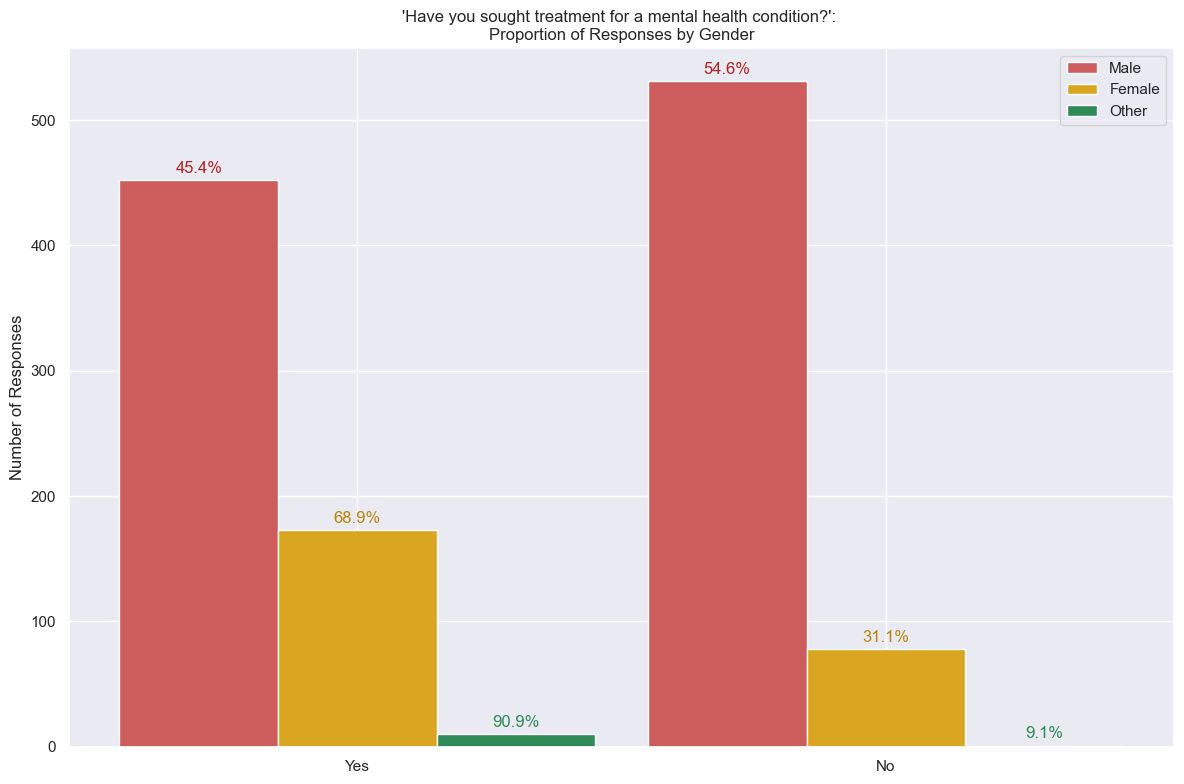

In [ ]:
# if bar_label produces an error: pip install --upgrade matplotlib
from matplotlib.pyplot import figure


male_prop = ['45.4%', '54.6%']
female_prop = ['68.9%', '31.1%']
other_prop = ['90.9%',  '9.1%']

male_bars = [452, 531]
female_bars = [173, 78]
other_bars = [10, 1]


x = np.arange(len(df['treatment'].unique()))  # the label locations
width = 0.3  # the width of the bars


fig, ax = plt.subplots()
fig.set_dpi(100)
fig.set_size_inches(12, 8)
male_rects = ax.bar(x - width, male_bars, width, label='Male', color = 'indianred')
female_rects = ax.bar(x, female_bars, width, label='Female', color = 'goldenrod')
other_rects = ax.bar(x + width, other_bars, width, label='Other', color = 'seagreen')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Responses')
ax.set_title('\'Have you sought treatment for a mental health condition?\': \nProportion of Responses by Gender')
ax.legend()
ax.set_xticks(x, labels=['Yes', 'No'])

ax.bar_label(male_rects, labels = male_prop ,padding=3, color = 'firebrick')
ax.bar_label(female_rects, labels = female_prop, padding=3, color = 'darkgoldenrod')
ax.bar_label(other_rects, labels = other_prop, padding = 3, color = 'seagreen')

fig.tight_layout()


plt.show()

In [ ]:
def groupedby_gender_barplot(df, col):
    if df[col].isnull().sum() > 0:
        print('Null values were detected and removed')
        drop_df = df.dropna(subset=[col])
        
        cross = pd.crosstab(drop_df[col], drop_df['gender'])
        x = np.arange(len(drop_df[col].unique()))  # the label locations
    else:
        cross = pd.crosstab(df[col], df['gender'])
        x = np.arange(len(df[col].unique()))  # the label locations
        
    male_bars = cross['M'].to_numpy()
    female_bars = cross['F'].to_numpy()
    other_bars = cross['Other'].to_numpy()
    
    male_prop = [str("{:.1f}".format(prop)) +'%' for prop in (male_bars/male_bars.sum()).round(3)*100]
    female_prop = [str("{:.1f}".format(prop)) +'%' for prop in (female_bars/female_bars.sum()).round(3)*100]
    other_prop = [str("{:.1f}".format(prop)) +'%' for prop in (other_bars/other_bars.sum()).round(3)*100]
    

    width = 0.3  # the width of the bars

    fig, ax = plt.subplots()
    fig.set_dpi(100)
    fig.set_size_inches(12, 8)

    male_rects = ax.bar(x - width, male_bars, width, label='Male', color = 'indianred')
    female_rects = ax.bar(x, female_bars, width, label='Female', color = 'goldenrod')
    other_rects = ax.bar(x + width, other_bars, width, label='Other', color = 'seagreen')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Responses')
    ax.set_title(col + '\nProportion of Responses by Gender')
    ax.legend()
    ax.set_xticks(x, cross.index.tolist())

    ax.bar_label(male_rects, labels = male_prop ,padding=3, color = 'firebrick')
    ax.bar_label(female_rects, labels = female_prop, padding=3, color = 'darkgoldenrod')
    ax.bar_label(other_rects, labels = other_prop, padding = 3, color = 'seagreen')

    #fig.tight_layout()


    plt.show()

In [ ]:
pd.crosstab(df['self_employed'], df['gender'])

gender           F    M  Other
self_employed                 
No             224  863      8
Yes             22  119      3

In [ ]:
df['self_employed'].isnull()

0        True
1        True
2        True
3        True
4        True
        ...  
1252    False
1253    False
1254    False
1255    False
1256    False
Name: self_employed, Length: 1257, dtype: bool

[187 105 126 349]


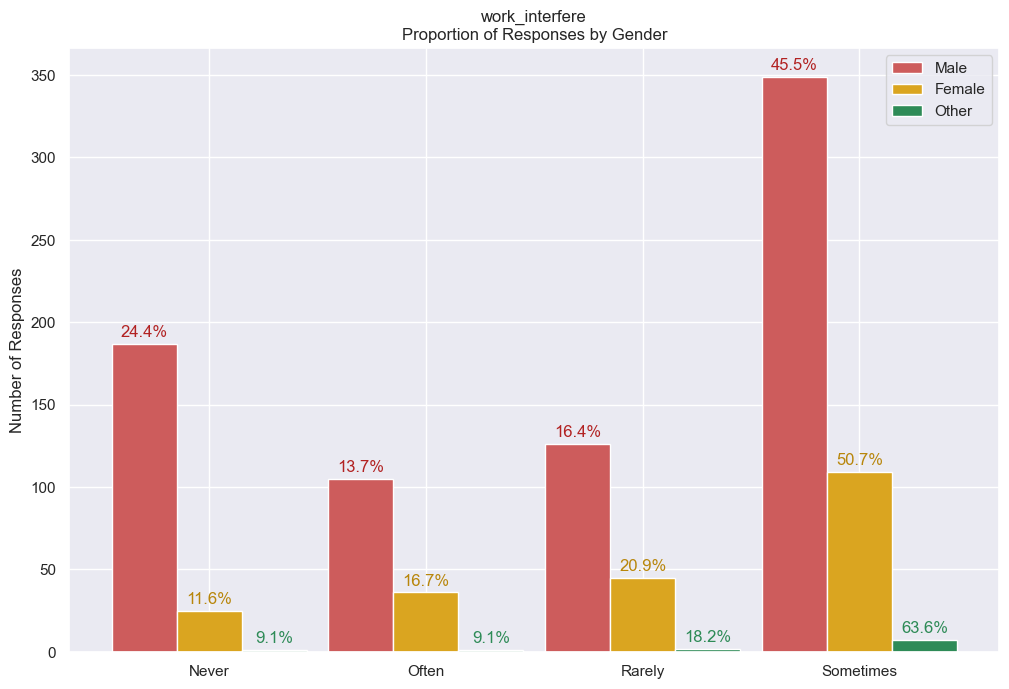

In [ ]:
##fill null columns in self_employed and work_interfere
groupedby_gender_barplot(df.dropna(subset=['work_interfere']), 'work_interfere')
#remap other values

Null values were detected and removed


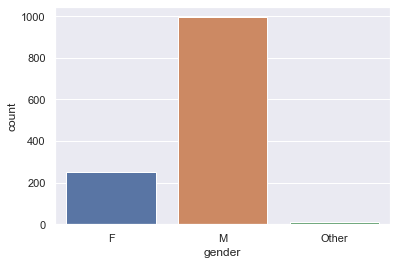

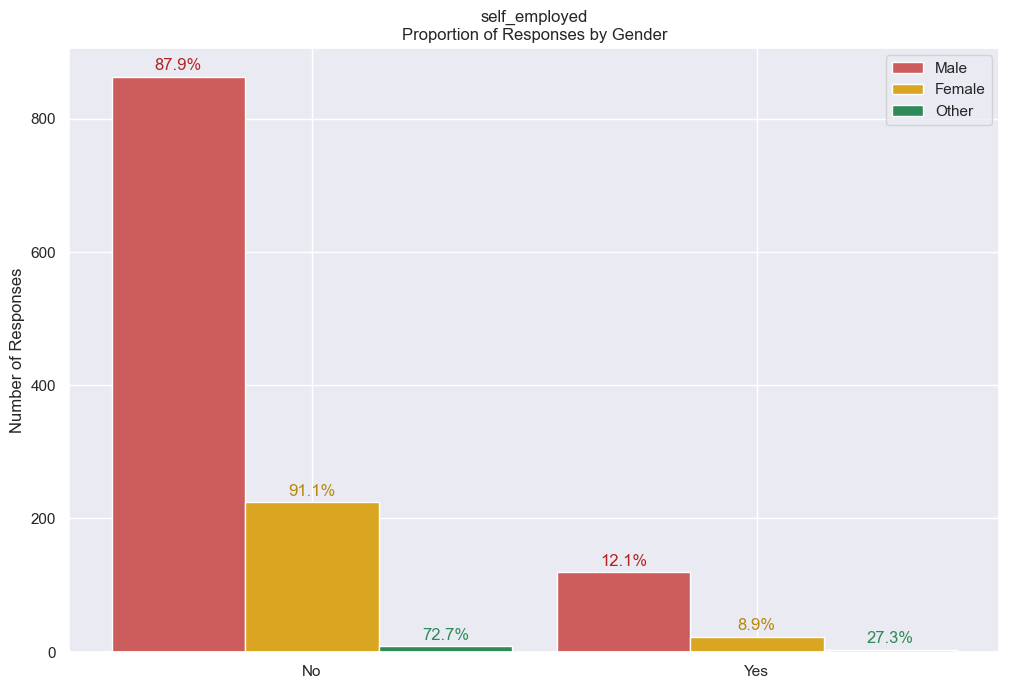

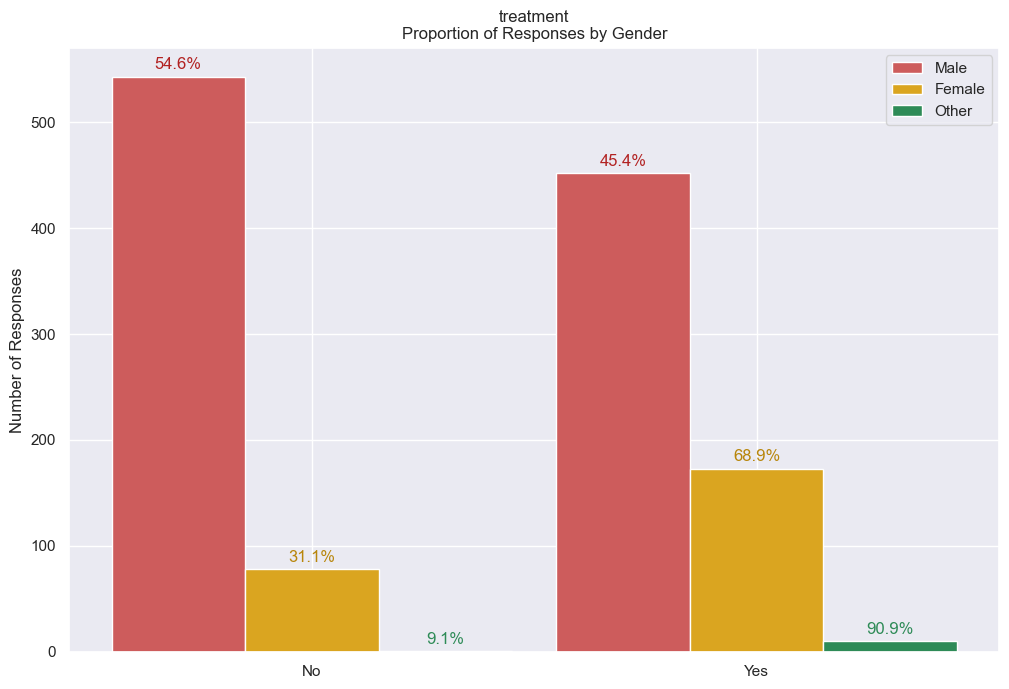

Null values were detected and removed


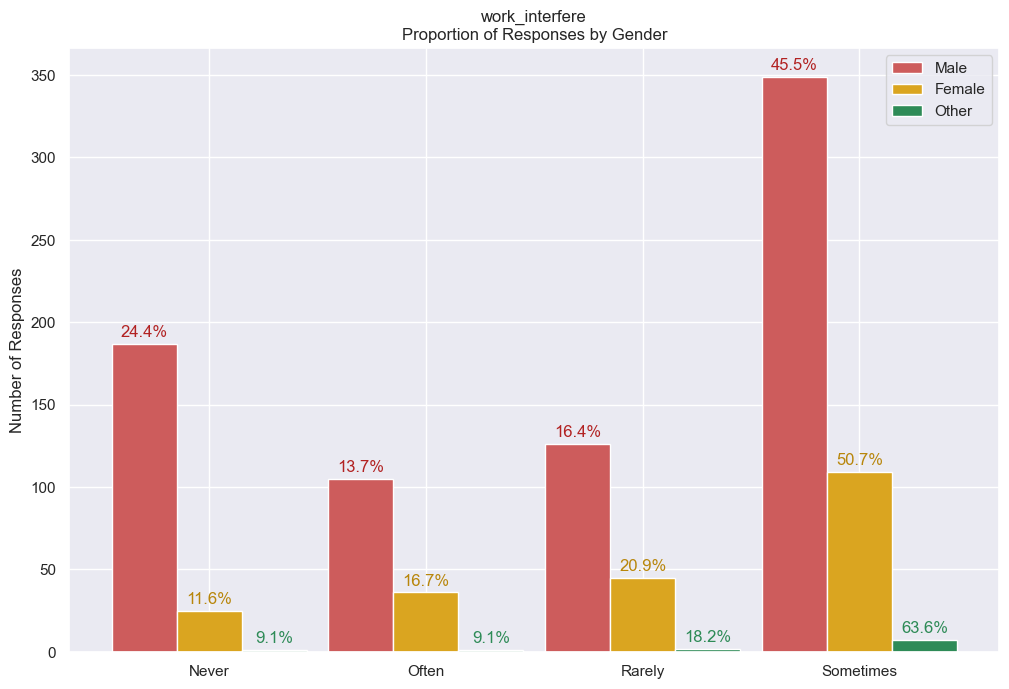

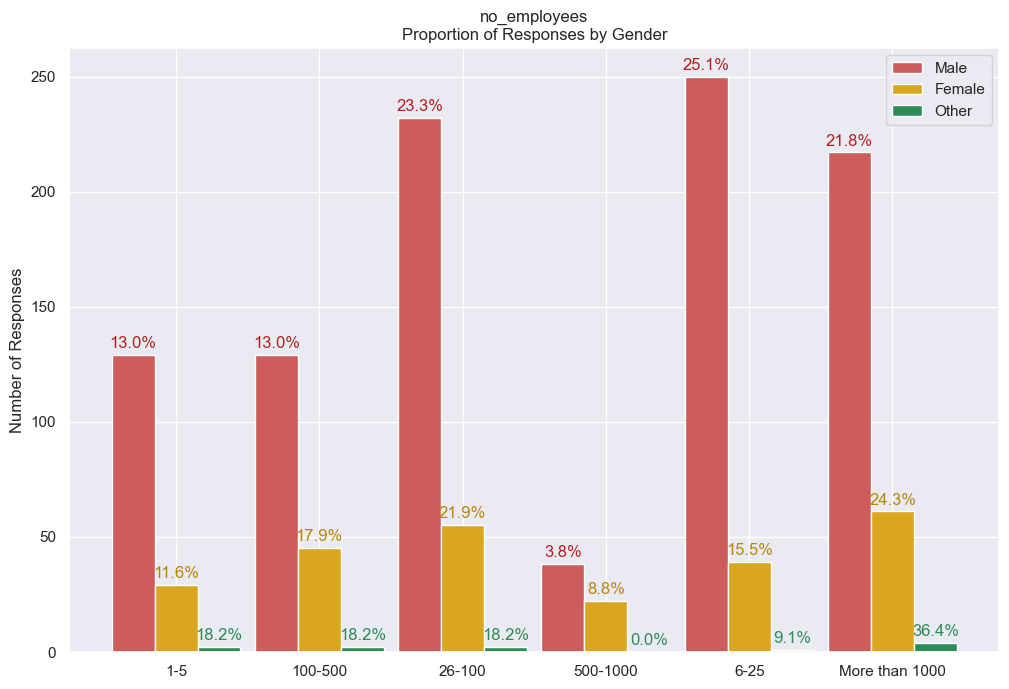

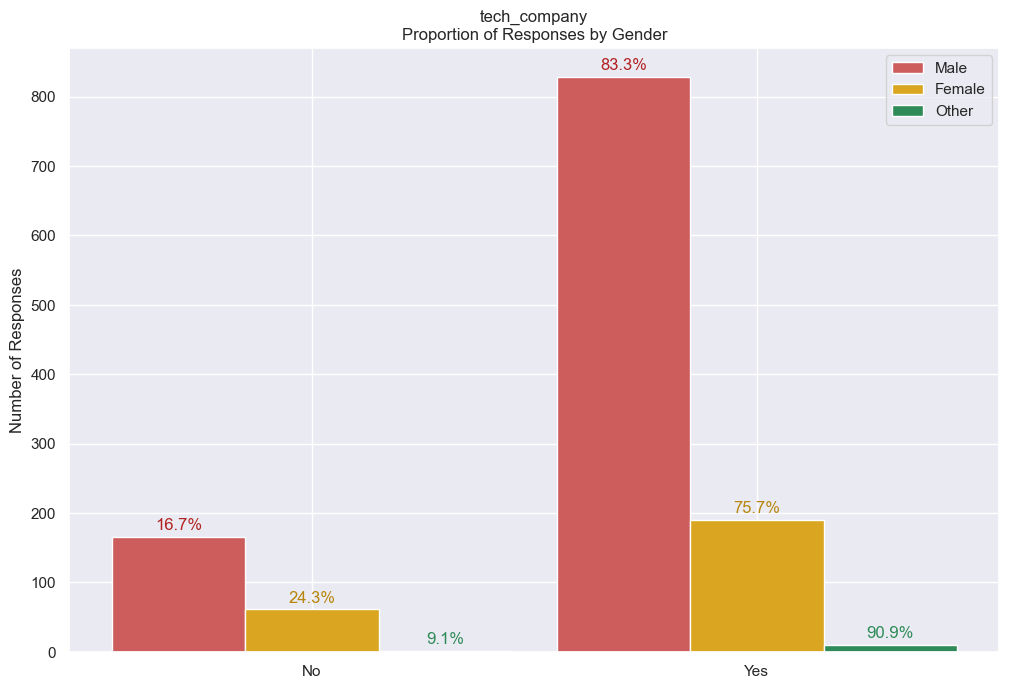

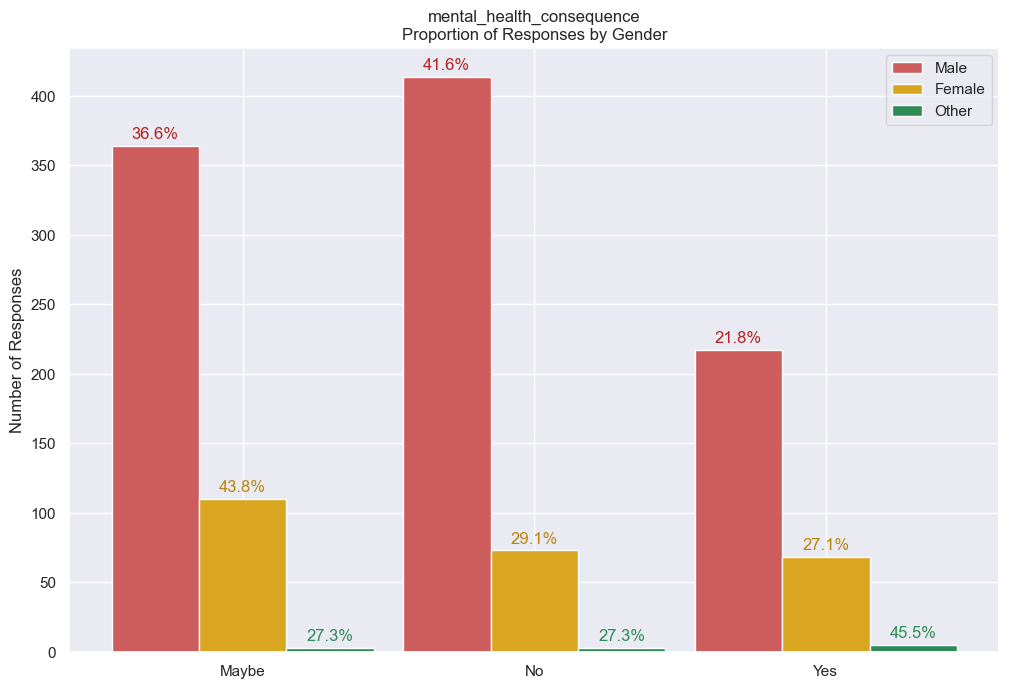

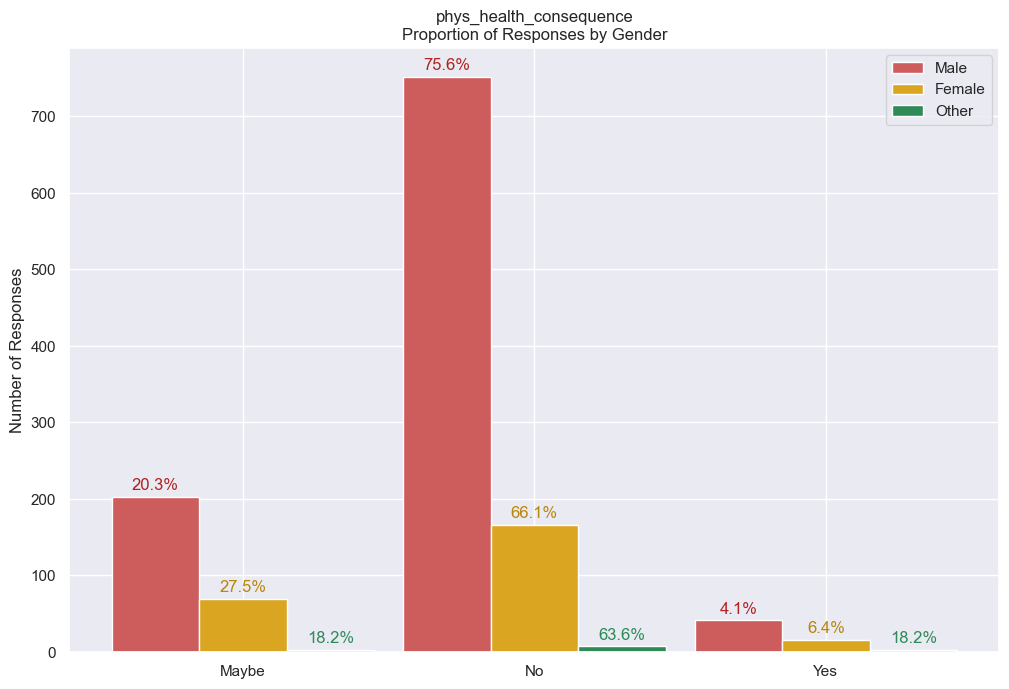

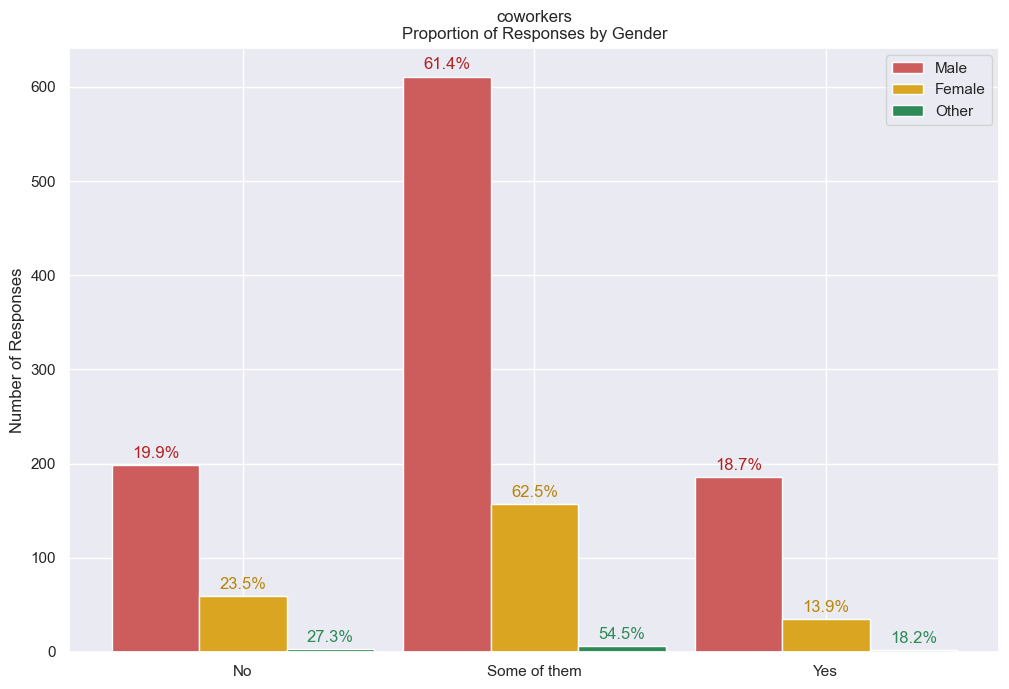

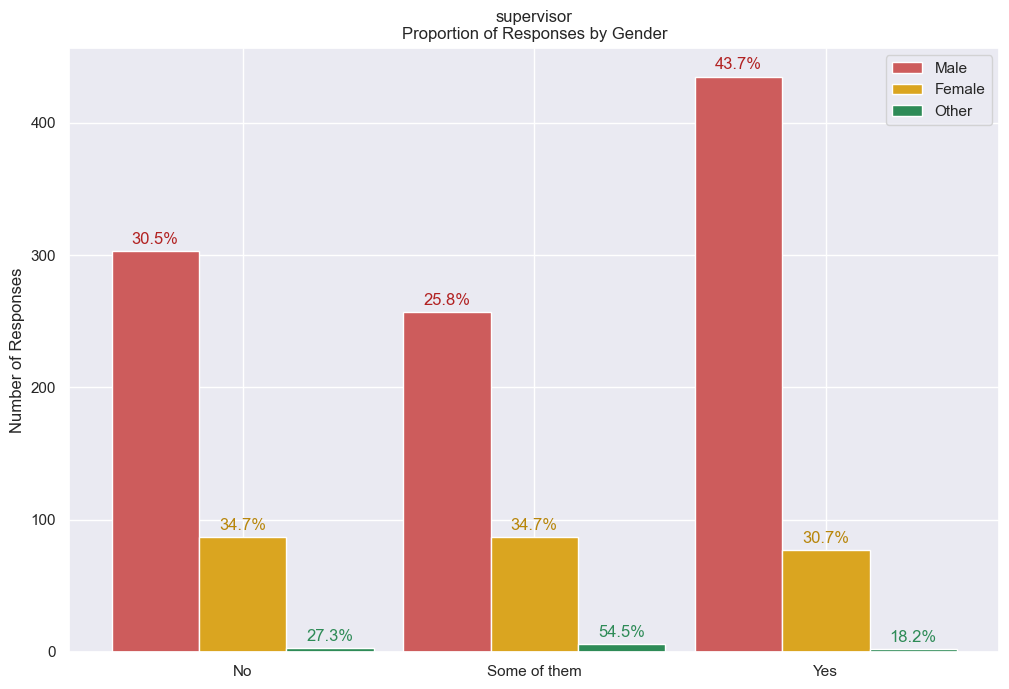

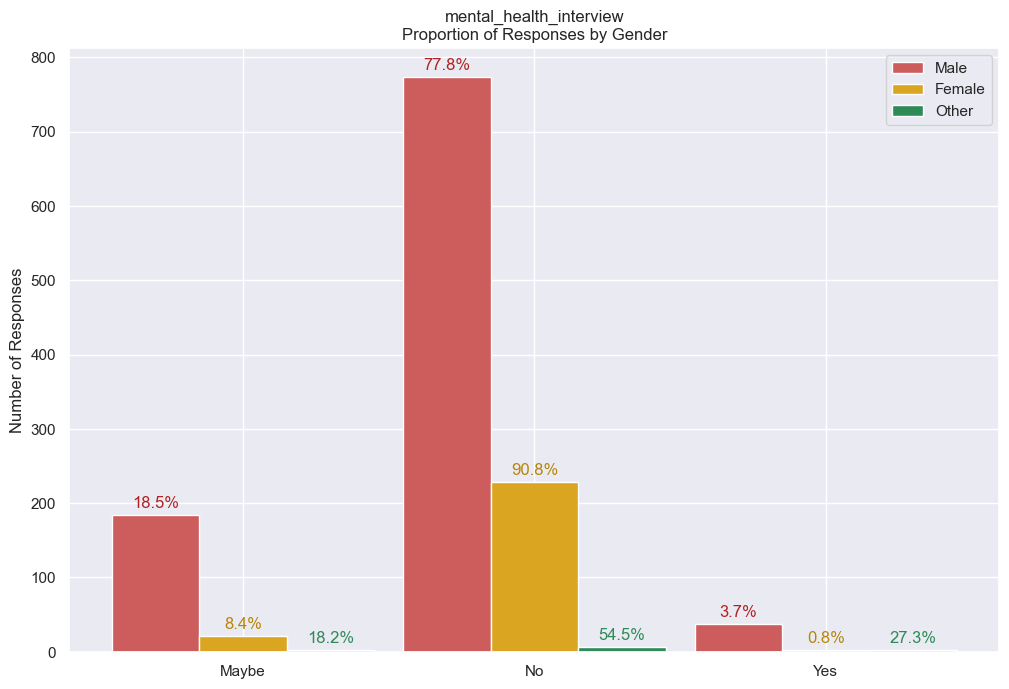

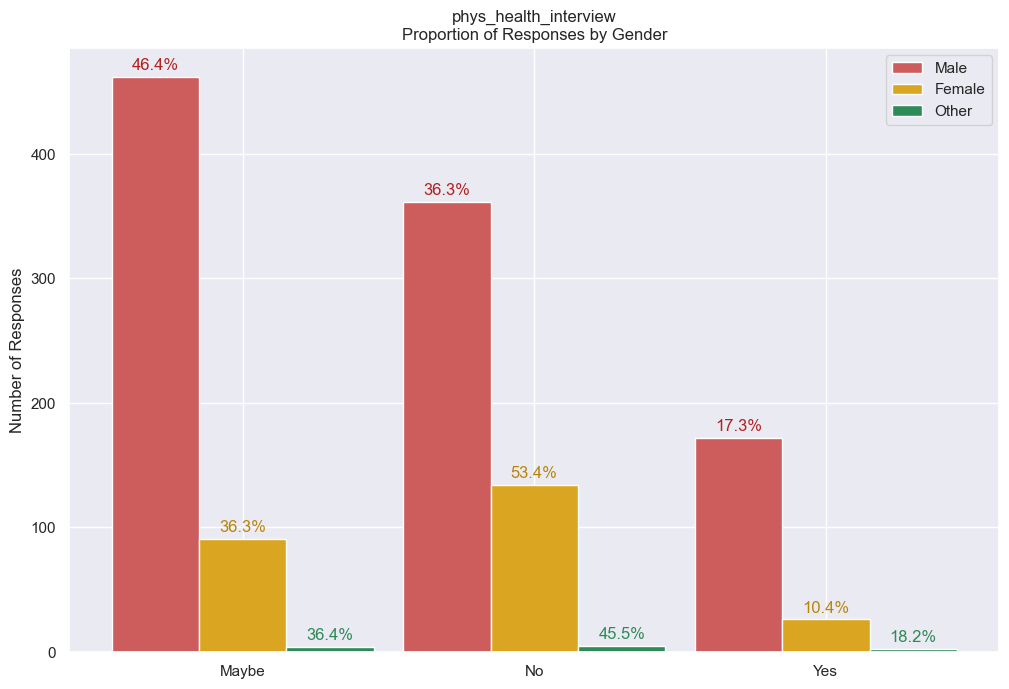

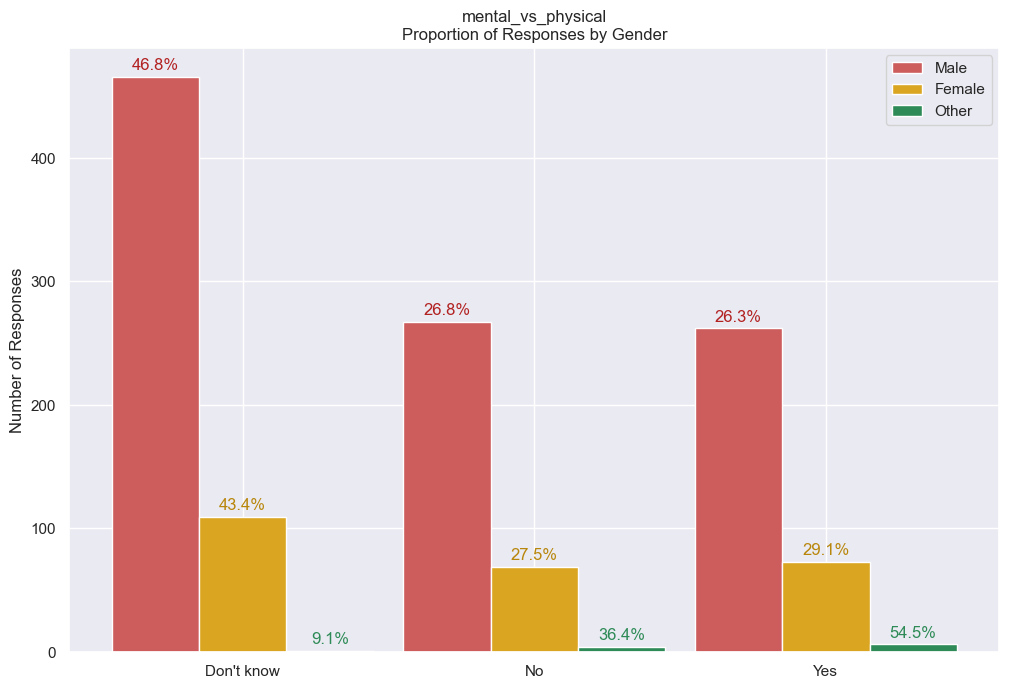

In [ ]:
sns.countplot(data = df, x = 'gender')
df_cols = df.columns.tolist()
for i in [5, 7, 8, 9, 11, 18, 19, 20, 21, 22, 23, 24]:
    groupedby_gender_barplot(df, df_cols[i])
#relatively unaffected by gender: self_employed (nan), work_interfere(nan), no_employees, tech companies, 
                                #physical health consequence, coworkers, supervisors, mental_health_interview, mental vs physical
#affected by gender: treatment, mental_health_consequence, phys_health_interview
f: 66 27 6
m: 75 20 4
o: 63 18 18

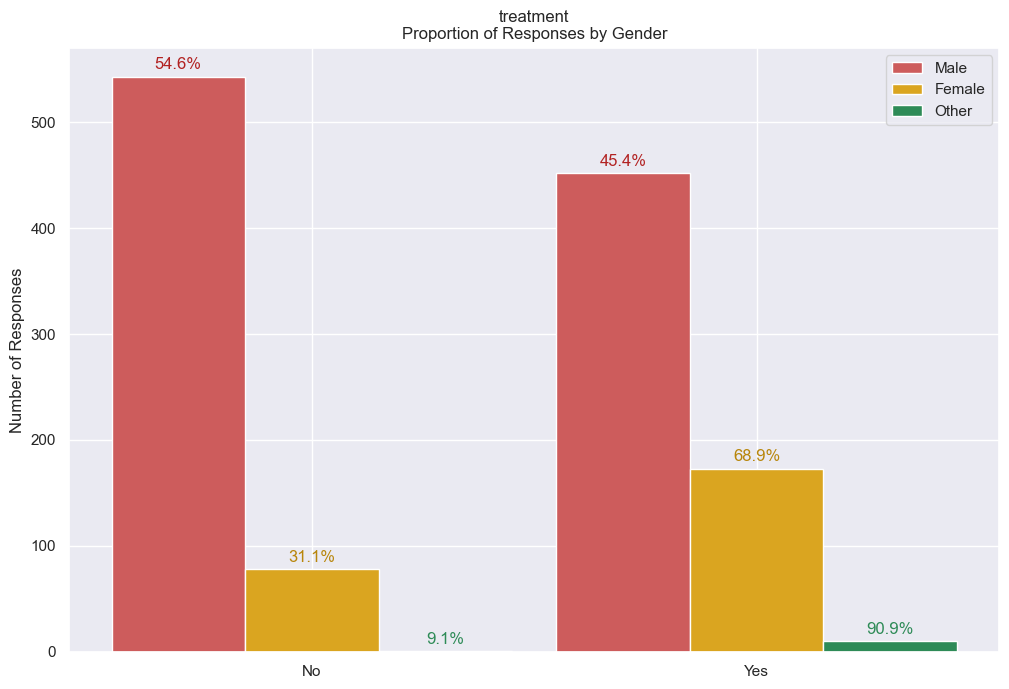

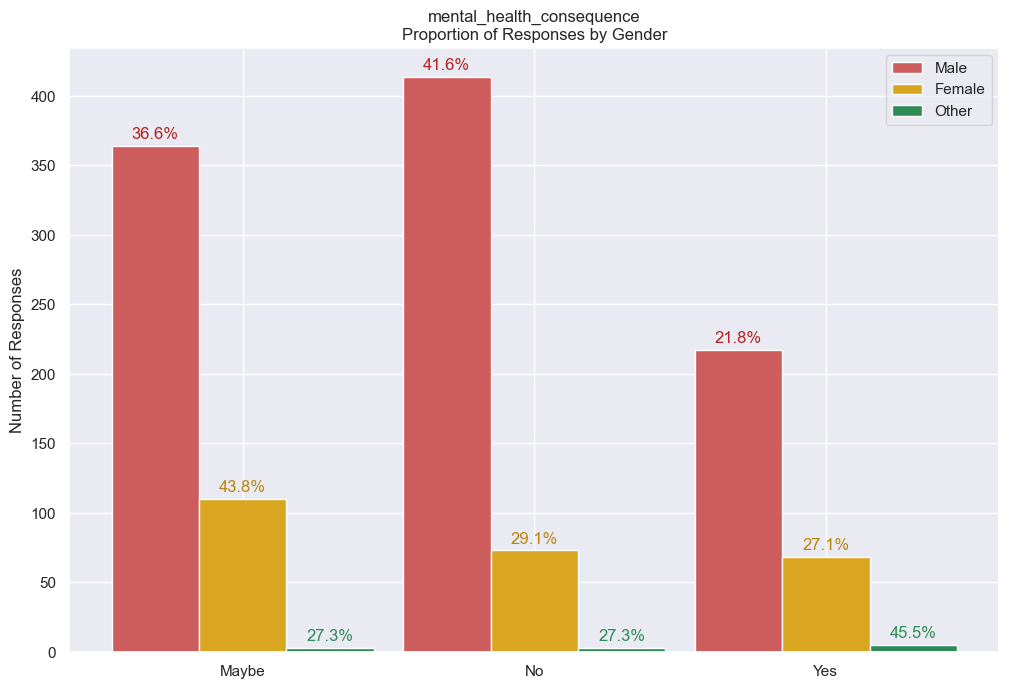

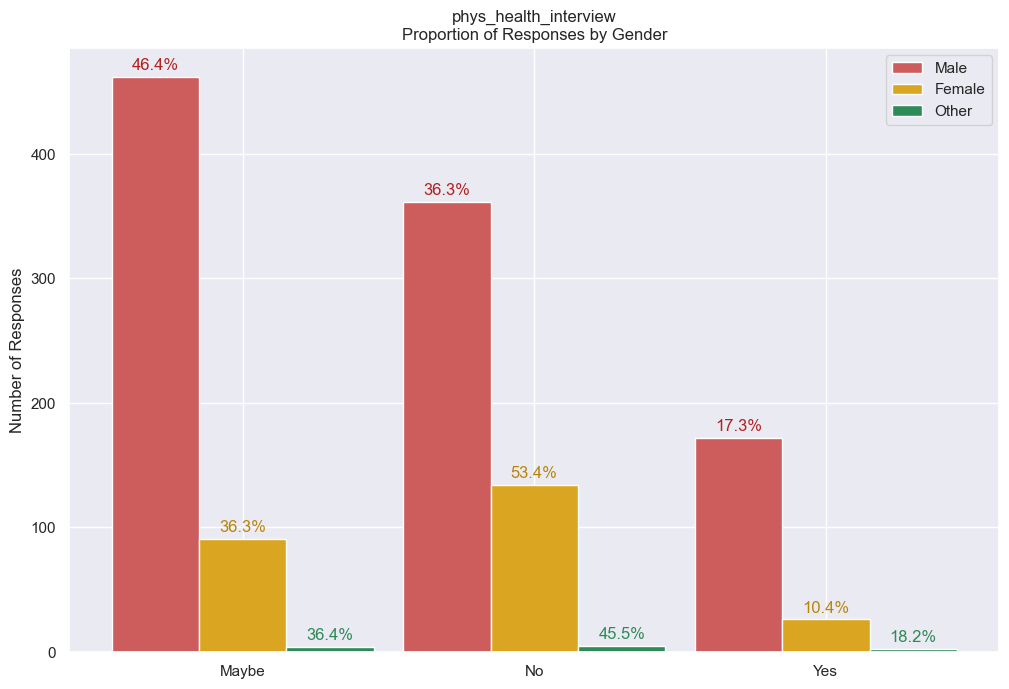

In [ ]:
for col in ['treatment','mental_health_consequence', 'phys_health_interview']:
    groupedby_gender_barplot(df, col)

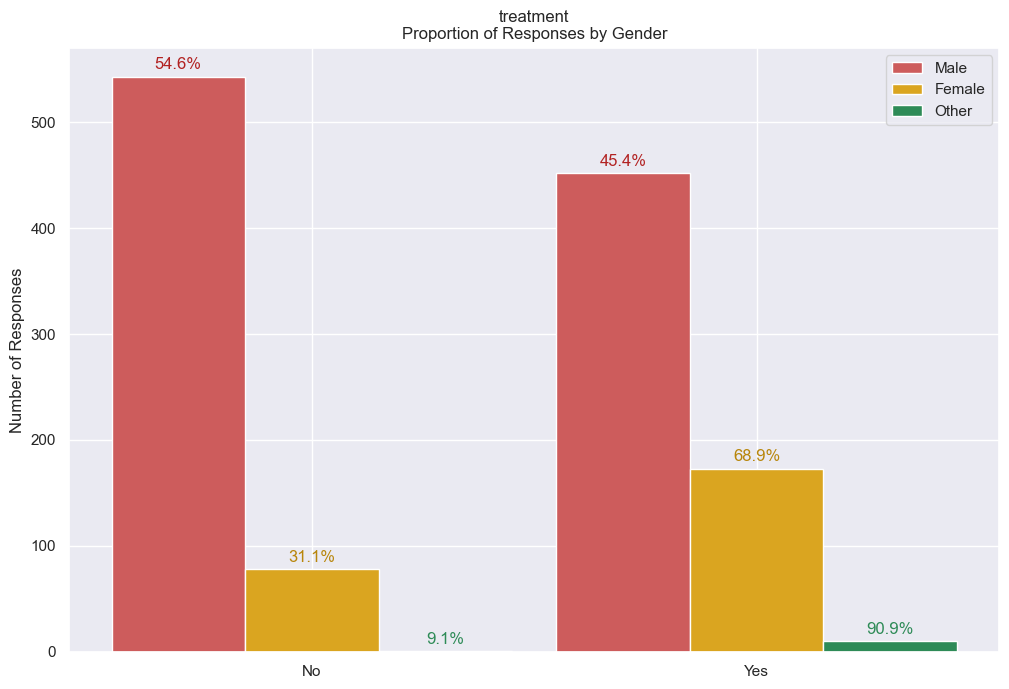

In [ ]:
groupedby_gender_barplot(df, 'treatment')

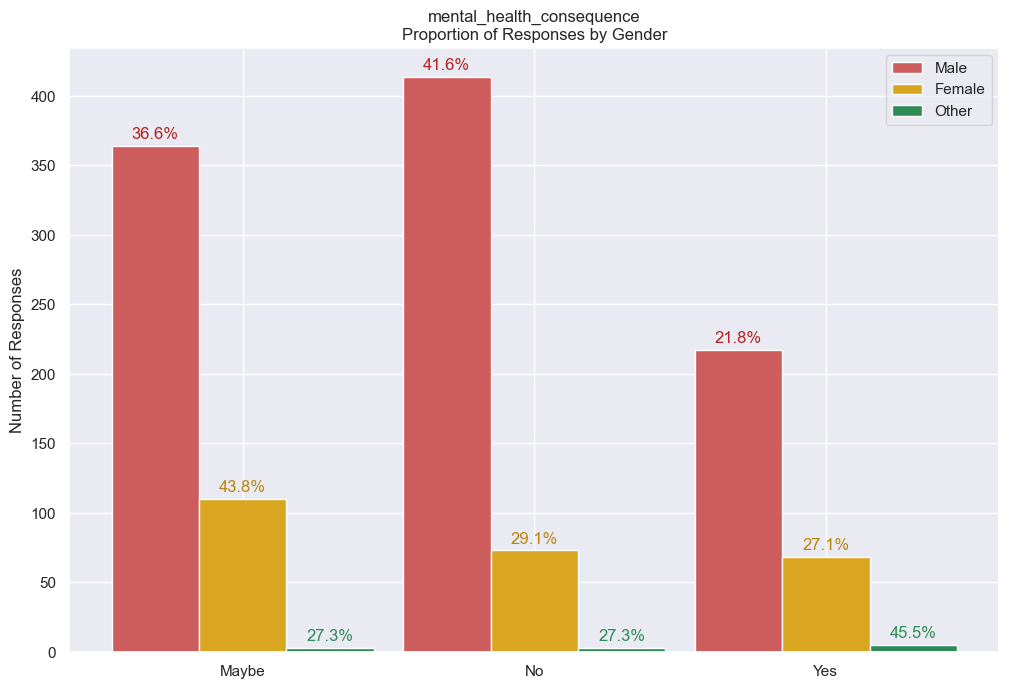

In [ ]:
groupedby_gender_barplot(df, 'mental_health_consequence')